##  HOUSE PRICE REGRESSION MODEL 

### - FEATURE ENGINEERING
### - PIPELINE 
### - GRIDSEARCH
### - FUTURE SELECTION
### - DIFFERENT MODEL EVALUATION
### - FINAL RECOMMENDATION

In this project i will use house pricing data and i will use feature engineering and machine model prediction

To do so i will fistly describe road map of data evaluation during the process:

    1) load data
    2) Data types
    3) Types of variables
        categorical
        numerical
            discrete
            continious
        contain DateTime
    4) Types of problems within the variables:
        missing values
        outliers and distribution
        outliers in discrete variables
    5) Monotonicity between discrete variables and target values
        Number of labels: cardinality
    6) Separate train and test set
    7) Temporal variables
    8) Missing data imputation
    9) Put it all together
    10) Evaluate by GridSearchCv
    11) Finding Best Feature Selection number
    12) Check scores and residuals
    13) Deeper Estimation Post Feature and Parameter Selection
    
    14) Final model selection

In [1]:
# Import necessary libraries

# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt

# For model building and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# For feature engineering
from feature_engine import encoding as enc
from feature_engine import imputation as imp
from feature_engine import discretisation as dsc

# Set pandas option to display all columns in the dataframe (useful for wide dataframes)
pd.set_option('display.max_columns', None)


In [2]:
# Firstly load data

data  = pd.read_csv('../houseprice.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# Lets look for dtypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There is many features which we need to categorize, its necessary step for further analysis

In [4]:
# Ammount of features

print('Ammount of featues: {}'.format(len(data.dtypes)))

Ammount of featues: 81


### Before we give our dtypes variable we need to do look into our data and look for Date time and also for unnecessary features.

In [5]:
data.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500

As we can notice we have:

-Unnecessary: ['Id']

-Date time: ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

-Month sold: ['MoSold']

In [6]:
# Lets describe temporal feature:

num = [var for var in data.columns if data[var].dtypes != 'O']
year_vars = [var for var in num if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

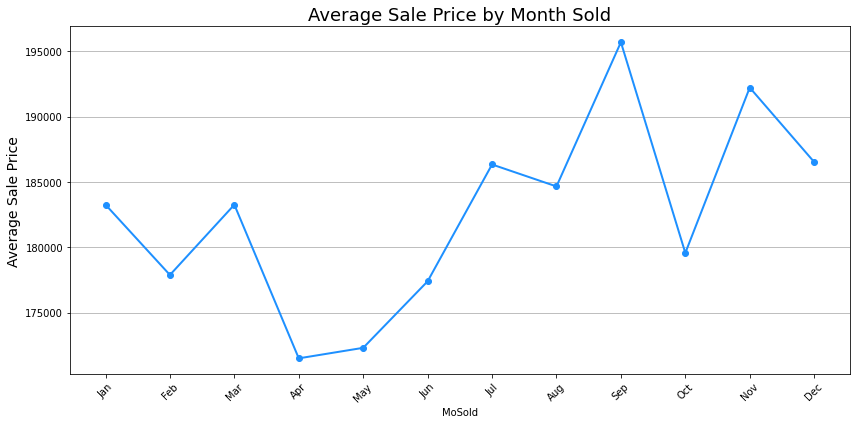

In [7]:
# Visualize the average sale price by month sold.
# This will provide insights into how the month of sale might influence the property sale price.

# Group by month of sale and calculate average sale price
avg_monthly_sale = data.groupby('MoSold')['SalePrice'].mean()

# Plotting
plt.figure(figsize=(12, 6))
avg_monthly_sale.plot(color='dodgerblue', linewidth=2, marker='o')

# Enhancing the chart
plt.title('Average Sale Price by Month Sold', fontsize=18)
plt.ylabel('Average Sale Price', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


### CATEGORICAL

In [8]:
# Identify and list down all the categorical features in the dataset.
# A feature is considered categorical if its data type is 'object'.

categorical = [var for var in data.columns if data[var].dtype == 'O']

# Display the total number of categorical features identified.
print('There are {} categorical features in the dataset.'.format(len(categorical)))


There are 43 categorical features in the dataset.


In [9]:
data[categorical].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

### NUMERICAL

In [10]:
# Identify and categorize the numerical variables from the dataset.
# We'll exclude specific columns such as 'Id', 'SalePrice', and any year-related variables, as well as 'MoSold'.
# Once we've defined the numerical variables, we'll further categorize them into discrete and continuous types in subsequent steps.

numerical = [var for var in num if var not in ['Id', 'SalePrice'] and var not in year_vars and var != 'MoSold']
print('There are {} numerical variables in the dataset, excluding identifiers and target columns.'.format(len(numerical)))


There are 31 numerical variables in the dataset, excluding identifiers and target columns.


In [11]:
data[numerical].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  
0         0        0  
1         0        0  
2         0        0  
3         0        0  
4         0        0

### DISCRETE

In [12]:
# Identify discrete variables from the dataset.
# Criteria for a variable to be considered discrete:
# 1. It should have fewer than 20 unique values.
# 2. It should not be part of the previously identified categorical or year-related variables.
# Once identified, we'll store these discrete variables for further analysis.

discrete = [var for var in data.columns if data[var].nunique() < 20 and var not in categorical and var not in year_vars]

print('The dataset contains {} discrete variables based on the defined criteria.'.format(len(discrete)))


The dataset contains 14 discrete variables based on the defined criteria.


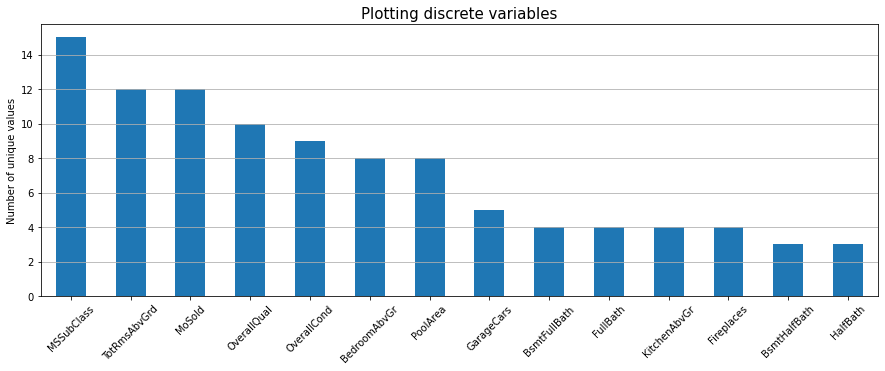

In [13]:
# Visualize the number of unique values for each discrete variable.
# We're plotting a bar chart where each bar represents a discrete variable, 
# and the height of the bar indicates the number of unique values it has.
# The variables are sorted in descending order based on their unique value counts for clarity.

data[discrete].nunique().sort_values(ascending=False).plot.bar(figsize = (15,5))
plt.title('Plotting discrete variables', fontsize = 15)
plt.ylabel('Number of unique values')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()


In [14]:
# Display the unique values of each discrete variable.
# This helps in understanding the different categories or levels in each discrete variable, 
# providing insights into the kind of data we are dealing with.

for var in discrete:
    print(var, 'values:', data[var].unique())

MSSubClass values: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual values: [ 7  6  8  5  9  4 10  3  1  2]
OverallCond values: [5 8 6 7 4 2 3 9 1]
BsmtFullBath values: [1 0 2 3]
BsmtHalfBath values: [0 1 2]
FullBath values: [2 1 3 0]
HalfBath values: [1 0 2]
BedroomAbvGr values: [3 4 1 2 0 5 6 8]
KitchenAbvGr values: [1 2 3 0]
TotRmsAbvGrd values: [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces values: [0 1 2 3]
GarageCars values: [2 3 1 0 4]
PoolArea values: [  0 512 648 576 555 480 519 738]
MoSold values: [ 2  5  9 12 10  8 11  4  1  7  3  6]


### CONTINIOUS

In [15]:
# Identify continuous variables from the dataset.
# Criteria for a variable to be considered continuous:
# 1. It should be part of the previously identified numerical variables.
# 2. It should not be in the list of discrete variables.
# 3. Exclude specific columns such as 'Id', 'SalePrice', and any year-related variables.
# The goal is to differentiate between variables that have a continuous range of values 
# and those with a limited set of distinct values (discrete).

continuous = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice'] and var not in year_vars]


In [16]:
# Display the total count of continuous variables identified.
# This provides a quick overview of how many features in the dataset are considered to have a continuous range of values.

print('There are {} continuous variables in the dataset.'.format(len(continuous)))


There are 18 continuous variables in the dataset.


In [17]:
# For each continuous variable, display the number of unique values it has.
# This provides insight into the diversity of values within each continuous feature 
# and can help in understanding the spread and granularity of the data.

for var in continuous:
    print(var, 'values:', data[var].nunique())

LotFrontage values: 110
LotArea values: 1073
MasVnrArea values: 327
BsmtFinSF1 values: 637
BsmtFinSF2 values: 144
BsmtUnfSF values: 780
TotalBsmtSF values: 721
1stFlrSF values: 753
2ndFlrSF values: 417
LowQualFinSF values: 24
GrLivArea values: 861
GarageArea values: 441
WoodDeckSF values: 274
OpenPorchSF values: 202
EnclosedPorch values: 120
3SsnPorch values: 20
ScreenPorch values: 76
MiscVal values: 21


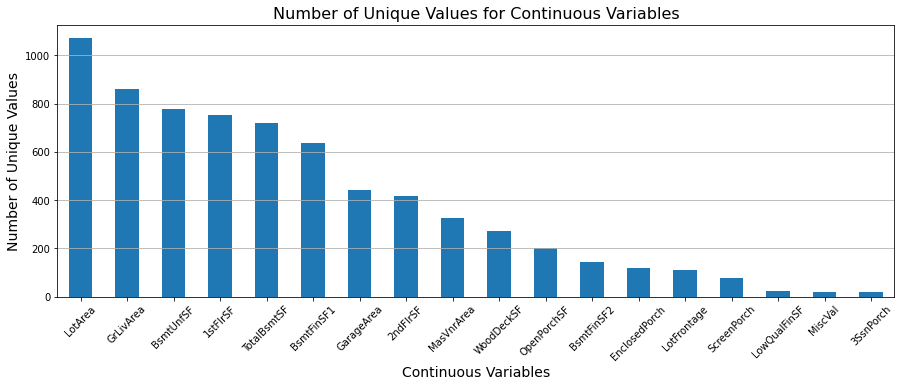

In [18]:
# Visualize the number of unique values for each continuous variable.
# By plotting a bar chart, we can quickly compare and understand the diversity of values 
# within each continuous feature. A higher bar indicates a greater number of unique values, 
# suggesting a wider range and granularity in the data for that specific variable.
# The variables are sorted in descending order based on their unique value counts for clarity.

plt.figure(figsize = (15,5))
data[continuous].nunique().sort_values(ascending=False).plot.bar()
plt.title('Number of Unique Values for Continuous Variables', fontsize=16)
plt.xlabel('Continuous Variables', fontsize=14)
plt.ylabel('Number of Unique Values', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### Types of problems within the variables:

### Missing data

In [19]:
# Identify columns with missing values.
missing_var = [var for var in data.columns if data[var].isna().mean() > 0]

# Function to plot the percentage of missing values per variable.
def missing_values_plot(df, variable):
    df[variable].isna().mean().sort_values(ascending=False).plot.bar(figsize=(15,5))
    plt.title('Percentage of missing values per variable', fontsize=16)
    plt.ylabel('Percentage', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
    

# Function to display the percentage of missing values.
def missing_values(df, variable):
    print(df[variable].isna().mean().sort_values(ascending=False))


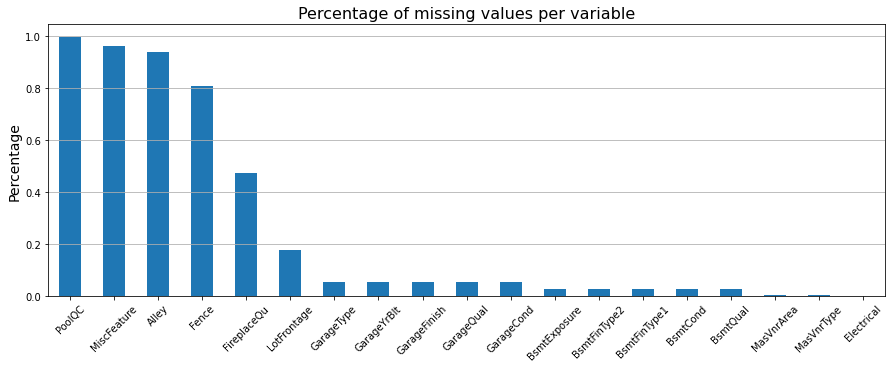

In [20]:
missing_values_plot(data,missing_var)

In [21]:
# Calculate and display the proportion of features with missing values.
# This provides an overview of the extent of missing data across the entire dataset.

print('{} of the total features contain missing values.'.format(round((len(missing_var) / len(data.columns)),2)))


0.23 of the total features contain missing values.


In [22]:
# Display the percentage of missing values for each feature that has missing data.
# This provides a detailed breakdown, helping pinpoint specific features that might need attention during preprocessing.

missing_values(data, missing_var)


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64


### Outliers and distribution in numerical features

In [23]:
# Define a function to visualize the distribution of data and detect outliers.
# This function will generate three plots for each variable:
# 1. A histogram to show the data distribution.
# 2. A boxplot to visually check for outliers.
# 3. A Q-Q plot to check for the normality of the data.
# Together, these plots provide a comprehensive view of the data characteristics.

import scipy.stats as stats


def outlier_dist(df, variable):
    for var in variable:
        plt.figure(figsize=(15, 4))
    # Histogram: Provides a visual representation of data distribution
        plt.subplot(1, 3, 1)
        df[var].hist(bins=30)
        plt.title('Data Distribution')
        plt.ylabel('Frequency')

    # Boxplot: Helps visually detect outliers in the data
        plt.subplot(1, 3, 2)
        plt.boxplot(df[var])
        plt.title('Boxplot for Outlier Detection')
        plt.ylabel(var)  # Displaying the variable name on the y-axis makes sense for boxplots

    # Q-Q plot: Helps in checking the normality of the data
        plt.subplot(1, 3, 3)
        stats.probplot(df[var], dist='norm', plot=plt)
        plt.title('Q-Q Plot for Normality Check')
        
        plt.show()


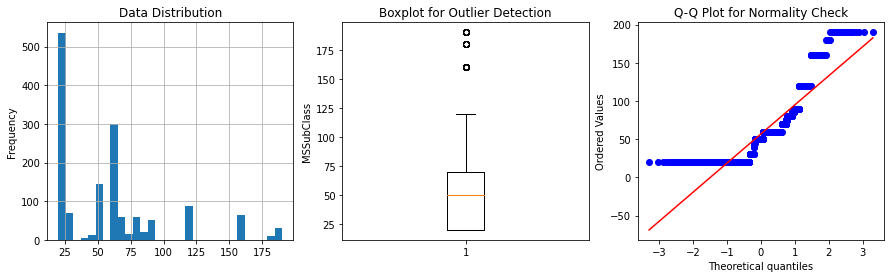

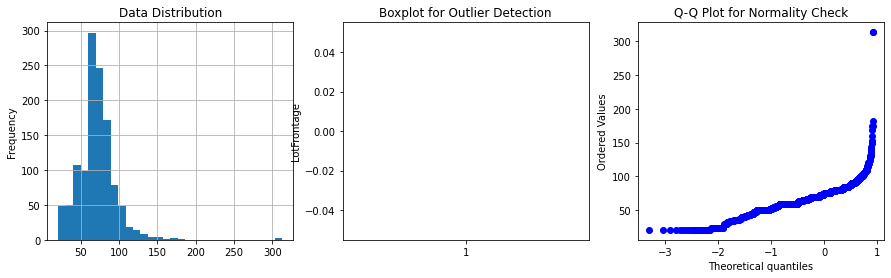

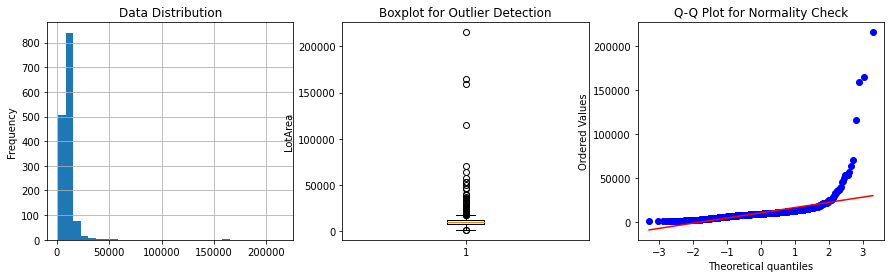

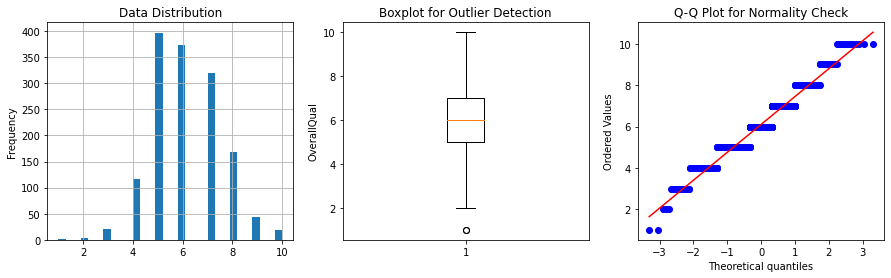

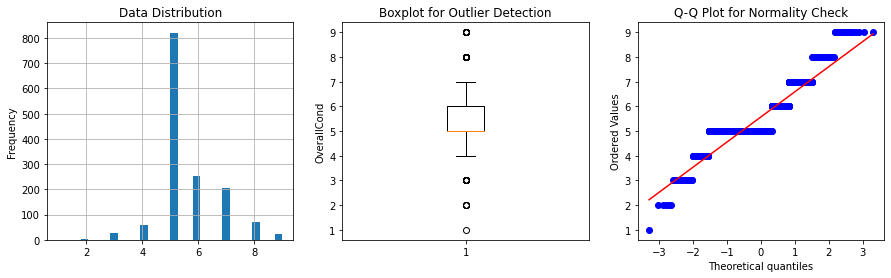

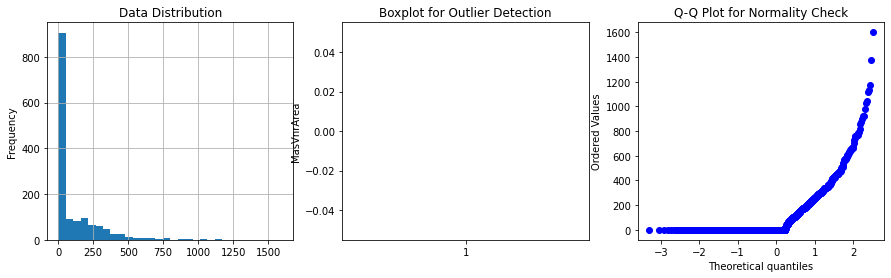

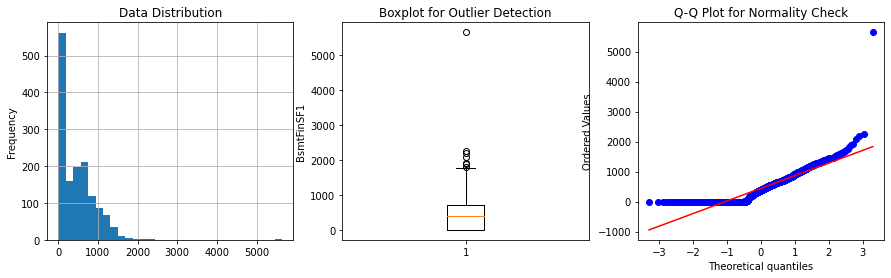

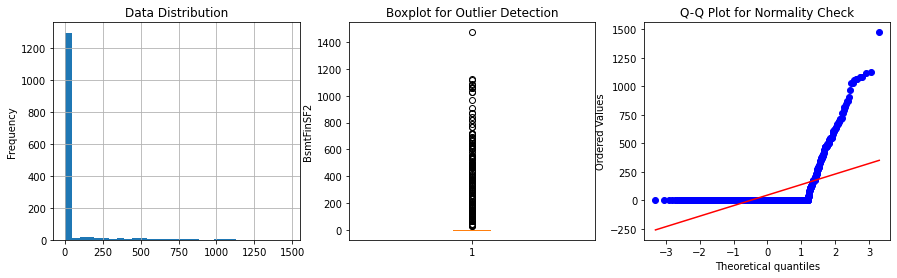

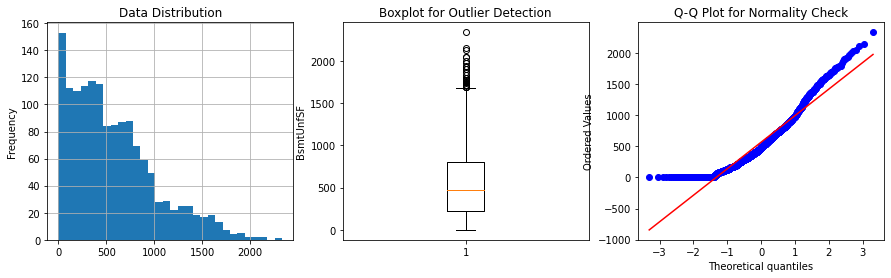

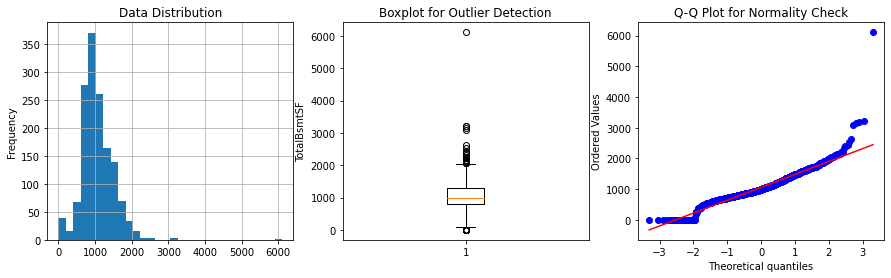

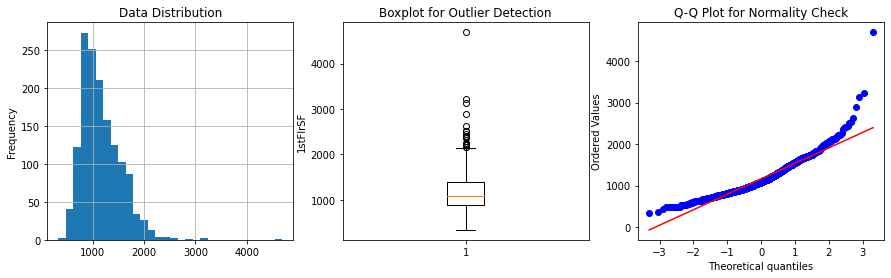

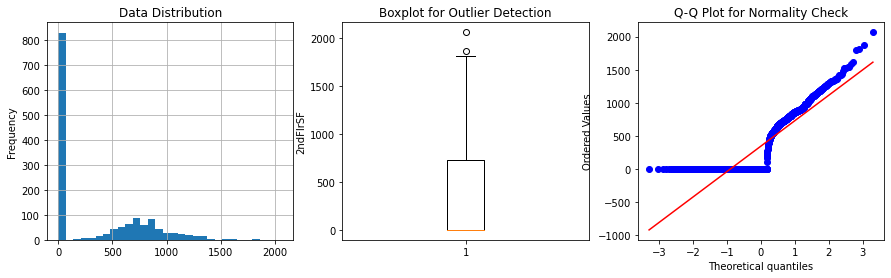

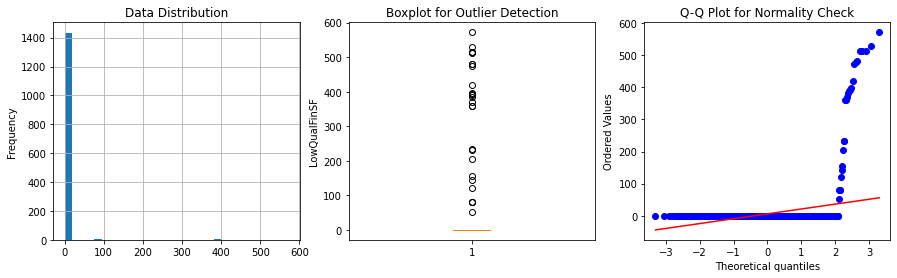

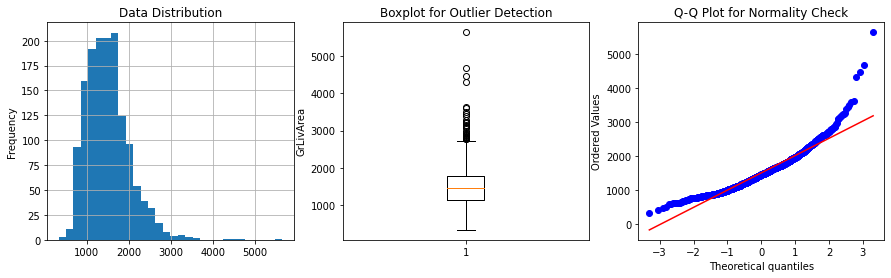

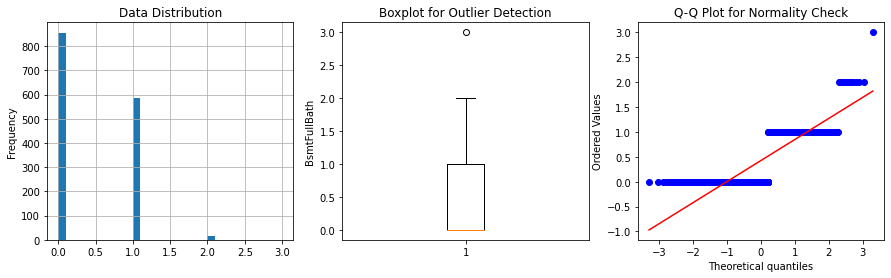

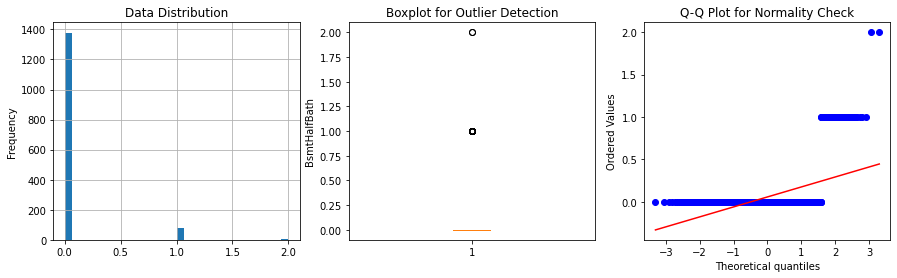

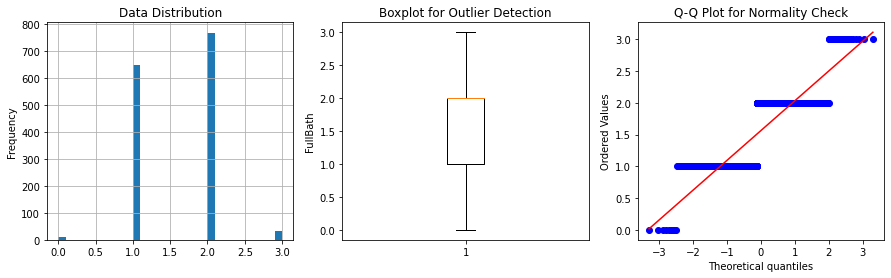

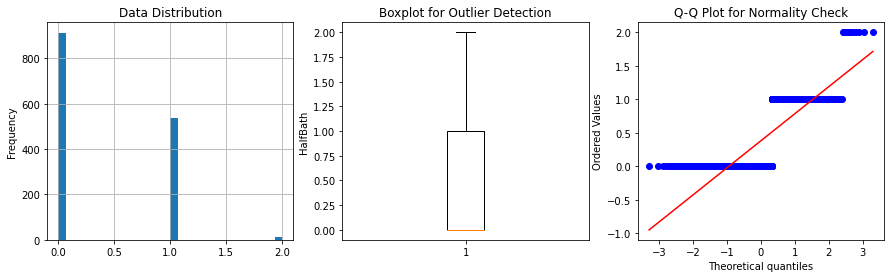

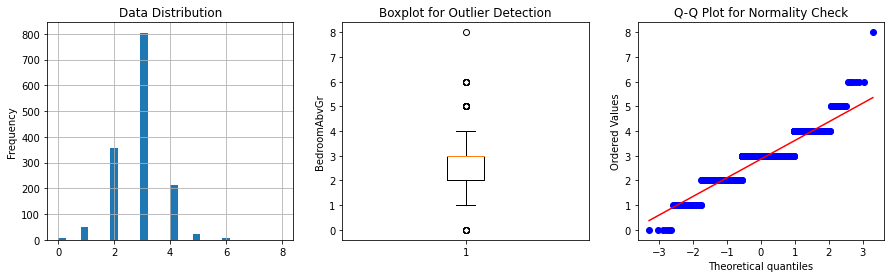

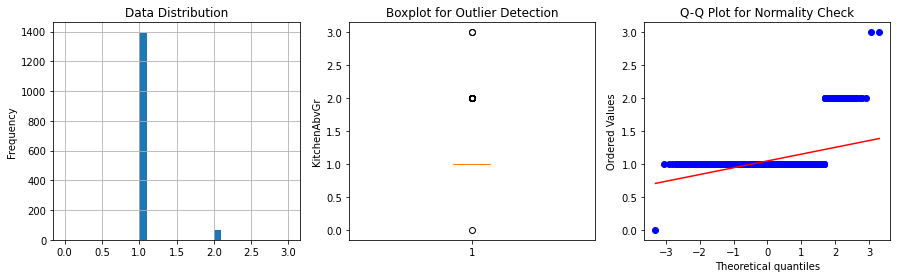

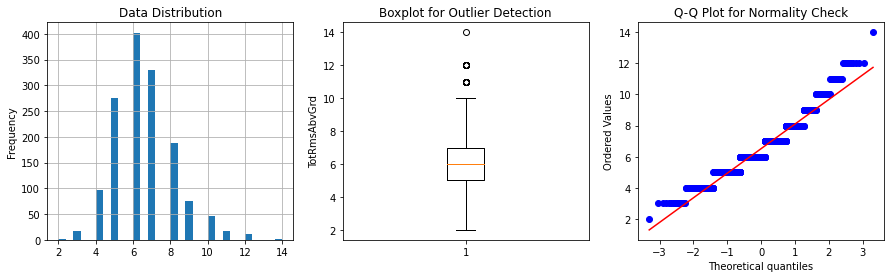

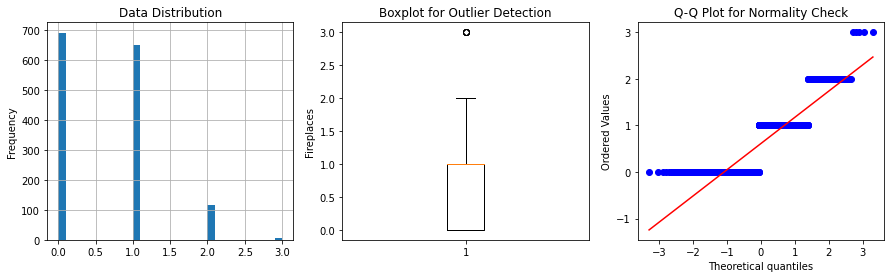

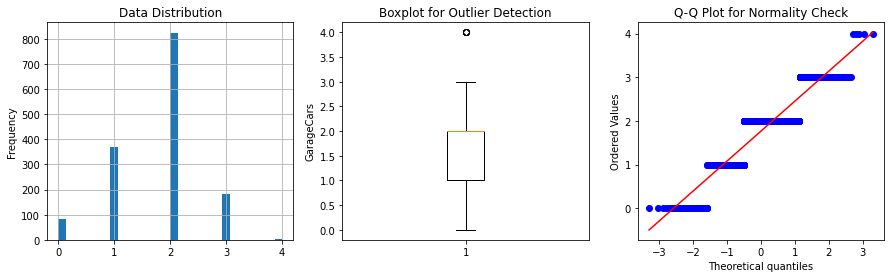

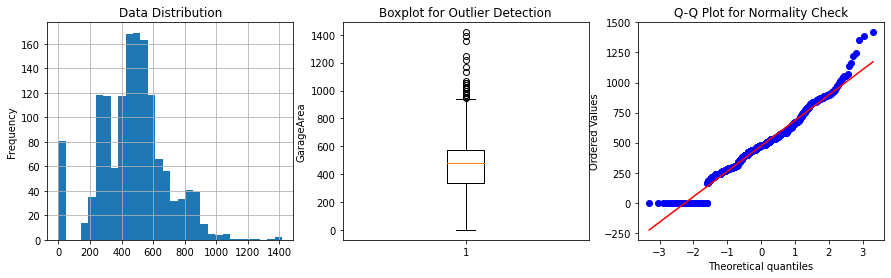

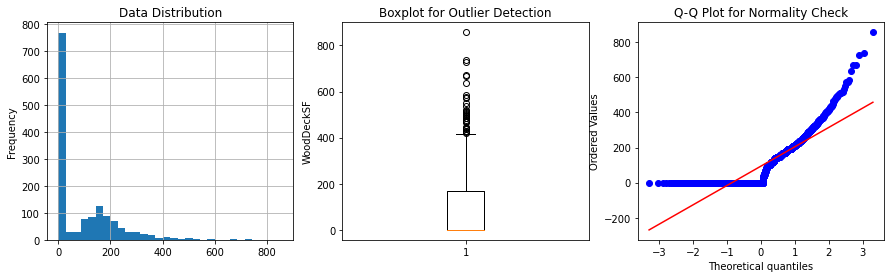

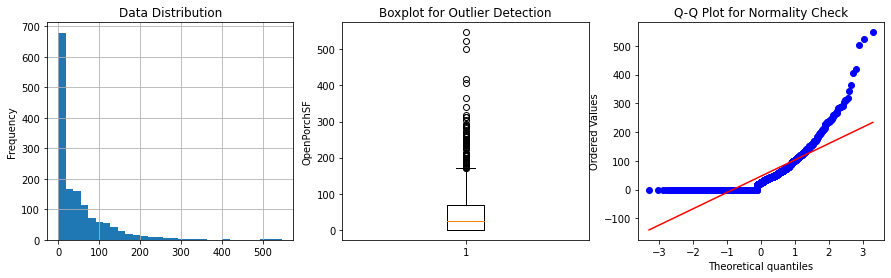

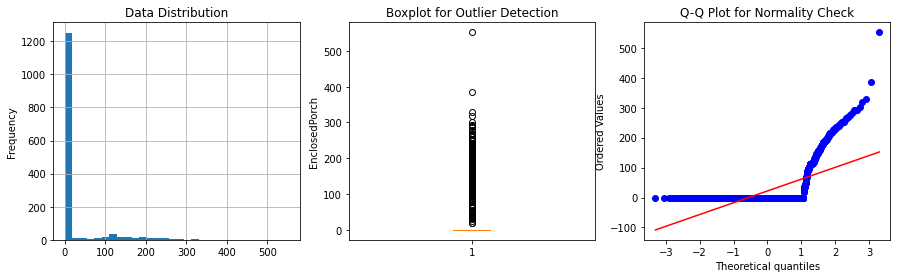

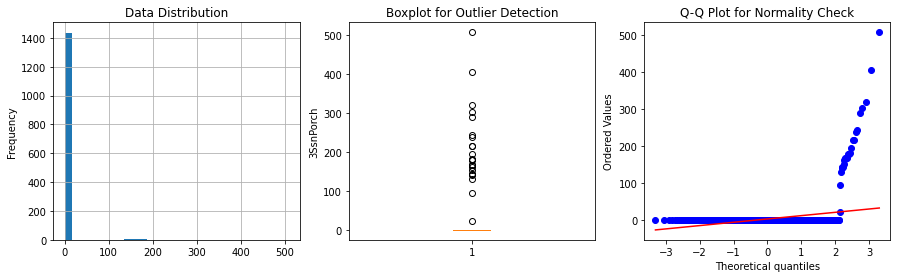

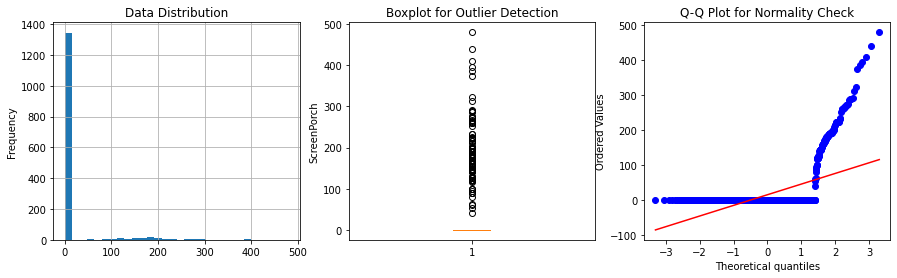

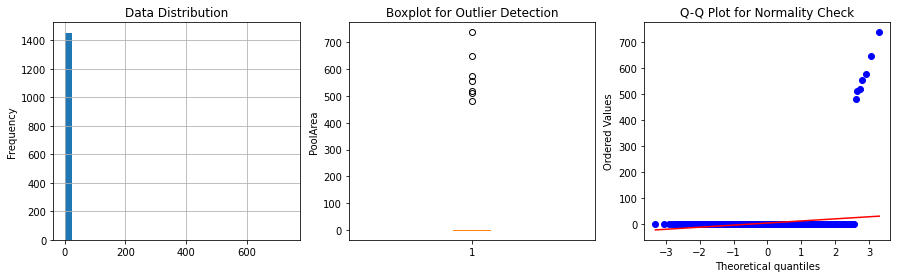

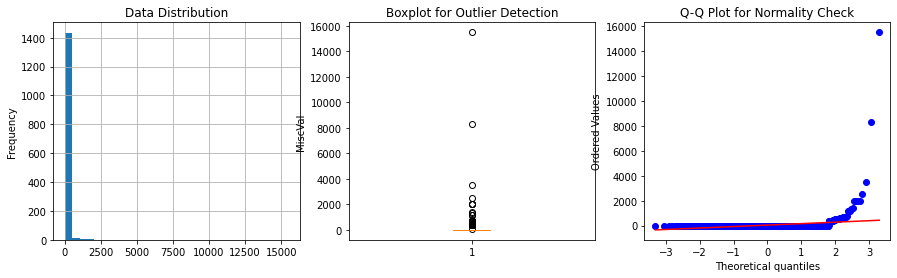

In [24]:
outlier_dist(data,numerical)

### Conclusion:

As the majority of the continious variables seem to contain outliers. In addition, the majority of the variables are not normally distributed. 

As we plan to build linear regression, we need to tackle these to improve the model performance.

To tackle this two steps together, i will do discretisatioN. I will follow discretisation with encoding of the intervals following the target mean.


### Monotonic between discrete and target values

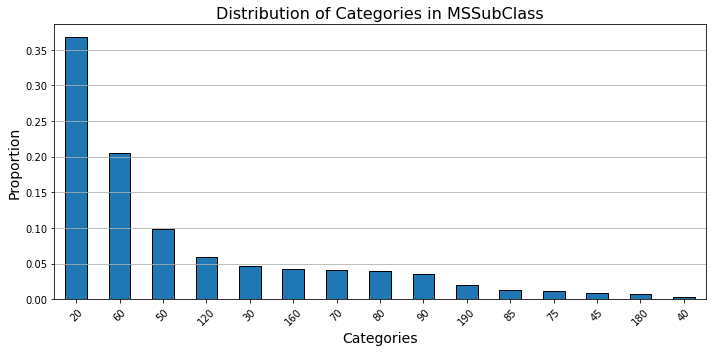

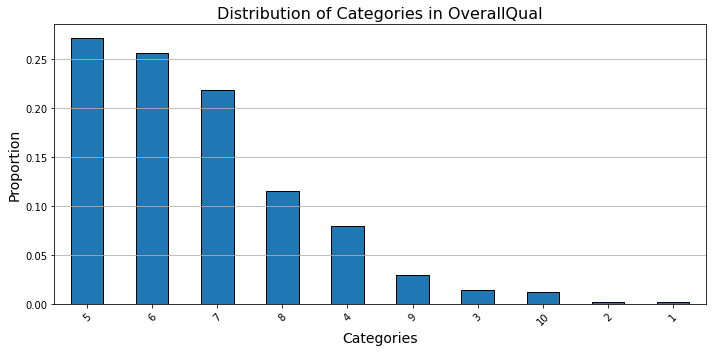

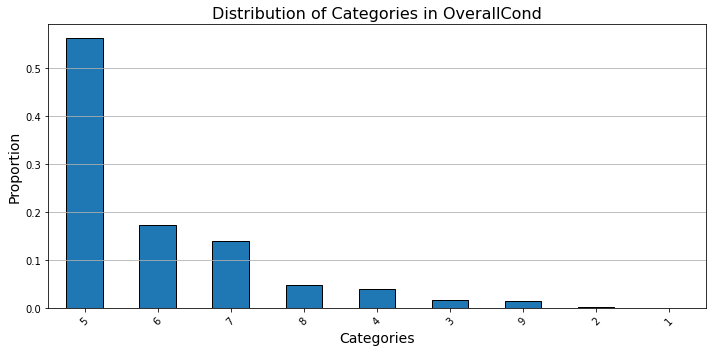

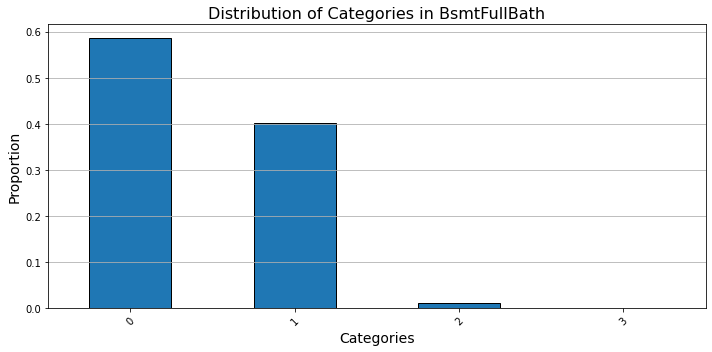

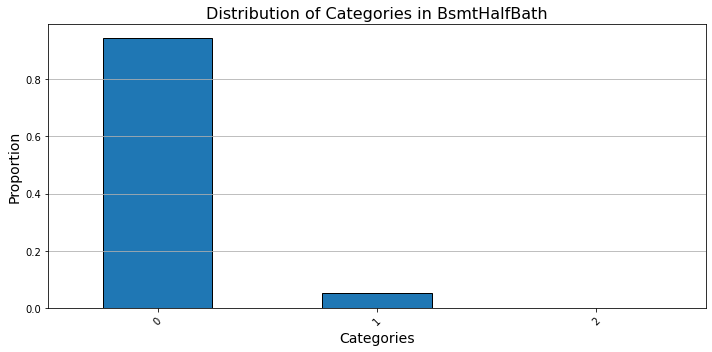

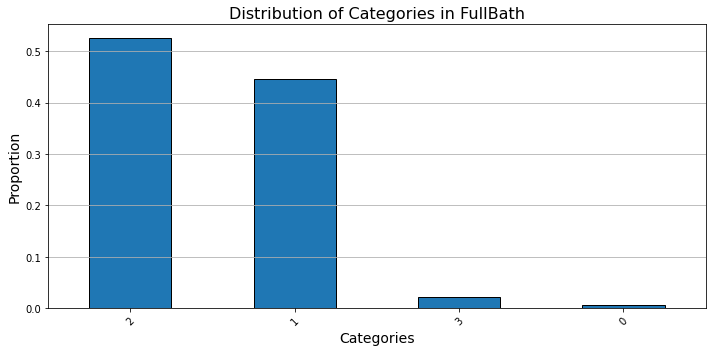

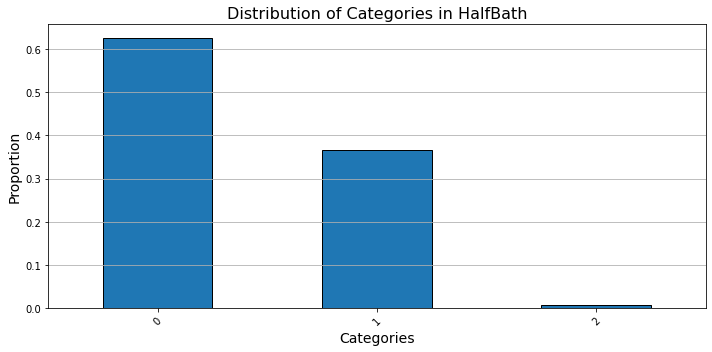

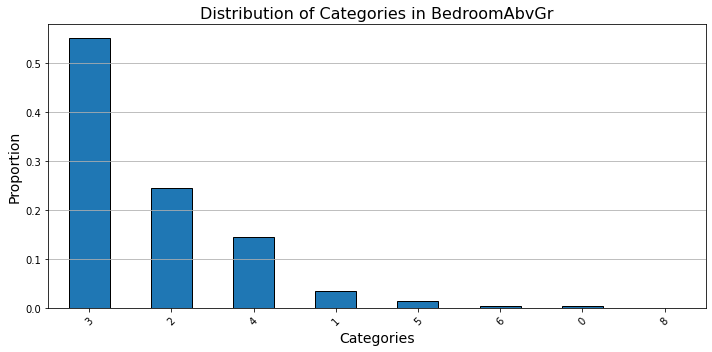

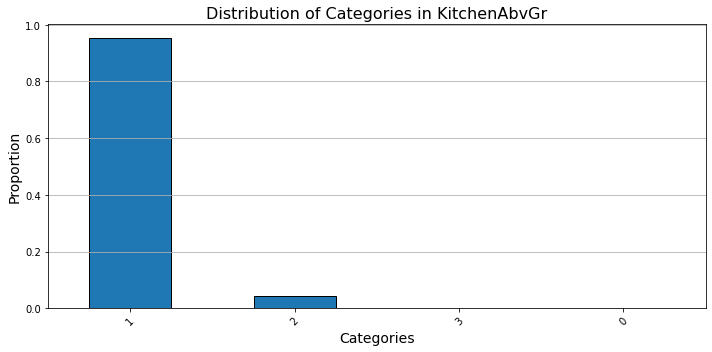

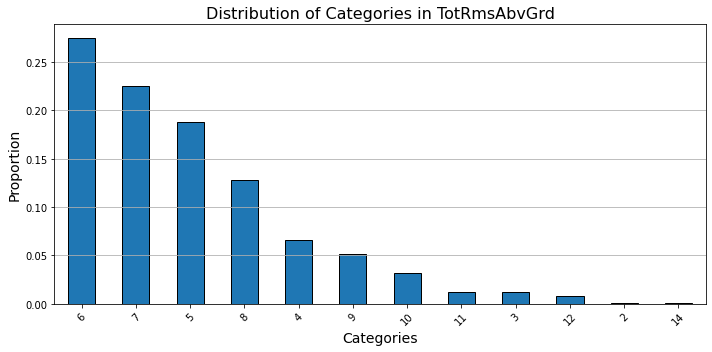

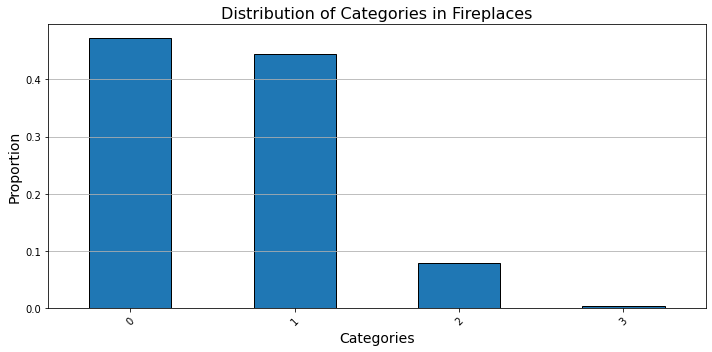

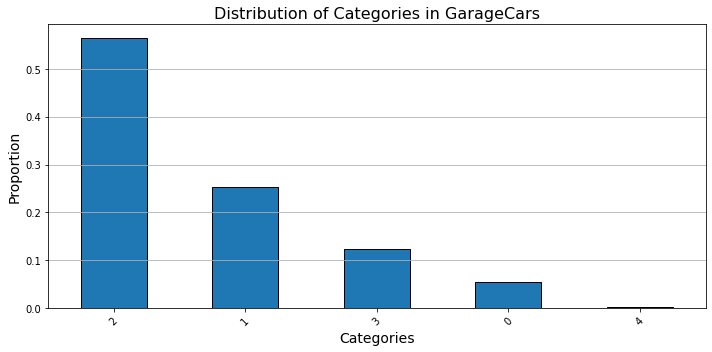

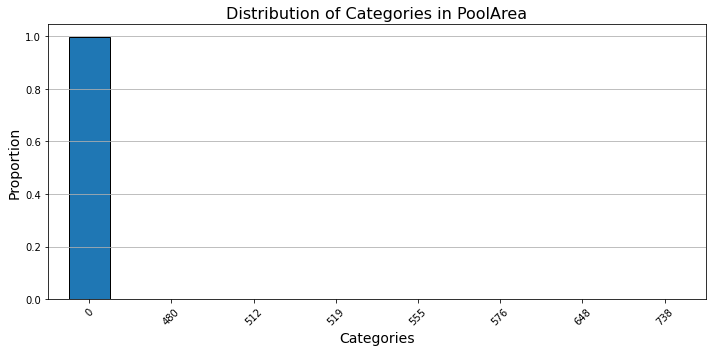

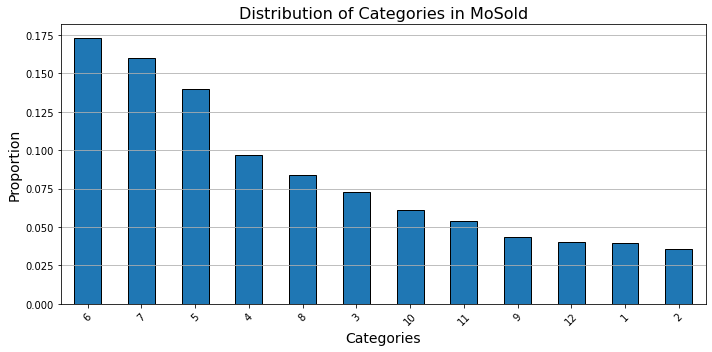

In [25]:
# Analyze the distribution of categories for each discrete feature.
# This will help understand the proportion of each category within the discrete variables.

for var in discrete:
    # Calculate the proportion of each category
    category_proportions = (data.groupby(var)[var].count() / len(data)).sort_values(ascending=False)
    
    # Plotting
    plt.figure(figsize=(10, 5))
    category_proportions.plot(kind='bar', edgecolor='black')
    
    # Enhancing the chart
    plt.title(f'Distribution of Categories in {var}', fontsize=16)
    plt.xlabel('Categories', fontsize=14)
    plt.ylabel('Proportion', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.tight_layout()
    plt.show()


Conclusion:

Almost each feature in discrete show values with a tiny proportion of houses in dataset, giving rarelabels.

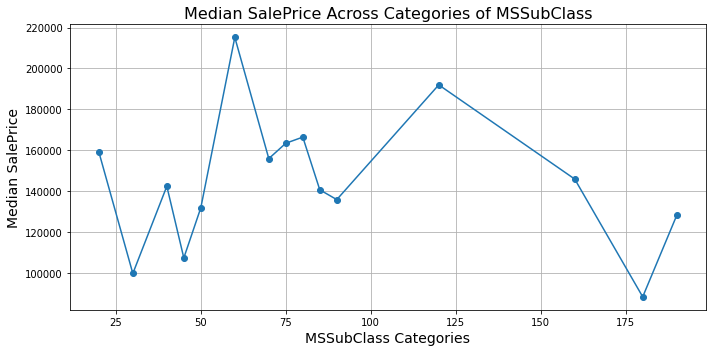

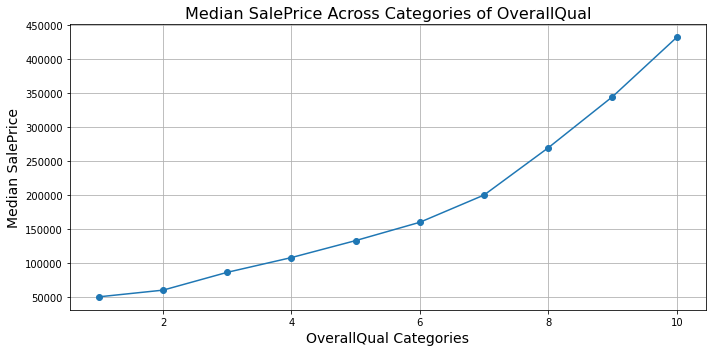

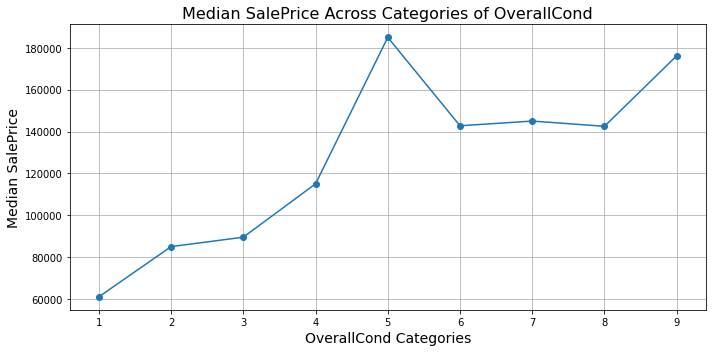

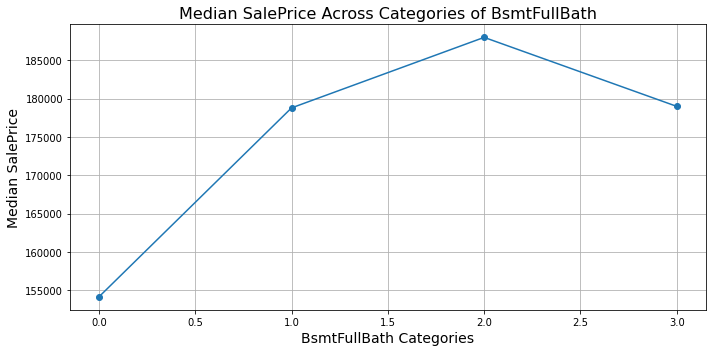

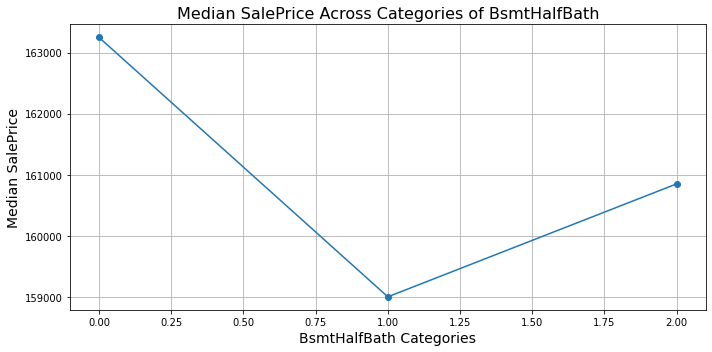

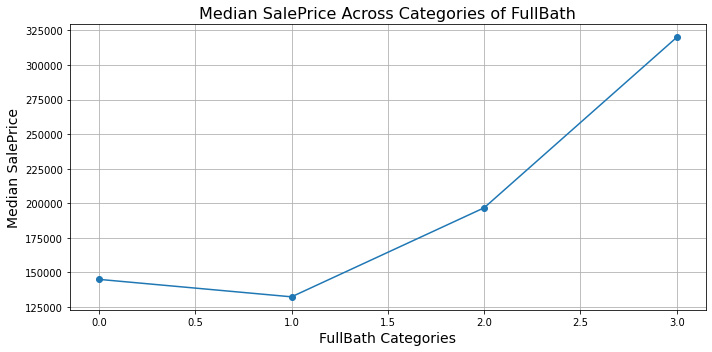

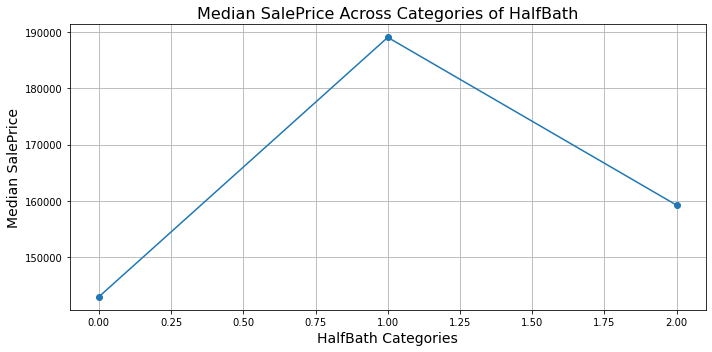

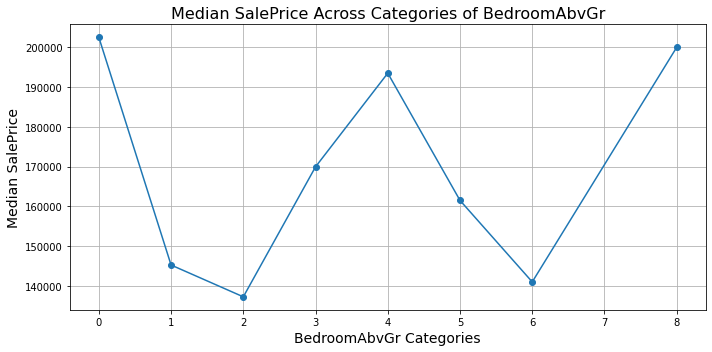

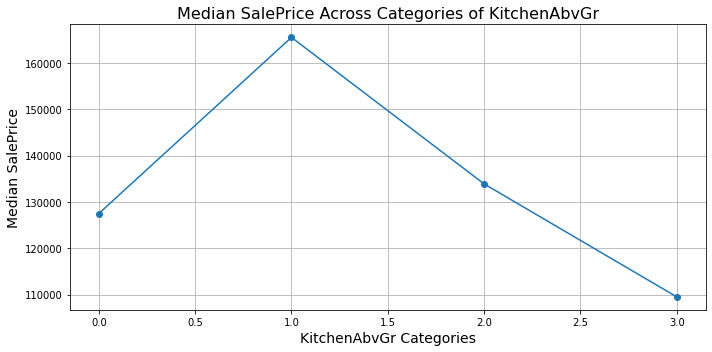

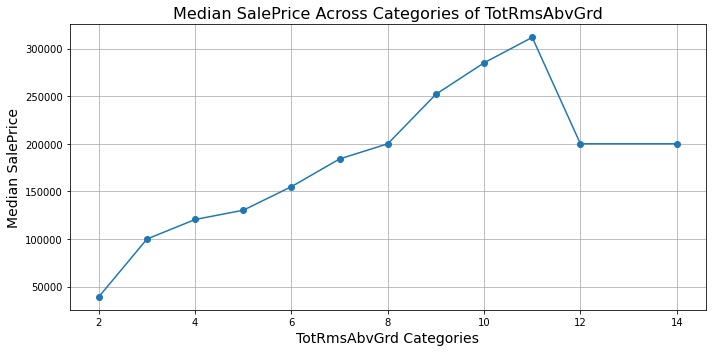

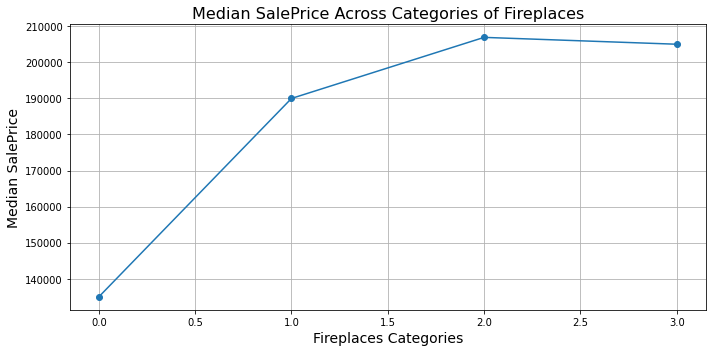

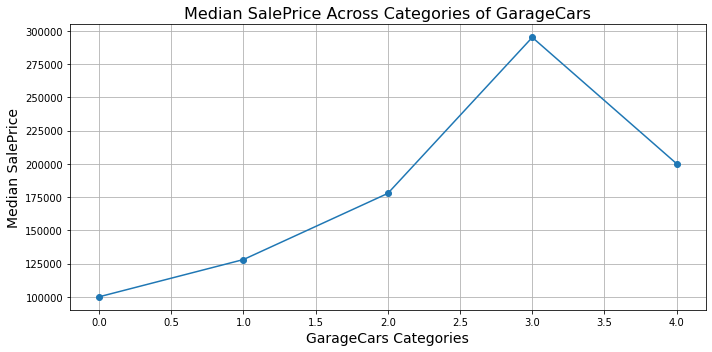

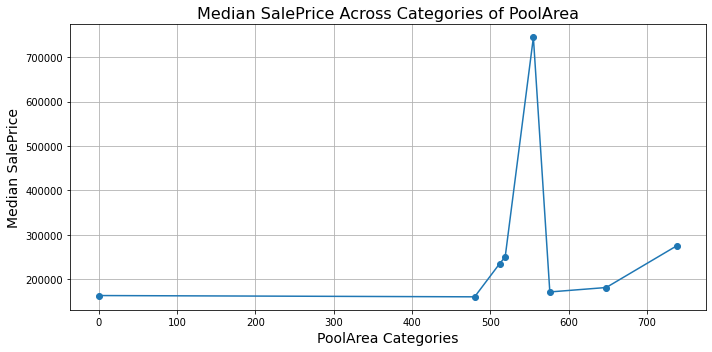

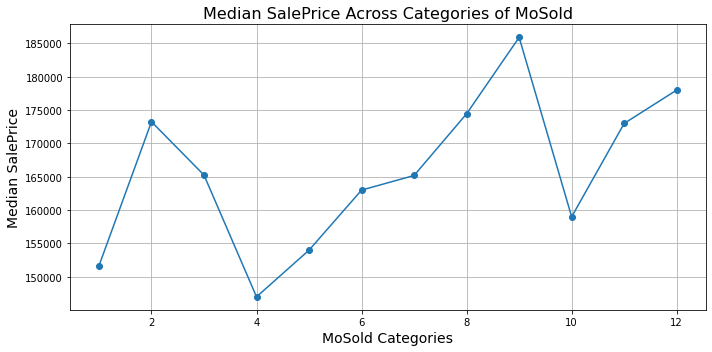

In [26]:
# Lets look for monotonic

for var in discrete:
    # Calculate the median 'SalePrice' for each category
    category_medians = data.groupby(var)['SalePrice'].median()
    
    # Plotting
    plt.figure(figsize=(10, 5))
    category_medians.plot( marker='o', linestyle='-')
    
    # Enhancing the chart
    plt.title(f'Median SalePrice Across Categories of {var}', fontsize=16)
    plt.xlabel(f'{var} Categories', fontsize=14)
    plt.ylabel('Median SalePrice', fontsize=14)
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Conclusion:

Some of the feature contain monotonic relationship but most of them not, so to do that i will encode this i later pipeline.

### Number of labels: cardinality

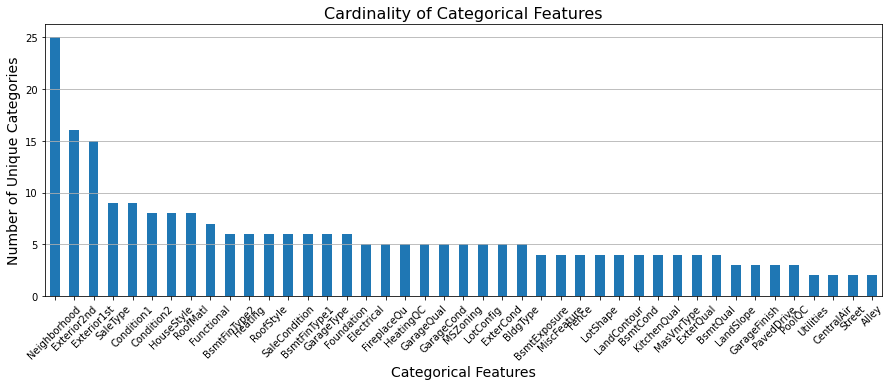

In [27]:
# Examine the cardinality of categorical features.
# Cardinality refers to the number of unique values (categories) in each categorical feature.
# High cardinality can pose challenges for certain machine learning algorithms.
# By visualizing the cardinality, we get a clear idea of which features might require further preprocessing.

# Plotting the number of unique values for each categorical feature
data[categorical].nunique().sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.title('Cardinality of Categorical Features', fontsize=16)
plt.ylabel('Number of Unique Categories', fontsize=14)
plt.xlabel('Categorical Features', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


Conclusion:

- Most of the variables contain only few variables, so cardionality is not big which is good information.


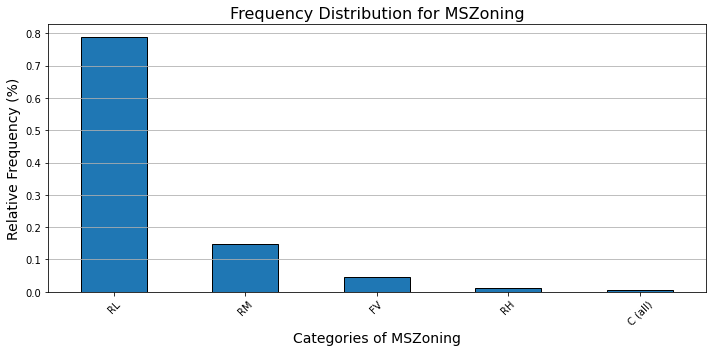

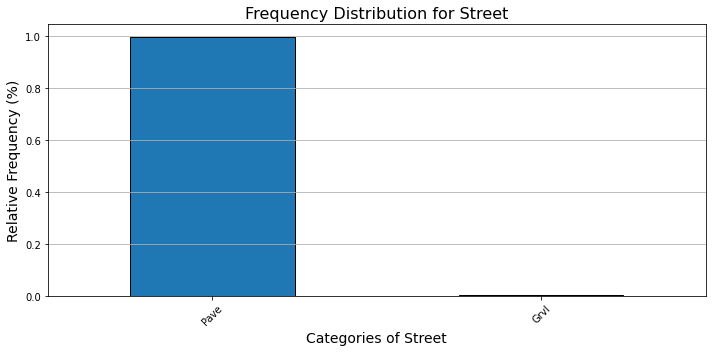

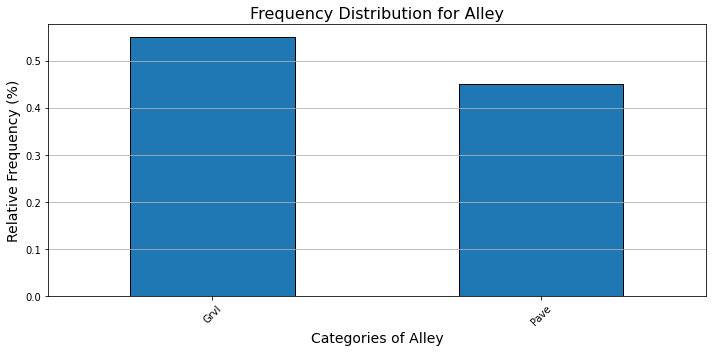

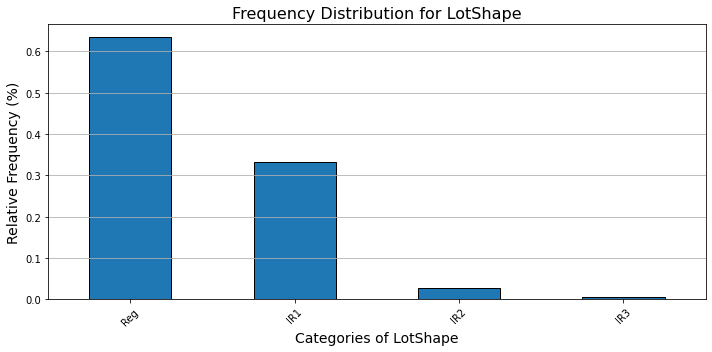

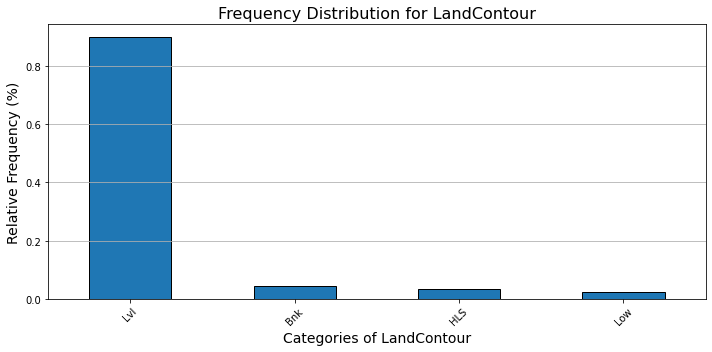

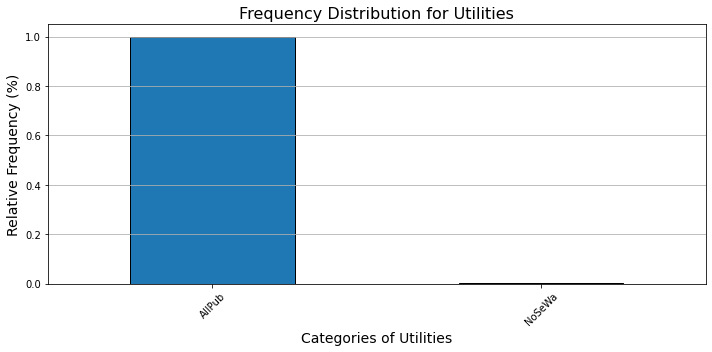

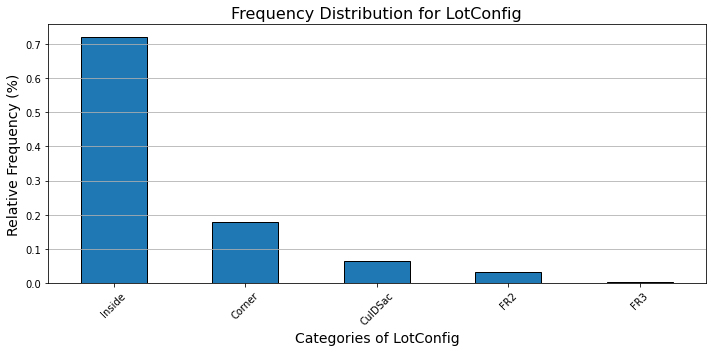

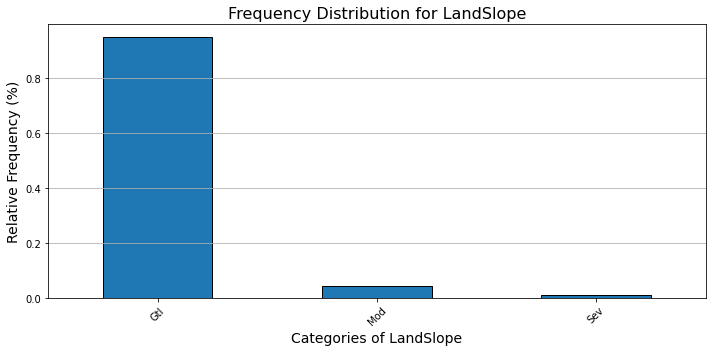

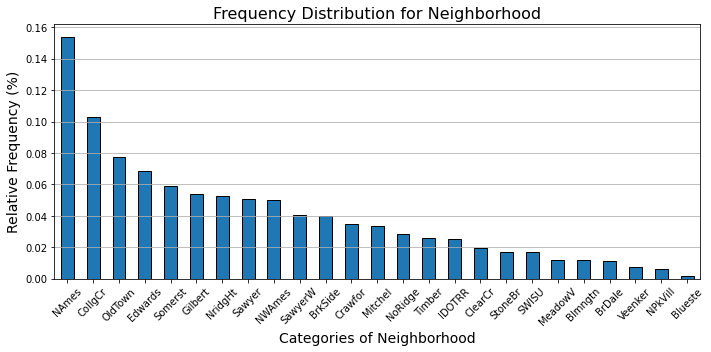

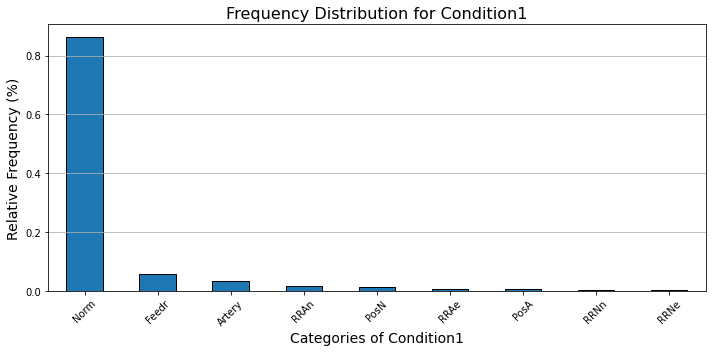

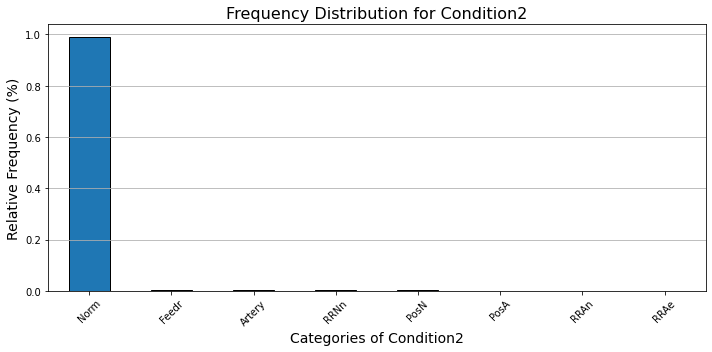

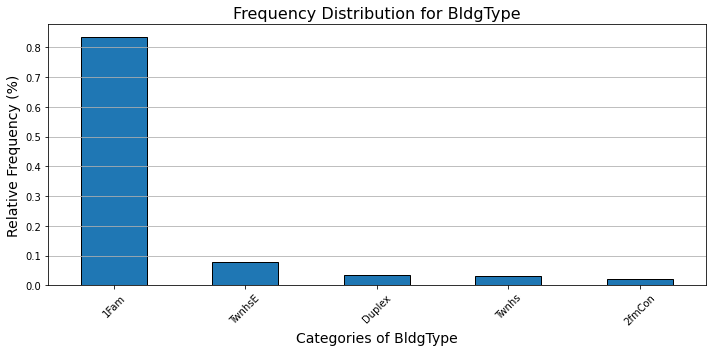

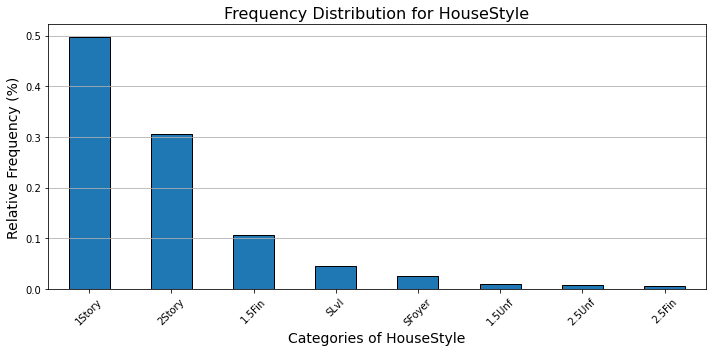

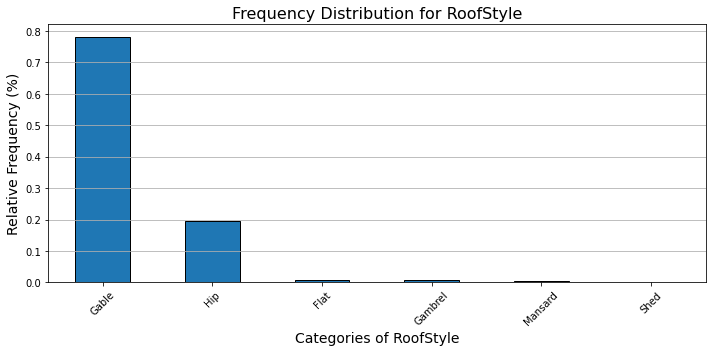

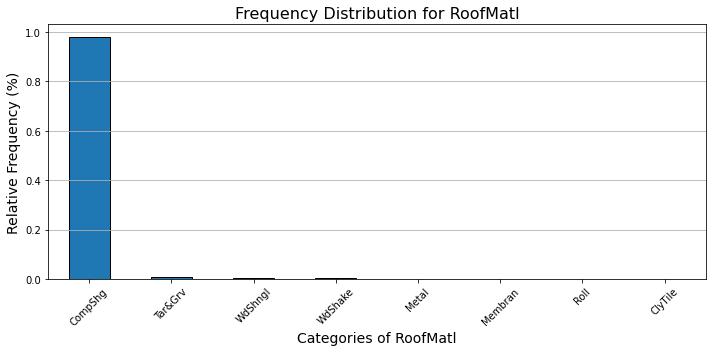

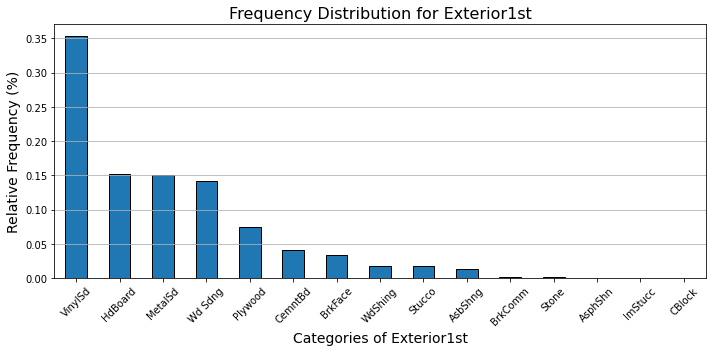

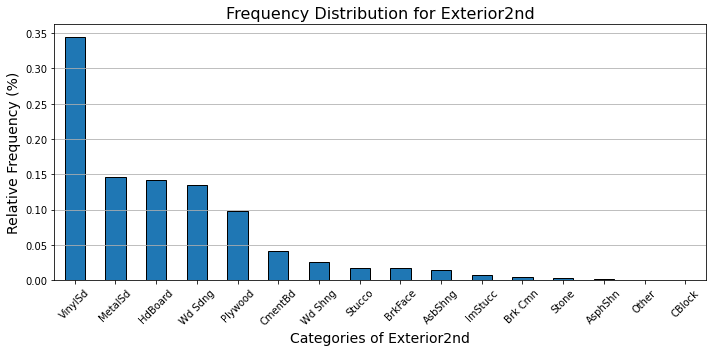

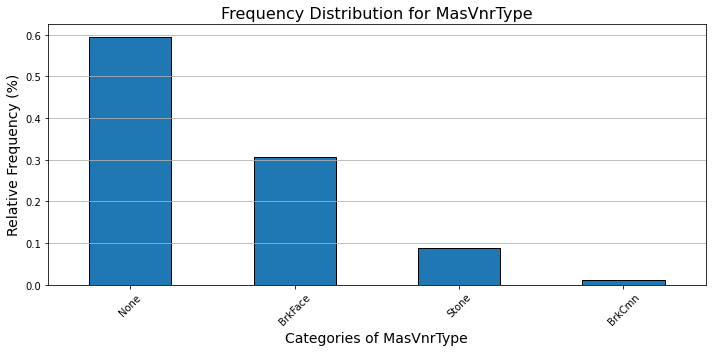

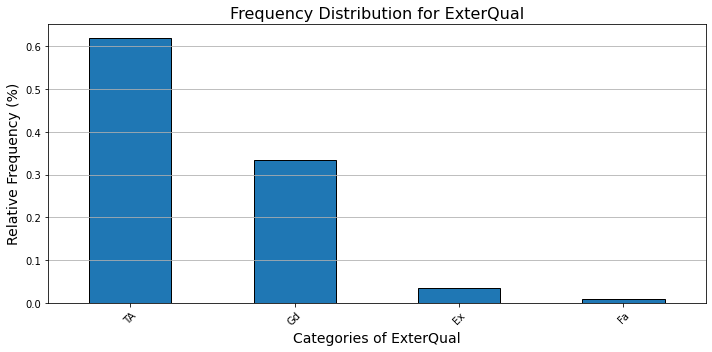

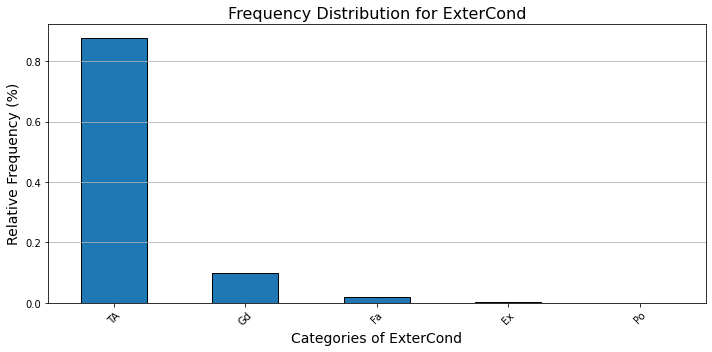

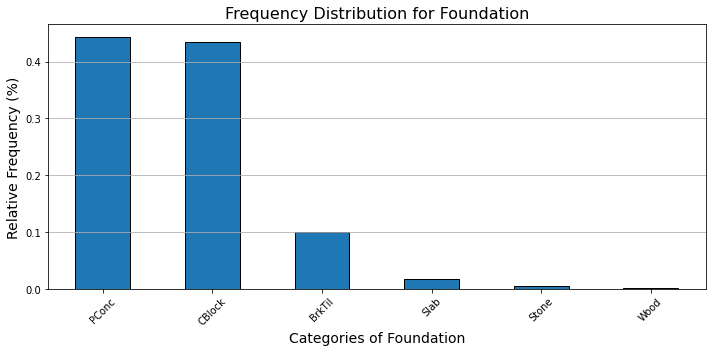

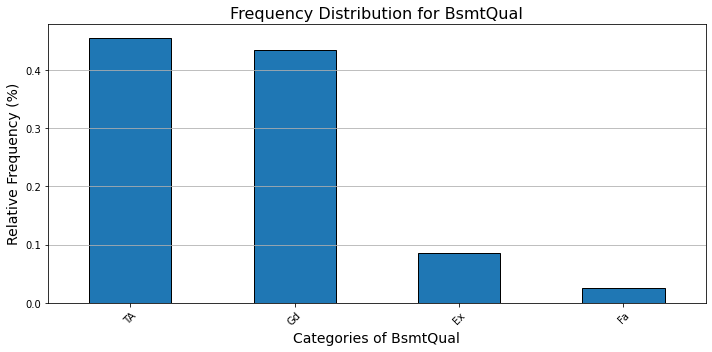

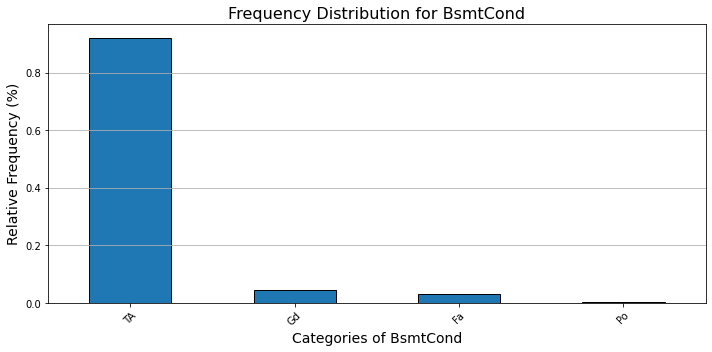

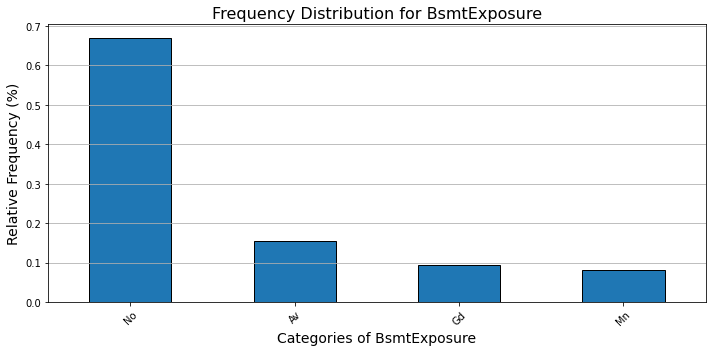

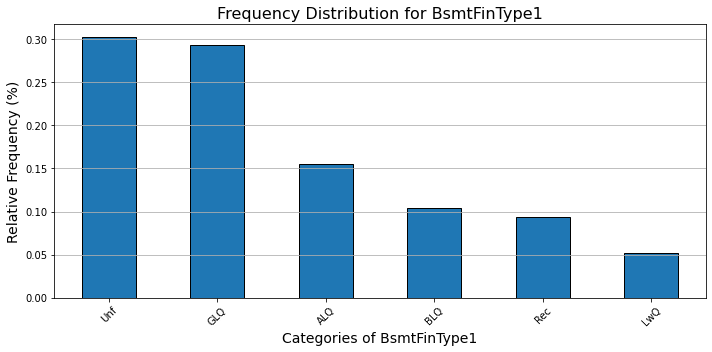

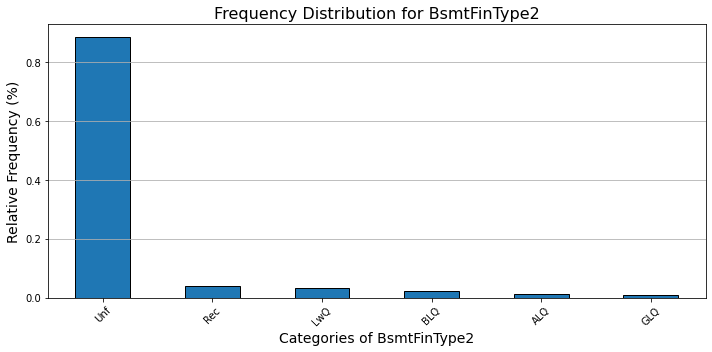

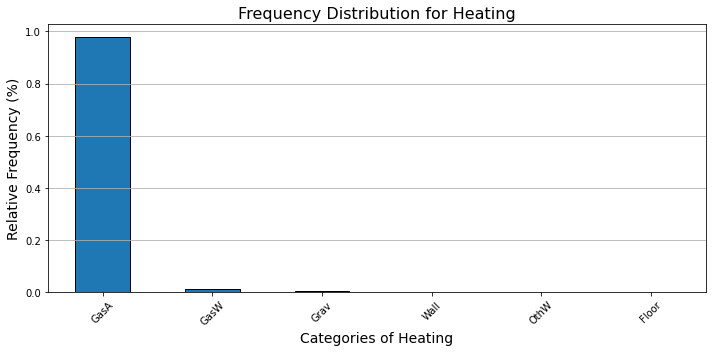

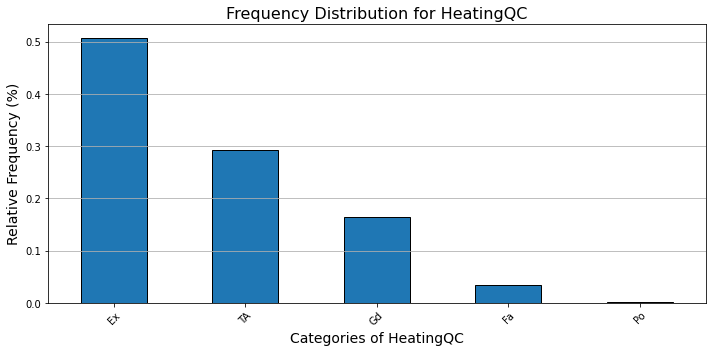

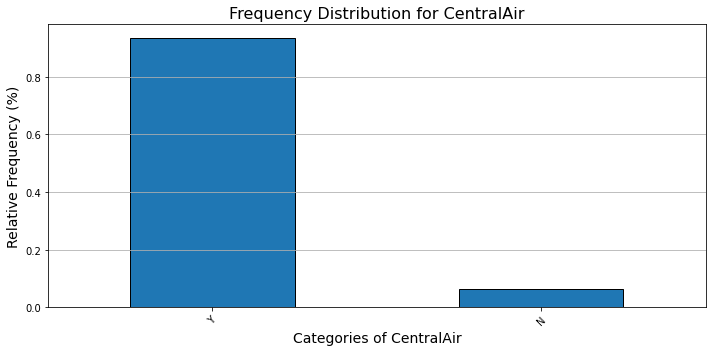

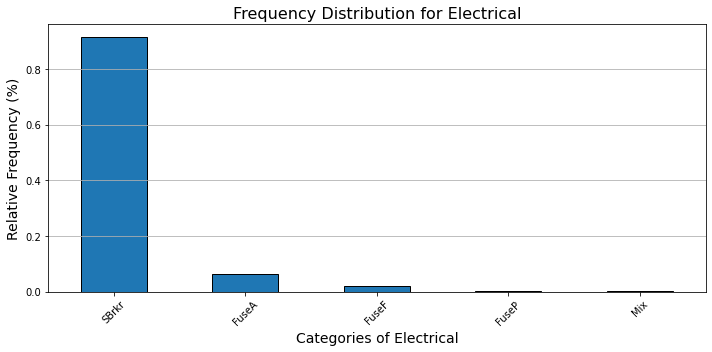

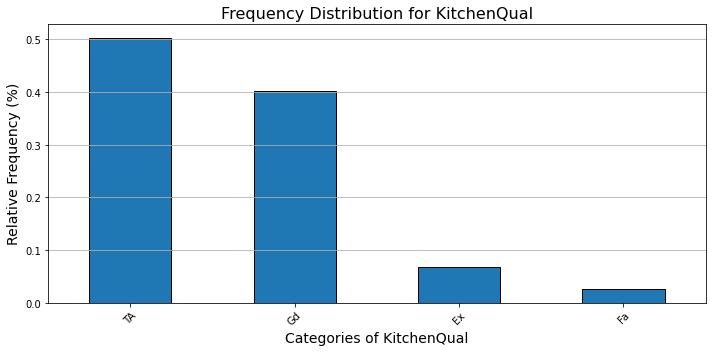

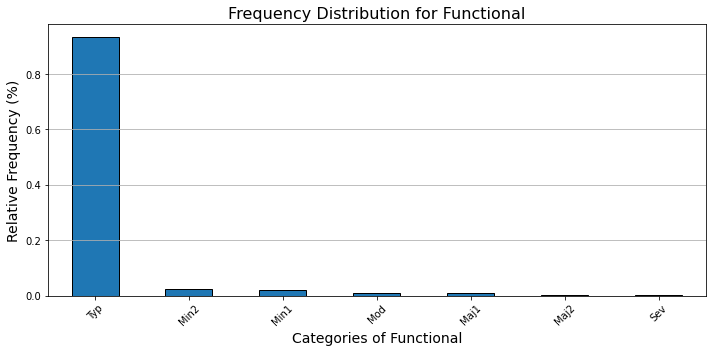

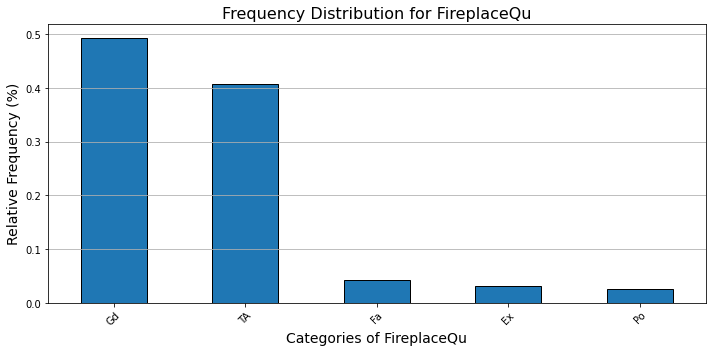

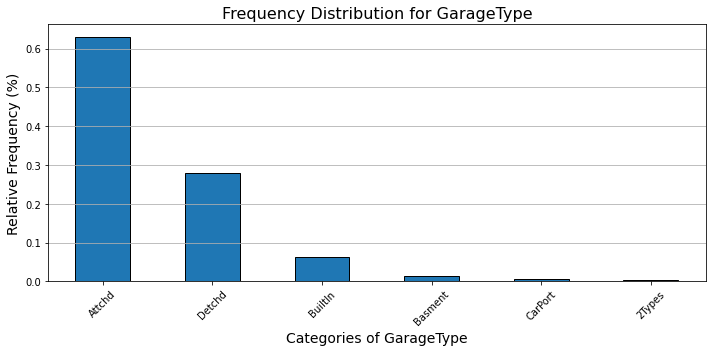

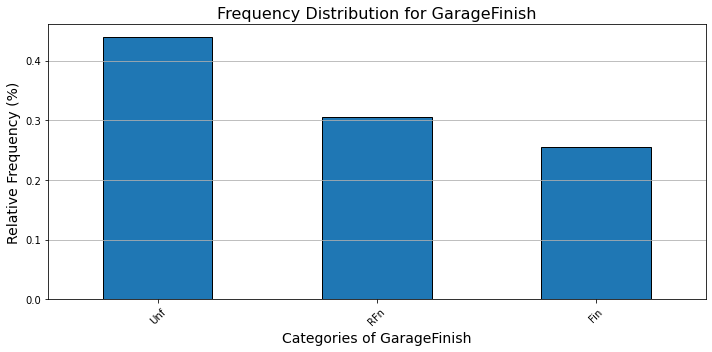

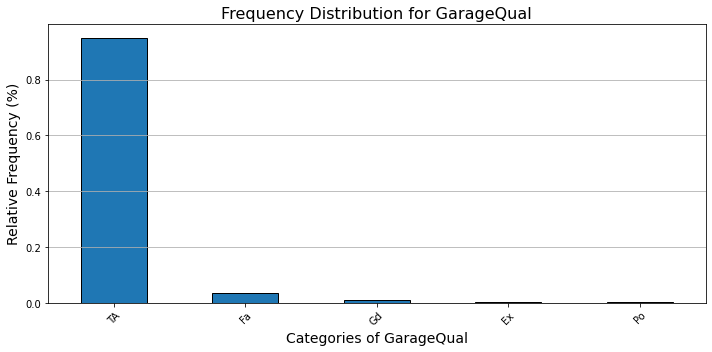

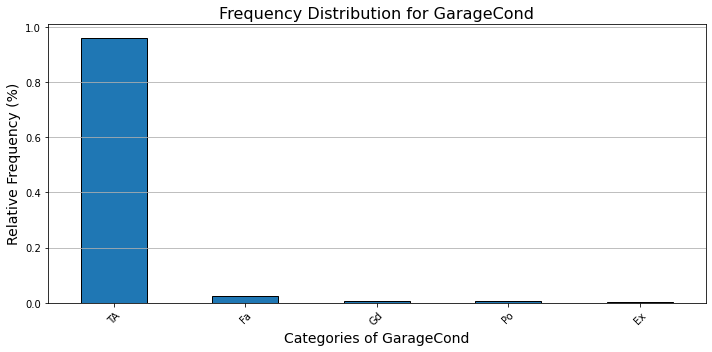

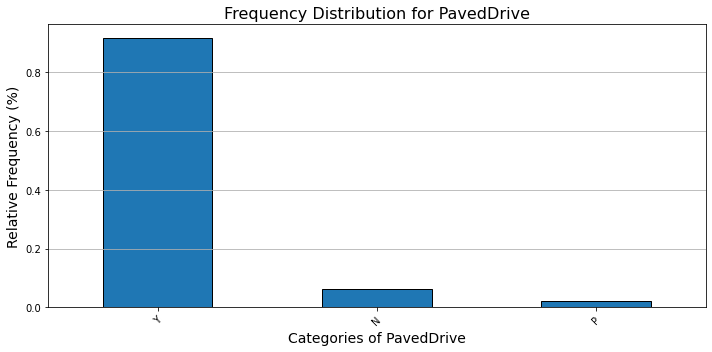

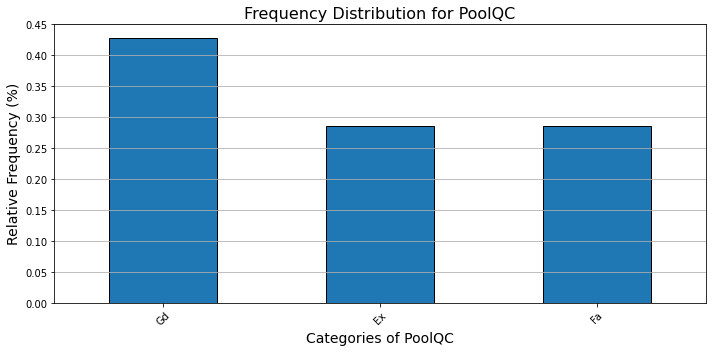

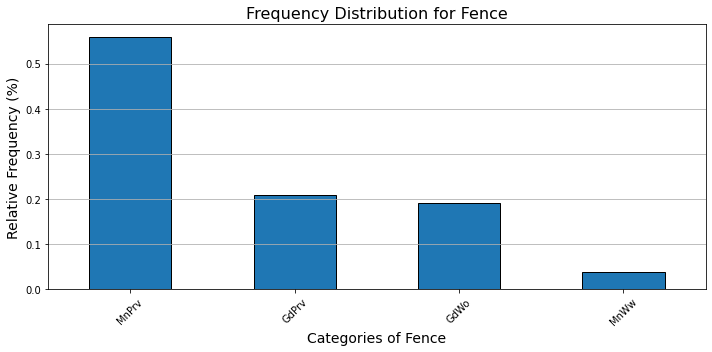

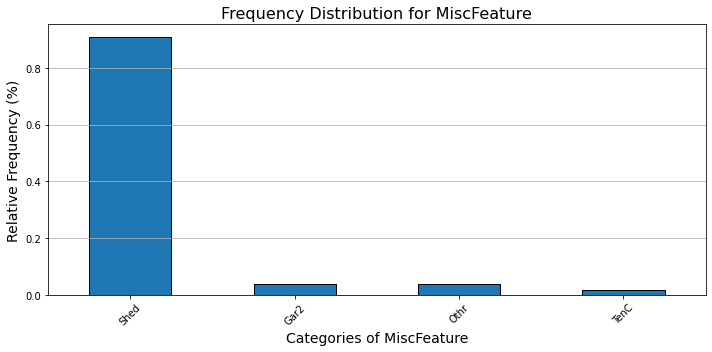

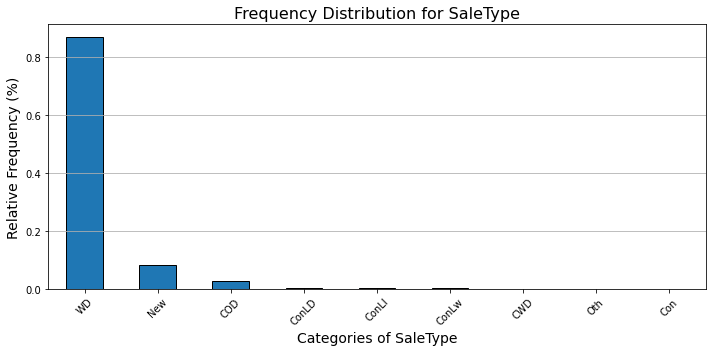

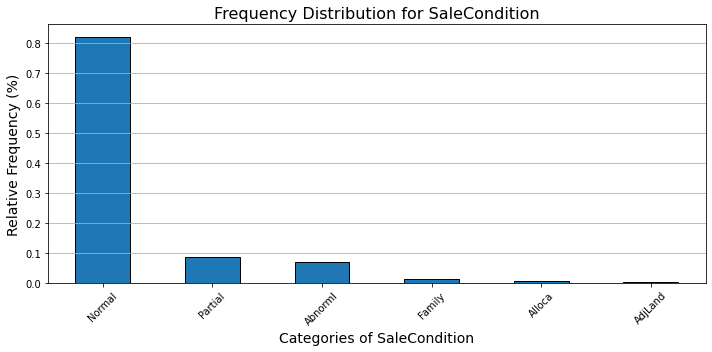

In [28]:
# Evaluate the frequency distribution of categories within each categorical variable.
# By visualizing the relative frequencies, we can understand the distribution of each category 
# and identify any imbalances that may impact model performance.

for var in categorical:
    # Calculate and plot the relative frequency of each category
    data[var].value_counts(normalize=True).sort_values(ascending=False).plot.bar(figsize=(10, 5), edgecolor='black')
    plt.title(f'Frequency Distribution for {var}', fontsize=16)
    plt.xlabel(f'Categories of {var}', fontsize=14)
    plt.ylabel('Relative Frequency (%)', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.tight_layout()
    plt.show()


Conclusion:
- We can see that frequency in each variable mostly contain rare labels which we could pontentialy encode as rare labels

### Separate train and test set

In [29]:
# Split the dataset into training and testing sets.
# Exclude 'Id' and 'SalePrice' from predictors.
# Use 10% of data for testing.

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape


((1022, 79), (438, 79))

### Temporal features

In [30]:
# Create temporal features to capture time-based patterns.
# The function 'temporal' computes the difference between the year a property was sold ('YrSold')
# and the year specified in the input variable. This helps in capturing how old the property was 
# at the time of sale or how long since a particular event (e.g., renovation) occurred.

def temporal(df, var):
    df[var] = df['YrSold'] - df[var]
    return df


In [31]:
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [32]:
# Convert the 'YearBuilt', 'YearRemodAdd', and 'GarageYrBlt' features into temporal ones.
# These will represent the age of the property, the age since remodeling, and the age of the garage
# at the time of sale, respectively.

for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = temporal(X_train, var)
    X_test = temporal(X_test, var)


In [33]:
X_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
64           12            11         11.0
682          12            11         12.0
960          52             2          NaN
1384         70            59         70.0
1100         89            59         79.0

In [34]:
# Cause we extract values from YrSold, now we can drop that column

X_train.drop('YrSold', axis = 1, inplace = True)
X_test.drop('YrSold', axis = 1, inplace = True)

In [35]:
# Cause we dont use YrSold in our year_vars variables we can also drop it

year_vars.remove('YrSold')

In [36]:
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

### Missing data imputation

In [37]:
#  Lets look one more time for missing imputation by categories and numerical

for var in numerical + year_vars:
    if X_train[var].isna().mean() > 0:
        print(var,': ', X_train[var].isna().mean())

LotFrontage :  0.18493150684931506
MasVnrArea :  0.004892367906066536
GarageYrBlt :  0.05283757338551859


### Conclusion:
Based on the percentage of missing values observed:
1. 'LotFrontage' has about 17.7% missing values.
2. 'MasVnrArea' has a very low missing value rate of about 0.45%.
3. 'GarageYrBlt' has about 5.6% missing values.
Given the relatively low missing value percentages, we'll proceed with adding a missing indicator and performing mean imputation to fill these gaps.

In [38]:
# Now lets look one more time for categorical features to check best option for our missing values in X_train

for var in categorical:
    if X_train[var].isna().mean() > 0:
        print(var,': ', X_train[var].isna().mean())

Alley :  0.9393346379647749
MasVnrType :  0.004892367906066536
BsmtQual :  0.023483365949119372
BsmtCond :  0.023483365949119372
BsmtExposure :  0.023483365949119372
BsmtFinType1 :  0.023483365949119372
BsmtFinType2 :  0.02446183953033268
Electrical :  0.0009784735812133072
FireplaceQu :  0.46771037181996084
GarageType :  0.05283757338551859
GarageFinish :  0.05283757338551859
GarageQual :  0.05283757338551859
GarageCond :  0.05283757338551859
PoolQC :  0.99706457925636
Fence :  0.8131115459882583
MiscFeature :  0.9569471624266145


Conclusion:

- Several features, such as 'Alley', 'PoolQC', and 'MiscFeature', exhibit very high proportions of missing values, suggesting that they might have been recorded only under specific circumstances.
- Other features, like 'Electrical', have a minuscule amount of missing data.

Given the variability in missing data proportions and the presence of features with extremely high missing percentages, the "Categorical arbitrary imputer" is recommended as it offers flexibility and can handle features with diverse missingness patterns.

### Put it all together

In [39]:
# during pipe creation i saw that i need to change year_vars for categorical to not blend but flag missing values

X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

Data Preprocessing and Modeling Workflow:

1. Imputation:
   - **Numerical Variables**:
     - Add "missing indicators" to track originally missing values. This ensures we retain information about data absence.
     - Impute missing values. Given their low proportion, blending with median values is suitable since we've tracked missingness separately.
   - **Categorical Variables**:
     - Flag and fill missing values. Due to the high proportion of missing data in certain features, it's crucial to flag and impute these systematically.

2. Encoding:
   - **Categorical Features**:
     - Handle "rare labels". As observed, several features have categories that are rarely represented. Grouping these can enhance model stability.
     - Apply ordinal encoding. Since many features exhibit a monotonic relationship with the target, ordinal encoding can capture this relationship effectively.

3. Discretization and Encoding:
   - **Continuous Variables**:
     - Discretize values. Segmenting continuous variables into intervals can simplify patterns and improve model performance.
     - Apply ordinal encoding. Like with categorical variables, this step ensures that the discretized features maintain a monotonic relationship with the target.

4. Transformation:
   - Apply StandardScaler to standardize feature scales. This ensures features contribute equally to model performance, particularly important for linear models like Lasso.

5. Modeling:

   - Use the Gradient Boosting Regressor model. Given its ability to handle both linear and non-linear relationships and its robustness against overfitting, Gradient Boosting is a suitable choice for this dataset


In [40]:
house_pipe = Pipeline([
# firstly i will Add missing indicator and than Impute Numerical and Categorical values
    
    ('AddMissing_Imputer', imp.AddMissingIndicator(variables = ['LotFrontage','MasVnrArea','GarageYrBlt'])),
    ('Numerical_imputer', imp.MeanMedianImputer(imputation_method='median', variables = ['LotFrontage','MasVnrArea','GarageYrBlt'])),
    ('Categorical_imputer', imp.CategoricalImputer(imputation_method='missing', variables = categorical)),
    
# secondly i will encode categorical and discrete features
    
    ('rare_label', enc.RareLabelEncoder(tol=0.05, n_categories = 1, variables = categorical + discrete)),
    ('encode_cat', enc.OrdinalEncoder(encoding_method='ordered', variables= categorical + discrete)),
    
# Then i will discretise and encode numerical features
    
    ('discretise_num', dsc.EqualFrequencyDiscretiser(q = 5,return_object=True, variables = continuous)),
    ('encode_num', enc.OrdinalEncoder(encoding_method='ordered', variables = continuous)),
    
# Lets make preprocessing to scale equally values
    
    ('preprocess', StandardScaler()),
    
# Last we need to put our model, in this case GradientBoostingRegressor
    
    ('regressor', GradientBoostingRegressor(random_state = 0))
])

In [41]:
# Train the `house_pipe` pipeline on the training data.
# This step involves executing all preprocessing tasks (like imputation, encoding, and scaling) 
# and then fitting the GradienBoostingRegressor model to the training data.

house_pipe.fit(X_train,y_train).set_output(transform = 'pandas')

Pipeline(steps=[('AddMissing_Imputer',
                 AddMissingIndicator(variables=['LotFrontage', 'MasVnrArea',
                                                'GarageYrBlt'])),
                ('Numerical_imputer',
                 MeanMedianImputer(variables=['LotFrontage', 'MasVnrArea',
                                              'GarageYrBlt'])),
                ('Categorical_imputer',
                 CategoricalImputer(variables=['MSZoning', 'Street', 'Alley',
                                               'LotShape', 'LandContour',
                                               'Utilities', 'LotConfig',
                                               'LandSlope', '...
                ('encode_num',
                 OrdinalEncoder(variables=['LotFrontage', 'LotArea',
                                           'MasVnrArea', 'BsmtFinSF1',
                                           'BsmtFinSF2', 'BsmtUnfSF',
                                           'TotalBsmtSF', '1stFlrSF',
                                           '2ndFlrSF', 'LowQualFinSF',
                                           'GrLivArea', 'GarageArea',
                                           'WoodDeckSF', 'OpenPorchSF',
                                           'EnclosedPorch', '3SsnPorch',
                                           'ScreenPorch', 'MiscVal'])),
                ('preprocess', StandardScaler()),
                ('regressor', GradientBoostingRegressor(random_state=0))])

In [42]:
# Transform the training data using the pipeline (excluding the regressor) to get the feature names after transformation
X_train_transformed = house_pipe.named_steps['preprocess'].transform(house_pipe[:-1].transform(X_train))

# Get the feature names after all transformations
transformed_feature_names = X_train_transformed.columns.tolist()

In [43]:
# Generate predictions on both training and testing datasets.
# `X_train_pred` contains the model's predictions on the training data.
# `X_test_pred` contains the model's predictions on the testing (unseen) data.

X_train_pred = house_pipe.predict(X_train)
X_test_pred = house_pipe.predict(X_test)



C:\Users\pkucharzak\Anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Users\pkucharzak\Anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [44]:
# Evaluate the performance of the model on the training and testing datasets using different metrics.

# 1. Mean Absolute Error (MAE) on the training data:
# This metric represents the average absolute difference between the actual and predicted values.
# A lower MAE indicates a better fit of the model to the data.
train_mae = mean_absolute_error(y_train, X_train_pred)
print(f"Mean Absolute Error (Training Data): {train_mae:.2f}")


# 2. R-squared (R^2) score on the training data:
# This metric provides an indication of the goodness of fit of the model. 
# An R^2 value close to 1 indicates that the model explains a large proportion of the variance in the response variable.
train_r2 = r2_score(y_train, X_train_pred)
print(f"R-squared Score (Training Data): {train_r2:.2f}")


# 3. R-squared (R^2) score on the testing data:
# Evaluating R^2 on the testing data provides insights into the model's generalization capability on unseen data.
test_r2 = r2_score(y_test, X_test_pred)
print(f"R-squared Score (Testing Data): {test_r2:.2f}")



Mean Absolute Error (Training Data): 11847.03
R-squared Score (Training Data): 0.96
R-squared Score (Testing Data): 0.86


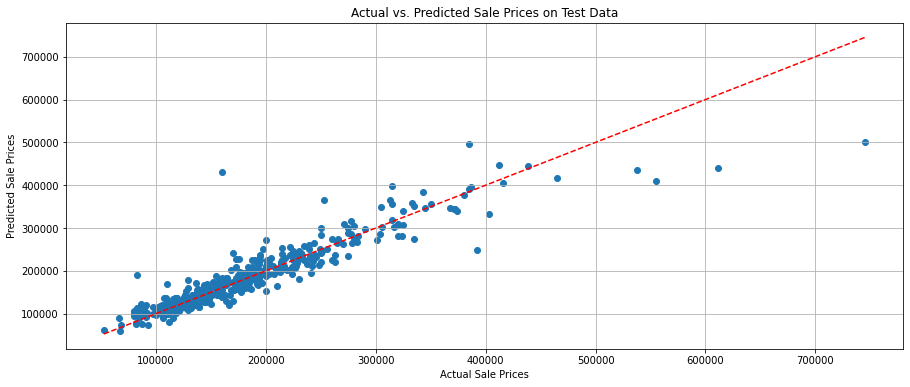

In [45]:
# Scatter plot to visualize the relationship between actual and predicted values for the test data.
# Ideally, for a perfect model, all points should lie on the 45-degree diagonal (y=x line).
# Deviations from this line indicate prediction errors.

plt.figure(figsize=(15, 6))
plt.scatter(y_test, X_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs. Predicted Sale Prices on Test Data')
plt.grid(True)
plt.show()


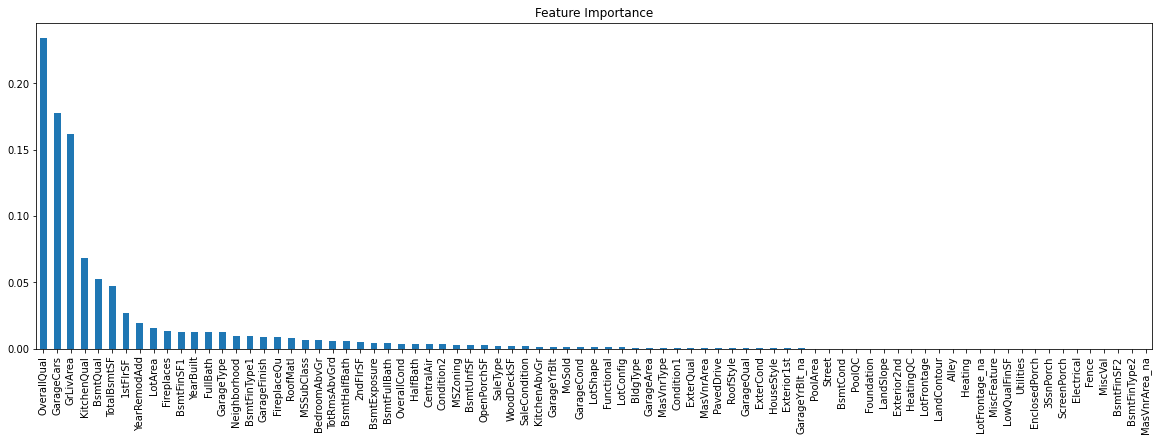

In [46]:
importances = pd.Series(house_pipe.named_steps['regressor'].feature_importances_, index=transformed_feature_names).abs()
importances.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.title('Feature Importance')
plt.show()


# NOW I WILL MAKE TRANSFORMATION

In [47]:
from feature_engine import outliers as out

In [48]:
pipe_housing = Pipeline([
# firstly i will Add missing indicator and than Impute Numerical and Categorical values
    
    ('AddMissing_Imputer', imp.AddMissingIndicator(variables = ['LotFrontage','MasVnrArea','GarageYrBlt'])),
    ('Numerical_imputer', imp.MeanMedianImputer(imputation_method='median', variables = ['LotFrontage','MasVnrArea','GarageYrBlt'])),
    ('Categorical_imputer', imp.CategoricalImputer(imputation_method='missing', variables = categorical)),
    
# secondly i will encode categorical and discrete features
    
    ('rare_label', enc.RareLabelEncoder(tol=0.05, n_categories = 1, variables = categorical + discrete)),
    ('encode_cat', enc.OrdinalEncoder(encoding_method='ordered', variables= categorical + discrete)),
    
# Then i will discretise and encode numerical features
    
    ('discretise_num', dsc.EqualFrequencyDiscretiser(q = 5,return_object=True, variables = continuous)),
    ('encode_num', enc.OrdinalEncoder(encoding_method='ordered', variables = continuous)),
    
# Lets make preprocessing to scale equally values
    
    ('preprocess', StandardScaler()),
])

In [49]:
pipe_housing.fit(X_train,y_train)
pipe_housing.set_output(transform = 'pandas')

X_train_t = pipe_housing.transform(X_train)
X_test_t = pipe_housing.transform(X_test)

### Lets evaluate our model using GridSearch to find best params_


In [50]:
# Couse we have already transformed data i will use it to evaluate only our regressor

pipe = Pipeline([
    ('gbr',GradientBoostingRegressor(n_estimators = 50,verbose = 10, tol = 0.01, random_state = 0))
])

In [51]:
pipe.fit(X_train_t,y_train)

      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            0.34s
         2  4643160462.0692            0.29s
         3  4094402852.1937            0.28s
         4  3623864230.6316            0.29s
         5  3207681587.4109            0.28s
         6  2870111607.9725            0.27s
         7  2540974934.4724            0.26s
         8  2285457037.2011            0.25s
         9  2051170382.3111            0.25s
        10  1870975398.9274            0.24s
        11  1717268347.6679            0.23s
        12  1567316677.8928            0.22s
        13  1440478470.4923            0.22s
        14  1331300312.8602            0.21s
        15  1239176707.1524            0.20s
        16  1147811444.6780            0.19s
        17  1071758001.1620            0.19s
        18  1011281493.0173            0.18s
        19   948175338.7437            0.17s
        20   897253271.0061            0.17s
        21   850407052.4830            0.16s
        2

Pipeline(steps=[('gbr',
                 GradientBoostingRegressor(n_estimators=50, random_state=0,
                                           tol=0.01, verbose=10))])

In [52]:
# Lets make params for GridSearch evaluation

params = {
    'gbr__n_estimators':[50,100,150,200,250,300,350,400],
    'gbr__tol':[0.01,0.05,0.1,0.15,0.2]
}

In [53]:
# I will make GridSearch Cv to find best parrameters in our model

grids = GridSearchCV(pipe,params,cv=5,n_jobs=-1, verbose = 10)
grids.fit(X_train_t,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.24s
         2  4643160462.0692            0.99s
         3  4094402852.1937            1.02s
         4  3623864230.6316            0.98s
         5  3207681587.4109            0.98s
         6  2870111607.9725            0.97s
         7  2540974934.4724            0.97s
         8  2285457037.2011            0.97s
         9  2051170382.3111            0.96s
        10  1870975398.9274            0.96s
        11  1717268347.6679            0.96s
        12  1567316677.8928            0.95s
        13  1440478470.4923            0.95s
        14  1331300312.8602            0.96s
        15  1239176707.1524            0.95s
        16  1147811444.6780            0.96s
        17  1071758001.1620            0.96s
        18  1011281493.0173            0.96s
        19   948175338.7437            0.96s
        20   897253271.0061          

       196   161211553.7372            0.26s
       197   160352110.4237            0.25s
       198   159176576.5467            0.25s
       199   158931645.1227            0.25s
       200   158536132.1524            0.24s
       201   158066512.7278            0.24s
       202   157424781.9456            0.23s
       203   156758779.0023            0.23s
       204   155960868.1838            0.22s
       205   155597585.0084            0.22s
       206   154920268.1909            0.22s
       207   154623795.7463            0.21s
       208   154022715.9283            0.21s
       209   153338901.3635            0.20s
       210   152942443.3503            0.20s
       211   152269084.8919            0.19s
       212   150614417.3383            0.19s
       213   150242437.6984            0.18s
       214   149784960.0280            0.18s
       215   149273034.0593            0.18s
       216   148494176.1532            0.17s
       217   147242186.1033            0.17s
       218

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gbr',
                                        GradientBoostingRegressor(n_estimators=50,
                                                                  random_state=0,
                                                                  tol=0.01,
                                                                  verbose=10))]),
             n_jobs=-1,
             param_grid={'gbr__n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                               400],
                         'gbr__tol': [0.01, 0.05, 0.1, 0.15, 0.2]},
             verbose=10)

In [54]:
print(f'Train Set Score:{grids.score(X_train_t,y_train)}')
print(f'Test Set Score:{grids.score(X_test_t,y_test)}')
print(f'Best parrams:{grids.best_params_}')

Train Set Score:0.9787338404660276
Test Set Score:0.8645601039238847
Best parrams:{'gbr__n_estimators': 250, 'gbr__tol': 0.01}


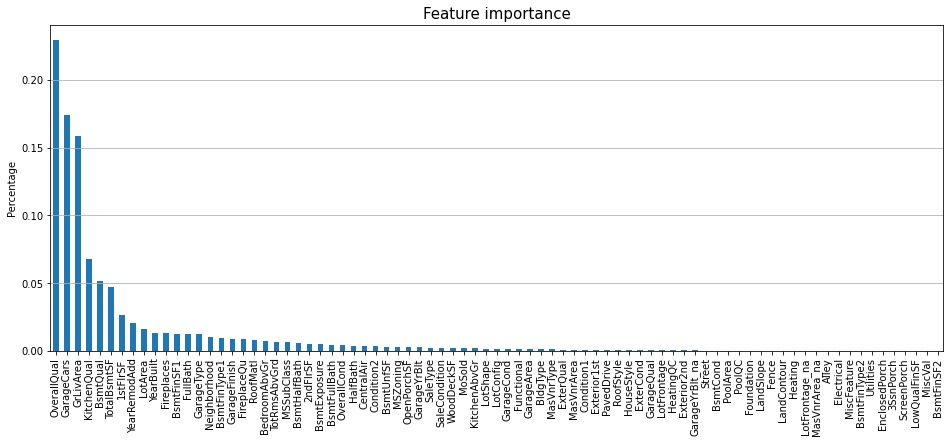

In [55]:
# Lets plot feature selection
feature_importances = pd.Series(grids.best_estimator_.named_steps['gbr'].feature_importances_)
feature_importances.index = X_train_t.columns
feature_importances = feature_importances.sort_values(ascending = False)
feature_importances.plot.bar(figsize = (16,6))
plt.title('Feature importance', fontsize = 15)
plt.ylabel('Percentage')
plt.grid(axis = 'y')

plt.show()

Conclusion:
   - As we can see we have many features which are not importante in our model 
   - To find best results we need to select most valuable features
   - Just in a view we can see that best are first 10-30 features 

# Finding Best Feature Selection number - using Loop

In [56]:
# Actual loop for feature selection
best_score = 0
best_num_features = 0
history_df = pd.DataFrame(columns=['num_features', 'train_score', 'test_score'])

for num_features in range(1, len(feature_importances) + 1):
    selected_features = feature_importances.nlargest(num_features).index
    X_train_selected = X_train_t[selected_features]
    X_test_selected = X_test_t[selected_features]
    
    model = GradientBoostingRegressor(n_estimators = 300,verbose = 10, tol = 0.15, random_state = 0)
    model.fit(X_train_selected, y_train)
    
    train_score = r2_score(y_train, model.predict(X_train_selected))
    test_score = r2_score(y_test, model.predict(X_test_selected))
    
    
    # Append to history_df
    history_df = history_df.append({
        'num_features': num_features,
        'train_score': train_score,
        'test_score': test_score
    }, ignore_index=True)

# Compute difference between train and test scores
history_df['score_difference'] = history_df['train_score'] - history_df['test_score']

history_df

      Iter       Train Loss   Remaining Time 
         1  5549584368.2707            0.32s
         2  5103945177.1322            0.36s
         3  4742977432.3100            0.30s
         4  4450593559.0041            0.30s
         5  4213762621.6263            0.29s
         6  4021929562.3502            0.29s
         7  3866544784.3366            0.30s
         8  3740683114.1456            0.36s
         9  3638735161.2909            0.35s
        10  3556157319.4786            0.35s
        11  3489269267.6106            0.36s
        12  3435089945.5975            0.34s
        13  3391204694.7669            0.33s
        14  3355657641.5942            0.33s
        15  3326864528.5242            0.32s
        16  3303542106.9376            0.32s
        17  3284650945.4524            0.32s
        18  3269349104.6494            0.31s
        19  3256954613.5989            0.31s
        20  3246915075.8481            0.32s
        21  3238783050.2699            0.32s
        2

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5328402758.8907            0.30s
         2  4716703083.1436            0.30s
         3  4205234397.3821            0.31s
         4  3790944761.9153            0.37s
         5  3437133469.0424            0.35s
         6  3148490665.5107            0.39s
         7  2913367405.1993            0.38s
         8  2721366647.0562            0.36s
         9  2560526617.5300            0.37s
        10  2427088896.6434            0.38s
        11  2317190816.4178            0.37s
        12  2226411759.2856            0.36s
        13  2151135726.9266            0.35s
        14  2088207966.7338            0.35s
        15  2036755750.4715            0.34s
        16  1993982982.3575            0.34s
        17  1957774832.7727            0.33s
        18  1928269179.7380            0.33s
        19  1904163342.7367            0.33s
        20  1883178940.7654            0.32s
        21  1866098580.6025            0.32s
        2

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        31  1302379124.6664            0.29s
        32  1297406553.5484            0.28s
        33  1292873968.9577            0.28s
        34  1290092352.8188            0.28s
        35  1286747545.2582            0.28s
        36  1284749233.1436            0.28s
        37  1281991031.0940            0.27s
        38  1280538500.6126            0.27s
        39  1277356642.1578            0.27s
        40  1274683554.9851            0.27s
        41  1273057746.7587            0.27s
        42  1271694763.9173            0.26s
        43  1269910485.3502            0.26s
        44  1268791139.0801            0.26s
        45  1267884176.0825            0.26s
        46  1266633025.4530            0.25s
        47  1265393735.4035            0.25s
        48  1264635267.0814            0.25s
        49  1263740196.7240            0.25s
        50  1262594769.6808            0.25s
        51  1262086987.2816            0.25s
        52  1261550182.3588            0.25s
        53

       249  1235897912.8979            0.04s
       250  1235862361.8045            0.04s
       251  1235829365.7874            0.04s
       252  1235787247.8178            0.04s
       253  1235722934.5017            0.04s
       254  1235629001.0234            0.04s
       255  1235590409.7790            0.04s
       256  1235553878.8143            0.04s
       257  1235522262.2333            0.04s
       258  1235491916.2470            0.04s
       259  1235461781.2297            0.04s
       260  1235402425.9723            0.04s
       261  1235342005.9951            0.03s
       262  1235271100.0073            0.03s
       263  1235236541.5605            0.03s
       264  1235208177.3724            0.03s
       265  1235182281.8175            0.03s
       266  1235125276.4893            0.03s
       267  1235098689.6213            0.03s
       268  1235075816.2847            0.03s
       269  1235005719.2814            0.03s
       270  1234956062.8571            0.03s
       271

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


       133  1108906184.8712            0.14s
       134  1108769620.9272            0.14s
       135  1107803968.9316            0.14s
       136  1107660791.1612            0.14s
       137  1107542651.8894            0.14s
       138  1107432061.8734            0.14s
       139  1107308100.2538            0.14s
       140  1107129691.4665            0.14s
       141  1107029470.6628            0.14s
       142  1106942304.6544            0.13s
       143  1106800535.2834            0.13s
       144  1106572365.1827            0.13s
       145  1105973124.0990            0.13s
       146  1105560931.0972            0.13s
       147  1105064753.6223            0.13s
       148  1104946183.6663            0.13s
       149  1104507575.8846            0.13s
       150  1103937819.0394            0.13s
       151  1103718195.1248            0.13s
       152  1103389895.8170            0.13s
       153  1103259709.8856            0.12s
       154  1103078603.2217            0.12s
       155

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        11  1897741759.1672            0.31s
        12  1781794100.5516            0.31s
        13  1681168616.7644            0.32s
        14  1597721994.8093            0.32s
        15  1527006823.2748            0.32s
        16  1464955075.1007            0.32s
        17  1412091623.5377            0.31s
        18  1368358981.0875            0.31s
        19  1331025282.7032            0.31s
        20  1299665916.7095            0.31s
        21  1271785053.6636            0.31s
        22  1248012609.2408            0.30s
        23  1228029085.3080            0.30s
        24  1209380055.0457            0.30s
        25  1192938998.6532            0.30s
        26  1180167793.1445            0.29s
        27  1169012611.6884            0.29s
        28  1158831778.5478            0.29s
        29  1150768242.8328            0.30s
        30  1142978905.0506            0.30s
        31  1136129618.5205            0.29s
        32  1128558366.3229            0.29s
        33

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        29  1013128937.7577            0.27s
        30  1003532900.2773            0.27s
        31   994595837.1125            0.27s
        32   988475983.6919            0.28s
        33   982614362.0127            0.27s
        34   977795386.0164            0.27s
        35   972864123.5504            0.26s
        36   968665440.2670            0.26s
        37   964484988.7528            0.26s
        38   960891370.1710            0.26s
        39   957441395.1770            0.27s
        40   955166950.9231            0.26s
        41   952576132.4054            0.26s
        42   950123872.3672            0.26s
        43   947345304.1969            0.26s
        44   945465720.2116            0.26s
        45   943337921.4638            0.25s
        46   941611126.7618            0.25s
        47   939649267.6127            0.25s
        48   937249690.3178            0.25s
        49   935696492.0811            0.25s
        50   934189529.8880            0.25s
        51

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5317119293.3356            0.59s
         2  4663881240.9608            0.63s
         3  4111427230.5034            0.60s
         4  3655471634.5533            0.59s
         5  3214778369.8442            0.53s
         6  2871393457.3085            0.54s
         7  2582308142.4683            0.50s
         8  2326907927.4722            0.51s
         9  2126527544.8543            0.48s
        10  1953145335.1567            0.50s
        11  1800616390.6957            0.47s
        12  1666151896.9991            0.46s
        13  1563261925.5366            0.46s
        14  1466282069.8112            0.45s
        15  1392144665.0065            0.44s
        16  1320832905.5596            0.44s
        17  1265851665.2975            0.43s
        18  1214086720.8236            0.44s
        19  1169728166.7648            0.44s
        20  1136386949.3927            0.44s
        21  1102912442.3147            0.44s
        2

       234   771615993.6359            0.10s
       235   771532162.7172            0.10s
       236   771326229.0835            0.10s
       237   771133657.5163            0.10s
       238   770797669.7348            0.10s
       239   770603838.6925            0.10s
       240   770506014.9498            0.09s
       241   770203586.2117            0.09s
       242   770007144.2735            0.09s
       243   769873405.3202            0.09s
       244   769096156.5704            0.09s
       245   768857704.3649            0.09s
       246   768449049.3234            0.08s
       247   768261923.9821            0.08s
       248   767919015.6470            0.08s
       249   767258796.7093            0.08s
       250   766909367.8406            0.08s
       251   766689506.3040            0.08s
       252   766507694.5507            0.08s
       253   766241880.0864            0.07s
       254   765683076.2847            0.07s
       255   765347886.2394            0.07s
       256

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5317119293.3356            0.76s
         2  4663881240.9608            0.82s
         3  4107977360.3291            0.75s
         4  3649476791.2498            0.71s
         5  3207891773.9348            0.76s
         6  2864017493.6193            0.68s
         7  2550749201.3833            0.70s
         8  2307973121.6979            0.69s
         9  2110126702.1436            0.71s
        10  1939663925.1977            0.69s
        11  1776140459.1431            0.68s
        12  1646316286.8277            0.69s
        13  1527540789.7854            0.69s
        14  1424487087.6340            0.68s
        15  1334424235.2811            0.67s
        16  1263704300.1775            0.66s
        17  1198647002.5875            0.66s
        18  1145649540.1177            0.65s
        19  1097872573.2451            0.64s
        20  1054853300.8501            0.65s
        21  1015533760.5131            0.64s
        2

       193   519360577.6413            0.21s
       194   518753437.9926            0.21s
       195   518246501.5584            0.20s
       196   517687200.3923            0.20s
       197   517263281.2951            0.20s
       198   516367080.7573            0.20s
       199   515875070.1596            0.20s
       200   515429812.4891            0.19s
       201   514737030.0439            0.19s
       202   514323543.2049            0.19s
       203   514221764.4601            0.19s
       204   513545425.9917            0.19s
       205   513474962.8991            0.18s
       206   512441315.6475            0.18s
       207   511658998.9937            0.18s
       208   511160117.7264            0.18s
       209   510521994.9510            0.18s
       210   510105112.5971            0.17s
       211   509759015.9258            0.17s
       212   509168879.1154            0.17s
       213   508781337.6452            0.17s
       214   508124016.6017            0.17s
       215

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        66   603523099.1023            0.48s
        67   597192735.4419            0.48s
        68   596194857.1645            0.48s
        69   594262651.3381            0.48s
        70   592621316.4398            0.47s
        71   586825582.1231            0.47s
        72   585412656.5769            0.47s
        73   584333871.7221            0.46s
        74   580400526.8298            0.46s
        75   579717298.0472            0.46s
        76   578829717.4337            0.46s
        77   577634670.4073            0.46s
        78   573593864.5807            0.45s
        79   572704541.2952            0.45s
        80   571866540.3485            0.45s
        81   568558286.2345            0.45s
        82   567974269.0659            0.45s
        83   567154426.7019            0.44s
        84   566482898.5813            0.44s
        85   564366019.2251            0.44s
        86   563190977.9464            0.44s
        87   562561261.3719            0.43s
        88

       258   417708076.3912            0.08s
       259   417574269.2109            0.08s
       260   416960285.4882            0.08s
       261   416026678.3336            0.08s
       262   415090978.2341            0.08s
       263   414648010.5686            0.07s
       264   414487083.2459            0.07s
       265   414326147.6224            0.07s
       266   414141701.6594            0.07s
       267   414086655.7620            0.07s
       268   413339052.0028            0.06s
       269   412363440.9805            0.06s
       270   411701956.8445            0.06s
       271   410468326.0722            0.06s
       272   410048939.8643            0.06s
       273   409046592.1460            0.05s
       274   408465395.0881            0.05s
       275   407457444.3750            0.05s
       276   407090268.8292            0.05s
       277   406764619.8731            0.05s
       278   406416470.6154            0.04s
       279   406017576.2575            0.04s
       280

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        22   955296132.9021            0.69s
        23   924778622.6258            0.70s
        24   897693248.5920            0.70s
        25   874131029.8079            0.69s
        26   850859851.7134            0.68s
        27   832350637.0497            0.68s
        28   814500989.2701            0.67s
        29   797911515.6245            0.67s
        30   783275520.4506            0.66s
        31   770878189.0987            0.67s
        32   760148351.9858            0.66s
        33   733436054.0630            0.66s
        34   724760617.4365            0.66s
        35   716264740.8531            0.65s
        36   707485125.9149            0.65s
        37   700662800.7250            0.65s
        38   683166314.9196            0.65s
        39   676780172.3620            0.64s
        40   670559778.7827            0.64s
        41   664782447.0169            0.63s
        42   648171129.2472            0.62s
        43   643897440.1362            0.62s
        44

       262   350451094.8784            0.09s
       263   350193980.5512            0.09s
       264   349787142.7364            0.08s
       265   349191063.1389            0.08s
       266   348342331.5569            0.08s
       267   348054515.9940            0.08s
       268   347353277.4924            0.08s
       269   346801974.9915            0.07s
       270   346449082.6840            0.07s
       271   345748769.2552            0.07s
       272   345200916.3459            0.07s
       273   344822288.8966            0.06s
       274   344158886.6077            0.06s
       275   343638349.7898            0.06s
       276   343084778.9283            0.06s
       277   341553528.3686            0.05s
       278   341186143.0977            0.05s
       279   340344777.2542            0.05s
       280   339075836.4470            0.05s
       281   338598667.1636            0.04s
       282   338272208.7916            0.04s
       283   337982730.3029            0.04s
       284

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        38   654351329.9549            0.61s
        39   634982640.5260            0.60s
        40   621951400.4326            0.60s
        41   617394481.8650            0.60s
        42   613032129.6691            0.60s
        43   609348366.2684            0.60s
        44   603348189.0139            0.59s
        45   599135559.3716            0.59s
        46   589062723.8992            0.58s
        47   583699274.1782            0.58s
        48   580547825.3261            0.58s
        49   578093022.0860            0.58s
        50   569437956.1496            0.57s
        51   566585204.7630            0.57s
        52   564141134.7895            0.57s
        53   561296524.6459            0.56s
        54   555541289.9549            0.56s
        55   553436267.1063            0.55s
        56   550900862.0083            0.55s
        57   546446279.9404            0.54s
        58   544831540.0418            0.54s
        59   543450226.2766            0.53s
        60

       241   335313330.6233            0.11s
       242   334716719.2741            0.11s
       243   334095281.7558            0.11s
       244   333819693.0694            0.11s
       245   333343380.3137            0.11s
       246   332915488.3025            0.10s
       247   332217098.1698            0.10s
       248   332075363.1432            0.10s
       249   331324949.1231            0.10s
       250   330731009.9239            0.10s
       251   330378706.4203            0.09s
       252   329559277.6820            0.09s
       253   328522238.7308            0.09s
       254   328136788.9925            0.09s
       255   327795713.6846            0.09s
       256   327662478.0003            0.08s
       257   327468061.7126            0.08s
       258   326950195.3651            0.08s
       259   326658976.3178            0.08s
       260   325935107.4777            0.08s
       261   325299789.3846            0.07s
       262   324674102.1109            0.07s
       263

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        45   573552879.4843            0.43s
        46   569413023.3831            0.43s
        47   566308508.7460            0.42s
        48   561059037.8070            0.42s
        49   549383535.6610            0.42s
        50   545744876.3762            0.42s
        51   541391602.0730            0.42s
        52   538304711.7083            0.42s
        53   529847692.2278            0.42s
        54   526403538.6558            0.41s
        55   523254145.9619            0.41s
        56   515722524.5758            0.41s
        57   513259091.8043            0.41s
        58   510495318.8516            0.41s
        59   507365265.2016            0.41s
        60   504852693.4168            0.40s
        61   502423717.6825            0.40s
        62   498900341.1338            0.40s
        63   496662883.7239            0.40s
        64   494805663.6305            0.40s
        65   492757131.5468            0.40s
        66   490730032.9624            0.40s
        67

       262   276278276.8600            0.07s
       263   275921818.2422            0.06s
       264   274807765.4347            0.06s
       265   274429313.2729            0.06s
       266   274021433.1328            0.06s
       267   273430843.0226            0.06s
       268   273235184.4781            0.06s
       269   272882748.4625            0.05s
       270   272093389.4227            0.05s
       271   271153570.3389            0.05s
       272   270710007.7608            0.05s
       273   270146518.5148            0.05s
       274   269438230.0359            0.04s
       275   268765021.8998            0.04s
       276   267276109.0795            0.04s
       277   266722637.7800            0.04s
       278   266282720.8606            0.04s
       279   265045899.2603            0.04s
       280   263891831.8330            0.03s
       281   263189864.5224            0.03s
       282   262571478.7665            0.03s
       283   261664701.2882            0.03s
       284

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        48   503777384.6626            0.49s
        49   500731548.9296            0.49s
        50   496819797.2690            0.49s
        51   489729848.4908            0.48s
        52   487115737.3607            0.48s
        53   483774276.0900            0.48s
        54   480600490.2879            0.47s
        55   478378515.0288            0.47s
        56   471546413.7858            0.46s
        57   468176657.4957            0.46s
        58   465723283.7108            0.46s
        59   459618329.1137            0.45s
        60   457322739.2130            0.45s
        61   455207052.1717            0.45s
        62   452814955.2633            0.45s
        63   448050953.1170            0.44s
        64   446689320.7045            0.44s
        65   445318459.9981            0.44s
        66   443646113.0166            0.44s
        67   441805294.2882            0.43s
        68   439917892.8325            0.43s
        69   436232130.7510            0.43s
        70

       244   265357360.4150            0.11s
       245   264738986.9594            0.11s
       246   264233586.2605            0.10s
       247   263255922.6018            0.10s
       248   262360742.2060            0.10s
       249   262287444.5484            0.10s
       250   261659443.1462            0.10s
       251   261399811.3645            0.09s
       252   260790304.8654            0.09s
       253   260407363.3914            0.09s
       254   259539566.8123            0.09s
       255   259481552.1931            0.09s
       256   259166704.7673            0.08s
       257   258746915.5866            0.08s
       258   257972600.7215            0.08s
       259   257594482.7641            0.08s
       260   257337387.7005            0.08s
       261   256415609.9116            0.07s
       262   255686854.4469            0.07s
       263   255577372.9650            0.07s
       264   254810882.9167            0.07s
       265   253964845.6980            0.07s
       266

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        33   626326629.1348            0.52s
        34   612869830.7642            0.53s
        35   603440102.6436            0.53s
        36   592829217.9640            0.53s
        37   581807777.4000            0.52s
        38   573574444.0732            0.52s
        39   566197103.4124            0.51s
        40   557893833.7447            0.51s
        41   546466874.0373            0.51s
        42   533275489.3204            0.50s
        43   528194155.1637            0.50s
        44   522574350.6518            0.50s
        45   516625089.8895            0.50s
        46   511804329.3734            0.50s
        47   508443068.4994            0.49s
        48   497900083.1791            0.49s
        49   494229380.8319            0.49s
        50   489055727.0534            0.49s
        51   483619797.3918            0.49s
        52   481457902.0937            0.49s
        53   478273616.3625            0.49s
        54   470637060.6440            0.49s
        55

       216   279988894.8691            0.17s
       217   278993887.1685            0.17s
       218   278774278.9367            0.17s
       219   277621387.8505            0.17s
       220   276969693.0427            0.17s
       221   276792302.7636            0.16s
       222   276114873.7758            0.16s
       223   275196971.9671            0.16s
       224   274600747.7896            0.16s
       225   274555722.4701            0.16s
       226   273631840.5363            0.16s
       227   272325104.7885            0.15s
       228   271979880.4482            0.15s
       229   271839692.7123            0.15s
       230   271719010.1302            0.15s
       231   271385064.2028            0.15s
       232   271273551.7036            0.14s
       233   270304510.8076            0.14s
       234   269604355.9690            0.14s
       235   268566255.5052            0.14s
       236   267822614.0312            0.14s
       237   267141703.4610            0.13s
       238

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        23   835440726.5499            0.96s
        24   802400190.0421            0.95s
        25   772129618.9848            0.94s
        26   744999154.3630            0.95s
        27   719677606.2616            0.93s
        28   696350764.2501            0.92s
        29   676495915.9179            0.91s
        30   659245144.0663            0.91s
        31   642039389.3018            0.90s
        32   628292365.7447            0.89s
        33   613092243.0416            0.89s
        34   598913176.0066            0.89s
        35   588665341.4528            0.88s
        36   577487574.8889            0.89s
        37   569451092.1065            0.87s
        38   561276369.6226            0.87s
        39   551605610.6145            0.86s
        40   543635823.0716            0.85s
        41   528409724.7615            0.85s
        42   523103040.5851            0.84s
        43   517678768.5392            0.83s
        44   512160305.6398            0.83s
        45

       211   263418975.4505            0.27s
       212   262937675.8609            0.27s
       213   262426566.0013            0.26s
       214   261798513.2575            0.26s
       215   261407710.3055            0.26s
       216   260843003.5256            0.25s
       217   260453008.0975            0.25s
       218   260321059.3404            0.25s
       219   260170390.8486            0.24s
       220   259843578.0884            0.24s
       221   259211169.0234            0.24s
       222   258421881.2431            0.24s
       223   257939185.2501            0.23s
       224   257400159.0713            0.23s
       225   257208988.3924            0.23s
       226   256791905.1595            0.22s
       227   256274513.0464            0.22s
       228   256064397.3017            0.22s
       229   255808973.2731            0.21s
       230   255099551.8532            0.21s
       231   254489565.9982            0.21s
       232   253206911.4301            0.20s
       233

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        22   871093393.3964            0.96s
        23   831194377.3048            0.96s
        24   799506091.7787            0.95s
        25   765655075.7083            0.95s
        26   739935003.2587            0.97s
        27   716537228.4770            0.96s
        28   693406092.1415            0.96s
        29   674855047.7942            0.96s
        30   654707208.5790            0.96s
        31   635036767.5005            0.94s
        32   619561567.5325            0.94s
        33   607135175.4639            0.93s
        34   596346534.5971            0.91s
        35   585926488.4579            0.91s
        36   576474655.0117            0.89s
        37   567638747.6024            0.89s
        38   559727625.0194            0.89s
        39   548335884.8845            0.89s
        40   541202805.5214            0.89s
        41   535334251.6406            0.89s
        42   528230468.0878            0.88s
        43   521907776.2670            0.88s
        44

       258   236358717.4444            0.13s
       259   236233690.9310            0.13s
       260   236122919.8886            0.13s
       261   235741173.0948            0.12s
       262   235388122.4842            0.12s
       263   234732130.8870            0.12s
       264   234382129.3130            0.12s
       265   233389098.7760            0.11s
       266   232864422.6022            0.11s
       267   232656687.1442            0.11s
       268   232471610.4462            0.10s
       269   231904371.0175            0.10s
       270   231697242.0268            0.10s
       271   230735547.9978            0.09s
       272   230684864.8837            0.09s
       273   230525254.5774            0.09s
       274   229708031.0080            0.08s
       275   229275408.9183            0.08s
       276   229034749.7467            0.08s
       277   228043829.3103            0.07s
       278   227687118.3246            0.07s
       279   227298074.9900            0.07s
       280

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5313187905.4770            1.23s
         2  4660128630.6699            1.19s
         3  4108729458.6846            1.18s
         4  3645904560.4993            1.11s
         5  3202893875.1206            1.12s
         6  2850541805.8447            1.12s
         7  2570090818.5802            1.13s
         8  2301283470.6267            1.13s
         9  2077791117.3447            1.12s
        10  1895752411.8860            1.09s
        11  1739176189.6768            1.09s
        12  1606849478.5537            1.09s
        13  1482896094.5878            1.09s
        14  1374348387.4810            1.09s
        15  1273560263.6109            1.09s
        16  1181224416.3401            1.09s
        17  1108578762.0943            1.09s
        18  1049254546.8789            1.09s
        19   995953983.6391            1.07s
        20   940235243.9340            1.07s
        21   891585827.7808            1.05s
        2

       204   275205786.0775            0.35s
       205   274439448.4552            0.34s
       206   274006219.8859            0.34s
       207   272778620.0493            0.34s
       208   272575411.4667            0.33s
       209   272320759.0826            0.33s
       210   271757920.9229            0.33s
       211   271166142.1590            0.32s
       212   270520947.4202            0.32s
       213   270378631.9139            0.31s
       214   270115146.5361            0.31s
       215   269411979.4518            0.31s
       216   268539249.2421            0.31s
       217   268110541.5959            0.30s
       218   267584276.4033            0.30s
       219   267172677.5236            0.30s
       220   267039074.1576            0.29s
       221   266647402.7356            0.29s
       222   266072925.9213            0.28s
       223   265705732.0941            0.28s
       224   265117819.8220            0.28s
       225   264376061.8056            0.27s
       226

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        11  1739176189.6768            0.70s
        12  1606849478.5537            0.69s
        13  1482896094.5878            0.70s
        14  1374348387.4810            0.69s
        15  1273560263.6109            0.70s
        16  1181224416.3401            0.68s
        17  1108578762.0943            0.69s
        18  1049254546.8789            0.68s
        19   995953983.6391            0.67s
        20   940235243.9340            0.67s
        21   891585827.7808            0.67s
        22   849641616.8017            0.66s
        23   813164053.2021            0.66s
        24   777099419.9452            0.66s
        25   748050603.1677            0.65s
        26   722973302.6808            0.64s
        27   700238013.1257            0.65s
        28   678997849.0471            0.64s
        29   658898870.7505            0.64s
        30   641101258.7986            0.64s
        31   624036046.1405            0.63s
        32   608967173.9487            0.63s
        33

       194   281057396.8815            0.22s
       195   280175339.1641            0.22s
       196   279426376.8199            0.22s
       197   278782172.2063            0.21s
       198   276512400.5517            0.21s
       199   275589601.1065            0.21s
       200   274802354.3743            0.21s
       201   274264821.4215            0.21s
       202   274014960.5722            0.20s
       203   273350315.3193            0.20s
       204   271967744.7093            0.20s
       205   271404439.7235            0.20s
       206   270536690.8365            0.20s
       207   269497939.1336            0.19s
       208   268873613.4837            0.19s
       209   267846649.7935            0.19s
       210   266472224.5650            0.19s
       211   265594239.3307            0.19s
       212   265435771.1483            0.18s
       213   264871107.5988            0.18s
       214   264018648.5653            0.18s
       215   263574420.8662            0.18s
       216

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        45   487702976.2249            0.53s
        46   480387413.7662            0.53s
        47   475155460.2804            0.52s
        48   466619796.9633            0.52s
        49   462127590.6770            0.52s
        50   458788071.7373            0.52s
        51   452009879.8134            0.51s
        52   448982855.7073            0.52s
        53   445764391.3509            0.51s
        54   440448791.8953            0.51s
        55   437248806.0945            0.50s
        56   434808290.2389            0.50s
        57   430165071.7646            0.50s
        58   426742513.2770            0.50s
        59   422079786.5998            0.49s
        60   420458003.3406            0.49s
        61   418974326.2051            0.49s
        62   417013610.5401            0.49s
        63   415032864.8957            0.49s
        64   412487479.9617            0.48s
        65   408528290.2857            0.48s
        66   407353818.7929            0.48s
        67

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5313187905.4770            1.18s
         2  4658426007.1273            0.90s
         3  4095019133.9084            0.89s
         4  3623850765.9206            0.81s
         5  3175768815.9429            0.76s
         6  2822646165.4885            0.73s
         7  2506657950.7528            0.71s
         8  2257079809.8498            0.70s
         9  2048270213.5955            0.69s
        10  1870079134.6135            0.67s
        11  1712635628.2590            0.66s
        12  1567610278.9836            0.65s
        13  1445380326.7221            0.67s
        14  1332830943.3438            0.67s
        15  1234557555.6641            0.65s
        16  1154445435.0862            0.66s
        17  1084517912.0609            0.65s
        18  1015976026.6215            0.65s
        19   961853730.7716            0.64s
        20   907685788.0861            0.65s
        21   861269811.3662            0.64s
        2

       265   213969680.6177            0.07s
       266   212818533.9587            0.07s
       267   212348403.2464            0.07s
       268   212233357.3184            0.07s
       269   211867530.1355            0.07s
       270   211777875.5633            0.06s
       271   211255391.3045            0.06s
       272   210359809.4631            0.06s
       273   210286742.4638            0.06s
       274   209636461.5074            0.06s
       275   209077939.4227            0.05s
       276   208296536.0141            0.05s
       277   208122515.8309            0.05s
       278   207460217.5866            0.05s
       279   207164709.5857            0.04s
       280   206794984.4547            0.04s
       281   206494390.8925            0.04s
       282   206005544.3391            0.04s
       283   205328371.4624            0.04s
       284   204830014.6680            0.03s
       285   204229356.9091            0.03s
       286   204152021.0416            0.03s
       287

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        37   526524070.3754            0.61s
        38   517494526.4715            0.61s
        39   509622700.9762            0.61s
        40   499991241.5414            0.61s
        41   493465806.2236            0.60s
        42   487772305.0078            0.60s
        43   478728501.2830            0.60s
        44   470027972.6631            0.59s
        45   465088591.2992            0.59s
        46   460549865.0271            0.58s
        47   453537946.0644            0.58s
        48   449735465.1462            0.58s
        49   446302987.9497            0.57s
        50   442690529.8291            0.57s
        51   437130124.7263            0.57s
        52   434076363.8924            0.57s
        53   428831771.2926            0.56s
        54   426171229.3527            0.56s
        55   423174178.1034            0.56s
        56   419000696.1637            0.56s
        57   414551520.8502            0.56s
        58   411197937.6679            0.55s
        59

       284   188044108.4443            0.04s
       285   187450361.9588            0.03s
       286   187135493.6839            0.03s
       287   186526886.7571            0.03s
       288   186420414.2197            0.03s
       289   185827513.5094            0.03s
       290   185412233.5731            0.02s
       291   185316630.1984            0.02s
       292   185081960.5530            0.02s
       293   184800151.5116            0.02s
       294   184425311.7199            0.01s
       295   184351700.6888            0.01s
       296   183337271.0179            0.01s
       297   182903810.6367            0.01s
       298   182401848.9228            0.00s
       299   182141704.1627            0.00s
       300   181833582.0768            0.00s
      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            0.61s
         2  4643160462.0692            0.75s
         3  4094402852.1937            0.70s
         4  3623864230.6316            0.67s
         

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        52   441284254.0188            0.57s
        53   437839697.4713            0.57s
        54   435080137.4948            0.57s
        55   431332236.9006            0.57s
        56   425778448.8220            0.56s
        57   423463103.6313            0.56s
        58   421911498.6413            0.56s
        59   419478737.5817            0.55s
        60   417544442.1401            0.55s
        61   412963502.8375            0.55s
        62   411121258.6296            0.55s
        63   408661926.2074            0.55s
        64   404472378.8840            0.54s
        65   402768902.7547            0.54s
        66   401460488.2521            0.54s
        67   399306126.1316            0.54s
        68   395849257.6528            0.53s
        69   394281381.9371            0.53s
        70   392148357.2908            0.53s
        71   390884777.1063            0.53s
        72   389908960.1126            0.53s
        73   388890881.5428            0.52s
        74

       282   197074485.5621            0.04s
       283   196459996.8676            0.04s
       284   195696694.7721            0.04s
       285   195250070.2207            0.04s
       286   194660303.0625            0.03s
       287   193934766.9490            0.03s
       288   193396469.9129            0.03s
       289   193282032.3364            0.03s
       290   192986647.7004            0.02s
       291   192229674.1713            0.02s
       292   192201850.4106            0.02s
       293   191781255.8218            0.02s
       294   191148124.2186            0.01s
       295   190790636.7409            0.01s
       296   190161848.5704            0.01s
       297   189304782.3138            0.01s
       298   188862409.3907            0.00s
       299   187868087.1101            0.00s
       300   187457784.9646            0.00s
      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.20s
         2  4643160462.0692            1.19s
         

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        31   592592582.8874            1.04s
        32   575954191.5860            1.04s
        33   563541114.4794            1.03s
        34   552894429.9596            1.03s
        35   543363974.3643            1.03s
        36   533685443.4588            1.02s
        37   525462870.6851            1.02s
        38   514739138.5060            1.02s
        39   506005380.9540            1.01s
        40   497853082.1927            1.01s
        41   492288365.8491            1.01s
        42   485889582.0957            1.02s
        43   480743356.1963            1.01s
        44   475006867.5978            1.01s
        45   467207079.1300            1.01s
        46   462966850.1246            1.00s
        47   454962134.1282            1.00s
        48   450837223.4531            1.00s
        49   446072103.4337            1.00s
        50   442999518.3325            1.00s
        51   438596793.0266            1.00s
        52   435756529.9380            0.99s
        53

       238   210302312.7102            0.23s
       239   209244149.8184            0.22s
       240   208839774.1785            0.22s
       241   208151627.3408            0.22s
       242   207461616.0411            0.21s
       243   206722000.9363            0.21s
       244   205722357.7067            0.21s
       245   205121343.9367            0.20s
       246   204969013.8843            0.20s
       247   204444521.7211            0.19s
       248   204028618.6522            0.19s
       249   203409581.4308            0.19s
       250   202810846.9632            0.18s
       251   202040728.3544            0.18s
       252   201539874.4602            0.18s
       253   201050518.0453            0.17s
       254   200440994.0912            0.17s
       255   200067574.5092            0.17s
       256   199706311.0046            0.16s
       257   198332898.1649            0.16s
       258   197988429.4492            0.16s
       259   196710245.7255            0.15s
       260

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        18  1019643651.4215            1.25s
        19   962528507.1414            1.24s
        20   907452296.7443            1.24s
        21   862215928.5349            1.23s
        22   819109638.3485            1.21s
        23   781387146.2941            1.20s
        24   748356874.1823            1.19s
        25   720602636.7700            1.17s
        26   693261517.4502            1.16s
        27   668638158.8464            1.14s
        28   644420311.0537            1.13s
        29   625267825.7992            1.15s
        30   606679293.3082            1.15s
        31   589991388.4030            1.14s
        32   576999465.1560            1.14s
        33   561400068.4179            1.14s
        34   550351232.2189            1.13s
        35   540178933.3903            1.12s
        36   529383832.7503            1.12s
        37   519337368.2489            1.12s
        38   511768950.3162            1.11s
        39   503779678.2893            1.11s
        40

       225   224341634.7341            0.28s
       226   223697624.0324            0.27s
       227   223328301.4470            0.27s
       228   222614978.5450            0.27s
       229   221704923.4811            0.26s
       230   220837417.2980            0.26s
       231   219933260.7487            0.25s
       232   218921765.8225            0.25s
       233   218267141.3396            0.25s
       234   217827193.0617            0.24s
       235   217669799.8699            0.24s
       236   216614986.4863            0.24s
       237   216193808.3663            0.23s
       238   215626166.5995            0.23s
       239   214629601.2514            0.23s
       240   214267522.2773            0.22s
       241   213866455.9071            0.22s
       242   213178133.2553            0.21s
       243   212786068.6018            0.21s
       244   211931528.1495            0.21s
       245   211058717.0750            0.20s
       246   210914196.6964            0.20s
       247

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.48s
         2  4643160462.0692            1.33s
         3  4094402852.1937            1.38s
         4  3623864230.6316            1.33s
         5  3209632755.9366            1.30s
         6  2871686625.0786            1.27s
         7  2544156391.5922            1.31s
         8  2289369163.9622            1.29s
         9  2055219977.5455            1.31s
        10  1874886399.9038            1.29s
        11  1715069767.1910            1.32s
        12  1569452554.2949            1.33s
        13  1453902737.7743            1.33s
        14  1338885049.2336            1.31s
        15  1245980187.3141            1.34s
        16  1166480182.5466            1.37s
        17  1093978609.2905            1.37s
        18  1019643651.4215            1.38s
        19   962528507.1414            1.36s
        20   907186814.4240            1.36s
        21   861973620.9074            1.34s
        2

       191   236279952.9434            0.53s
       192   235629542.6235            0.53s
       193   235343231.1887            0.52s
       194   234835598.6288            0.52s
       195   234076969.0210            0.51s
       196   232934254.3530            0.51s
       197   232120026.3344            0.50s
       198   230088399.4459            0.49s
       199   229459888.9766            0.49s
       200   228450642.4998            0.48s
       201   227859838.7076            0.48s
       202   227134642.1042            0.47s
       203   226331445.8713            0.47s
       204   225780697.4202            0.46s
       205   225382524.4240            0.46s
       206   224885941.6926            0.45s
       207   224362124.0102            0.44s
       208   224012002.3833            0.44s
       209   223249518.6667            0.43s
       210   222385182.2125            0.43s
       211   221847335.8139            0.42s
       212   221008350.3729            0.42s
       213

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        34   545261987.6751            1.03s
        35   534436730.8917            1.03s
        36   520982585.8845            1.03s
        37   508494279.4132            1.02s
        38   498946672.8222            1.01s
        39   491505182.0577            1.00s
        40   483175229.6177            0.98s
        41   474271269.5775            0.97s
        42   466932940.1850            0.96s
        43   461579879.9084            0.95s
        44   452427007.6581            0.95s
        45   447491077.1050            0.94s
        46   442069432.5242            0.94s
        47   436638580.8496            0.94s
        48   432910857.9395            0.94s
        49   426372859.4749            0.94s
        50   422717265.7272            0.93s
        51   418879460.4197            0.93s
        52   415027041.3665            0.93s
        53   409940828.3458            0.93s
        54   407062838.8648            0.91s
        55   403415050.4657            0.91s
        56

       248   194385972.7095            0.18s
       249   193536507.2714            0.18s
       250   192900809.1532            0.18s
       251   191768809.2916            0.17s
       252   191078867.4154            0.17s
       253   190867227.8458            0.17s
       254   190405247.2112            0.16s
       255   190068573.8353            0.16s
       256   189796722.6473            0.16s
       257   189141195.2648            0.15s
       258   188515895.2892            0.15s
       259   188414881.7557            0.14s
       260   187944757.8957            0.14s
       261   187247109.4352            0.14s
       262   186538206.4829            0.13s
       263   186194026.8749            0.13s
       264   185861076.3175            0.13s
       265   185615034.8306            0.12s
       266   184656028.2879            0.12s
       267   184095644.7658            0.12s
       268   183819035.3972            0.11s
       269   183098683.2995            0.11s
       270

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({



         1  5312802522.1327            1.30s
         2  4643160462.0692            1.27s
         3  4094402852.1937            1.20s
         4  3623864230.6316            1.19s
         5  3209632755.9366            1.13s
         6  2871686625.0786            1.13s
         7  2544156391.5922            1.13s
         8  2289369163.9622            1.17s
         9  2055219977.5455            1.17s
        10  1874886399.9038            1.16s
        11  1715069767.1910            1.16s
        12  1569452554.2949            1.15s
        13  1453902737.7743            1.16s
        14  1338885049.2336            1.18s
        15  1245980187.3141            1.19s
        16  1166480182.5466            1.18s
        17  1093978609.2905            1.19s
        18  1019360346.8839            1.18s
        19   966859405.2289            1.19s
        20   917420773.9008            1.20s
        21   866965986.6408            1.19s
        22   823685962.1638            1.19s
        2

       217   197963783.2261            0.29s
       218   197563652.9699            0.28s
       219   197109001.7238            0.28s
       220   196493785.7729            0.28s
       221   195499231.8211            0.27s
       222   195028163.0698            0.27s
       223   194254376.5712            0.27s
       224   194067431.0297            0.26s
       225   193322757.0818            0.26s
       226   191725721.0077            0.26s
       227   191571003.2378            0.25s
       228   191379414.3595            0.25s
       229   190683977.4546            0.25s
       230   190234248.1372            0.24s
       231   189317613.2963            0.24s
       232   188244934.3266            0.23s
       233   188116913.5725            0.23s
       234   187571255.2538            0.23s
       235   187455867.2900            0.22s
       236   187142937.6744            0.22s
       237   186464252.3586            0.22s
       238   185879406.4389            0.21s
       239

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        58   378324928.2941            0.60s
        59   375675569.6091            0.60s
        60   373613593.3350            0.60s
        61   369483950.6455            0.59s
        62   366530395.7898            0.59s
        63   364203576.5527            0.59s
        64   362457864.0678            0.58s
        65   360673427.7184            0.58s
        66   358775980.5093            0.58s
        67   356513929.1773            0.58s
        68   355389175.2132            0.57s
        69   353232280.5188            0.57s
        70   350756503.8088            0.57s
        71   347183282.8894            0.57s
        72   344457557.8733            0.57s
        73   343491106.0832            0.57s
        74   341081303.9119            0.57s
        75   339665666.2691            0.56s
        76   337603591.3376            0.56s
        77   334687422.4867            0.56s
        78   330436270.9529            0.55s
        79   329123920.6730            0.55s
        80

       280   161845400.3552            0.05s
       281   161119205.8338            0.05s
       282   160342081.1286            0.05s
       283   159916621.7066            0.04s
       284   159392346.4454            0.04s
       285   158738850.1952            0.04s
       286   158082620.6154            0.04s
       287   157978105.3949            0.03s
       288   157708108.8969            0.03s
       289   157351440.7331            0.03s
       290   156916432.3902            0.03s
       291   156201102.6665            0.02s
       292   156135072.8476            0.02s
       293   156063467.4055            0.02s
       294   155845441.5734            0.02s
       295   155220722.4416            0.01s
       296   154801340.3325            0.01s
       297   154126073.2569            0.01s
       298   154024648.7542            0.01s
       299   153496638.6120            0.00s
       300   153205788.4352            0.00s
      Iter       Train Loss   Remaining Time 
         

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        37   493516802.2048            0.79s
        38   484664321.1162            0.79s
        39   475461322.6086            0.79s
        40   467721525.2270            0.79s
        41   461594646.8214            0.78s
        42   453111246.7843            0.77s
        43   446303388.7815            0.77s
        44   439960450.2100            0.76s
        45   432297755.6607            0.75s
        46   427234663.7248            0.75s
        47   421399557.8722            0.75s
        48   416734385.8343            0.75s
        49   412921782.8077            0.75s
        50   409499613.4285            0.75s
        51   403142898.8904            0.75s
        52   399565472.1649            0.75s
        53   395329351.8249            0.76s
        54   391419826.1273            0.76s
        55   388008151.4874            0.77s
        56   384674542.1218            0.77s
        57   381409573.7333            0.76s
        58   376915579.9063            0.76s
        59

       220   190499840.8722            0.24s
       221   189890260.4449            0.24s
       222   188718812.5815            0.24s
       223   187791559.3734            0.24s
       224   187352240.3285            0.23s
       225   186727776.6927            0.23s
       226   186558369.6032            0.23s
       227   186458571.5289            0.22s
       228   186067723.5394            0.22s
       229   185254865.0603            0.22s
       230   184770959.7362            0.22s
       231   183361381.9683            0.21s
       232   182937781.2042            0.21s
       233   182506718.3159            0.21s
       234   181933241.9772            0.20s
       235   181471410.6665            0.20s
       236   181015292.1626            0.20s
       237   180462360.2757            0.20s
       238   179874264.3801            0.19s
       239   179725230.9538            0.19s
       240   178935640.1361            0.19s
       241   178426155.6966            0.18s
       242

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


         7  2542252434.6140            1.17s
         8  2286583003.1048            1.17s
         9  2052751705.7376            1.16s
        10  1872164806.8956            1.14s
        11  1718364839.7102            1.10s
        12  1569436911.2959            1.05s
        13  1443942589.5856            1.03s
        14  1332710342.5443            1.02s
        15  1241574880.3858            1.02s
        16  1158020272.9954            1.01s
        17  1082304357.4941            1.03s
        18  1006957487.9379            1.03s
        19   949567197.0998            1.03s
        20   900085243.2070            1.03s
        21   851587117.5627            1.05s
        22   810091426.4620            1.05s
        23   768799004.7970            1.04s
        24   738480337.7713            1.03s
        25   709606268.6809            1.02s
        26   681837442.4248            1.01s
        27   658396593.3035            1.01s
        28   636535244.4163            1.00s
        29

       219   193045473.9167            0.29s
       220   192490949.8018            0.28s
       221   191677831.8249            0.28s
       222   191491752.3959            0.28s
       223   190622554.7031            0.27s
       224   190141642.6802            0.27s
       225   189553041.2820            0.27s
       226   189374523.1072            0.26s
       227   188606636.3124            0.26s
       228   187637753.0390            0.26s
       229   187113405.6444            0.25s
       230   186387293.3885            0.25s
       231   186057664.6094            0.25s
       232   185510847.4408            0.24s
       233   184925301.5593            0.24s
       234   184416660.7279            0.24s
       235   183587750.8735            0.23s
       236   182609584.9408            0.23s
       237   181891598.3072            0.23s
       238   181496525.6219            0.22s
       239   181111359.5116            0.22s
       240   180866013.0430            0.21s
       241

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        14  1332710342.5443            1.15s
        15  1241574880.3858            1.14s
        16  1158020272.9954            1.11s
        17  1082304357.4941            1.11s
        18  1006850339.6840            1.09s
        19   949180625.6718            1.09s
        20   899292655.5525            1.07s
        21   850899893.1845            1.07s
        22   808819164.2580            1.07s
        23   767746149.5154            1.08s
        24   736143863.7214            1.08s
        25   706859881.1653            1.07s
        26   678859678.9838            1.07s
        27   651845004.9815            1.07s
        28   630028918.6558            1.07s
        29   609044641.0217            1.07s
        30   587900042.3055            1.07s
        31   572076175.7171            1.06s
        32   557782663.7362            1.06s
        33   544110097.6283            1.06s
        34   529917597.7265            1.05s
        35   512482615.5514            1.06s
        36

       238   180943995.2637            0.21s
       239   180473089.3391            0.21s
       240   180381878.7431            0.20s
       241   180003406.0931            0.20s
       242   179516450.5067            0.20s
       243   177926183.7858            0.19s
       244   176655466.9177            0.19s
       245   175666497.6835            0.18s
       246   175484494.4752            0.18s
       247   175408605.8521            0.18s
       248   174680088.8186            0.17s
       249   173707239.5692            0.17s
       250   173225612.0734            0.17s
       251   172834584.7376            0.16s
       252   172377700.3432            0.16s
       253   172054965.8600            0.16s
       254   170750083.0655            0.15s
       255   170681747.9146            0.15s
       256   170001841.5401            0.15s
       257   169274861.7225            0.14s
       258   169132356.7295            0.14s
       259   168475195.6289            0.14s
       260

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.19s
         2  4643160462.0692            1.19s
         3  4094402852.1937            1.09s
         4  3623864230.6316            1.03s
         5  3207681587.4109            1.00s
         6  2870111607.9725            0.93s
         7  2542252434.6140            0.92s
         8  2286583003.1048            0.88s
         9  2052751705.7376            0.87s
        10  1872164806.8956            0.87s
        11  1718364839.7102            0.87s
        12  1569436911.2959            0.86s
        13  1443243049.3911            0.86s
        14  1331859670.6103            0.86s
        15  1240659974.5588            0.85s
        16  1157190599.9526            0.85s
        17  1086403698.9303            0.85s
        18  1013270317.7240            0.84s
        19   957852595.4811            0.84s
        20   905688134.8297            0.84s
        21   853901479.4640            0.84s
        2

       204   197138677.8154            0.27s
       205   197019112.7029            0.26s
       206   196080809.8848            0.26s
       207   195506204.8845            0.26s
       208   193884776.4576            0.25s
       209   193192374.5709            0.25s
       210   192470536.1529            0.25s
       211   191528109.9418            0.25s
       212   190385741.5899            0.24s
       213   190180024.1839            0.24s
       214   190049996.0501            0.24s
       215   189894086.9188            0.23s
       216   189301056.3901            0.23s
       217   188684308.7033            0.23s
       218   187992346.4106            0.23s
       219   187537472.7514            0.22s
       220   186924495.1775            0.22s
       221   186807111.7073            0.22s
       222   185913915.9129            0.22s
       223   185702310.5305            0.21s
       224   185102635.4611            0.21s
       225   184944712.5337            0.21s
       226

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.18s
         2  4643160462.0692            1.03s
         3  4094402852.1937            0.98s
         4  3623864230.6316            1.03s
         5  3207681587.4109            1.06s
         6  2870111607.9725            1.07s
         7  2542252434.6140            1.08s
         8  2286583003.1048            1.09s
         9  2052751705.7376            1.10s
        10  1872164806.8956            1.10s
        11  1718364839.7102            1.07s
        12  1569436911.2959            1.08s
        13  1443243049.3911            1.08s
        14  1331859670.6103            1.06s
        15  1240659974.5588            1.04s
        16  1157190599.9526            1.01s
        17  1086403698.9303            1.00s
        18  1013270317.7240            0.98s
        19   957852595.4811            0.99s
        20   905688134.8297            0.98s
        21   853901479.4640            0.97s
        2

       186   204280837.8807            0.46s
       187   202995413.0915            0.45s
       188   201901714.5600            0.45s
       189   201141156.4886            0.44s
       190   200599285.7166            0.44s
       191   200156816.6065            0.43s
       192   199753600.1131            0.43s
       193   198922621.3641            0.43s
       194   198496619.4402            0.42s
       195   198130287.0988            0.42s
       196   197342318.6886            0.41s
       197   196439878.1141            0.41s
       198   195497156.1799            0.41s
       199   194752636.2385            0.40s
       200   193775348.8041            0.40s
       201   193168129.7606            0.40s
       202   192396830.1869            0.39s
       203   192196576.5477            0.39s
       204   191453811.3215            0.38s
       205   190753373.7078            0.38s
       206   190136480.9547            0.38s
       207   189343020.3913            0.37s
       208

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        12  1569436911.2959            1.32s
        13  1443243049.3911            1.32s
        14  1331859670.6103            1.31s
        15  1240659974.5588            1.29s
        16  1157190599.9526            1.29s
        17  1086403698.9303            1.30s
        18  1013270317.7240            1.28s
        19   957852595.4811            1.29s
        20   905688134.8297            1.29s
        21   853822190.5510            1.28s
        22   809507628.8931            1.28s
        23   770150240.6124            1.28s
        24   731360364.4182            1.27s
        25   697087745.3601            1.27s
        26   672384063.6354            1.27s
        27   647164108.6199            1.26s
        28   626776711.8876            1.26s
        29   603073920.7019            1.25s
        30   580249013.9153            1.24s
        31   563615019.3816            1.24s
        32   548399438.3450            1.23s
        33   535305371.0870            1.23s
        34

       224   178317603.9218            0.34s
       225   177807660.9944            0.33s
       226   177441395.5774            0.33s
       227   176682709.0928            0.32s
       228   176211367.6109            0.32s
       229   175396789.2003            0.31s
       230   174906802.9560            0.31s
       231   174497869.5193            0.31s
       232   173832625.0091            0.30s
       233   173698582.8617            0.30s
       234   172859991.5182            0.29s
       235   171941292.7342            0.29s
       236   171469142.5203            0.28s
       237   171386696.4938            0.28s
       238   171118000.9547            0.27s
       239   170652349.1675            0.27s
       240   169905528.5234            0.27s
       241   169195758.2993            0.26s
       242   169132535.7886            0.26s
       243   168840702.2053            0.25s
       244   168209177.6725            0.25s
       245   168085072.7620            0.24s
       246

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        10  1872164806.8956            0.96s
        11  1718364839.7102            1.00s
        12  1569436911.2959            1.03s
        13  1443243049.3911            1.04s
        14  1331859670.6103            1.04s
        15  1240659974.5588            1.05s
        16  1157190599.9526            1.06s
        17  1086403698.9303            1.06s
        18  1013270317.7240            1.08s
        19   957852595.4811            1.08s
        20   905688134.8297            1.08s
        21   853822190.5510            1.08s
        22   809507628.8931            1.09s
        23   770150240.6124            1.08s
        24   731360364.4182            1.09s
        25   697087745.3601            1.09s
        26   672384063.6354            1.09s
        27   647164108.6199            1.08s
        28   626776711.8876            1.08s
        29   603073920.7019            1.07s
        30   579895998.0239            1.07s
        31   563240722.1773            1.07s
        32

       243   167853093.5913            0.18s
       244   167265474.9131            0.18s
       245   166694711.1516            0.18s
       246   166140539.1358            0.17s
       247   165229789.4020            0.17s
       248   164827885.6525            0.17s
       249   164697048.8061            0.16s
       250   164111719.4218            0.16s
       251   163837753.1889            0.16s
       252   163138963.2437            0.15s
       253   162842922.7765            0.15s
       254   162001699.4550            0.15s
       255   161872546.6119            0.14s
       256   161777862.6815            0.14s
       257   161654534.8337            0.14s
       258   161595149.6070            0.13s
       259   161163618.6705            0.13s
       260   161046324.0428            0.13s
       261   160721219.2851            0.12s
       262   160114809.0055            0.12s
       263   159707480.6556            0.12s
       264   159567083.2882            0.11s
       265

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.18s
         2  4643160462.0692            1.05s
         3  4094402852.1937            1.09s
         4  3623864230.6316            1.03s
         5  3207681587.4109            1.00s
         6  2870111607.9725            0.98s
         7  2542252434.6140            1.00s
         8  2286583003.1048            0.98s
         9  2052751705.7376            1.00s
        10  1872164806.8956            0.98s
        11  1718364839.7102            0.97s
        12  1569436911.2959            0.96s
        13  1443243049.3911            0.97s
        14  1331859670.6103            0.96s
        15  1240659974.5588            0.95s
        16  1157190599.9526            0.94s
        17  1086403698.9303            0.93s
        18  1013270317.7240            0.94s
        19   957852595.4811            0.93s
        20   905688134.8297            0.92s
        21   853822190.5510            0.91s
        2

       211   185748408.6955            0.32s
       212   184837153.6871            0.31s
       213   183361715.4127            0.31s
       214   182643757.8774            0.31s
       215   182416168.6873            0.30s
       216   181719234.2753            0.30s
       217   180874805.7390            0.30s
       218   180223049.5919            0.29s
       219   179168806.3795            0.29s
       220   179003982.8329            0.29s
       221   178391087.4507            0.28s
       222   177629999.1111            0.28s
       223   177422305.1358            0.28s
       224   176990651.4507            0.27s
       225   176928849.6591            0.27s
       226   176202348.1519            0.27s
       227   175513628.5777            0.26s
       228   174952033.6965            0.26s
       229   174308091.2852            0.26s
       230   173280577.4218            0.25s
       231   172802041.2168            0.25s
       232   172306156.1693            0.25s
       233

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.20s
         2  4643160462.0692            1.34s
         3  4094402852.1937            1.39s
         4  3623864230.6316            1.40s
         5  3207681587.4109            1.41s
         6  2870111607.9725            1.42s
         7  2542252434.6140            1.42s
         8  2286583003.1048            1.42s
         9  2052751705.7376            1.39s
        10  1872164806.8956            1.39s
        11  1718364839.7102            1.39s
        12  1569436911.2959            1.40s
        13  1443243049.3911            1.39s
        14  1331859670.6103            1.37s
        15  1240659974.5588            1.37s
        16  1157190599.9526            1.36s
        17  1086403698.9303            1.35s
        18  1013270317.7240            1.35s
        19   957852595.4811            1.35s
        20   905688134.8297            1.33s
        21   853822190.5510            1.33s
        2

       200   182185022.5561            0.47s
       201   182083598.5695            0.46s
       202   181463582.4122            0.46s
       203   180726831.2483            0.45s
       204   180011921.0465            0.45s
       205   179756501.9455            0.44s
       206   179176920.9603            0.44s
       207   178474405.4883            0.43s
       208   177908032.6820            0.43s
       209   177494630.8759            0.42s
       210   177013866.2462            0.42s
       211   175992233.5269            0.41s
       212   175624275.6181            0.41s
       213   174874025.6445            0.40s
       214   174647882.5189            0.40s
       215   173703353.0439            0.39s
       216   173615301.1043            0.39s
       217   173017258.3760            0.38s
       218   172420636.6720            0.38s
       219   171900788.1318            0.38s
       220   171798219.6606            0.37s
       221   171406549.8745            0.37s
       222

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        15  1240659974.5588            1.34s
        16  1157190599.9526            1.32s
        17  1086403698.9303            1.32s
        18  1013270317.7240            1.31s
        19   957852595.4811            1.31s
        20   905688134.8297            1.31s
        21   853822190.5510            1.31s
        22   809507628.8931            1.30s
        23   770150240.6124            1.30s
        24   731360364.4182            1.30s
        25   697087745.3601            1.30s
        26   672384063.6354            1.30s
        27   647164108.6199            1.30s
        28   626776711.8876            1.29s
        29   603073920.7019            1.28s
        30   579895998.0239            1.28s
        31   563240722.1773            1.29s
        32   548012719.4471            1.28s
        33   532886588.4314            1.27s
        34   520643277.0270            1.27s
        35   506463274.8784            1.27s
        36   494510294.0138            1.25s
        37

       255   152050053.0635            0.18s
       256   151805690.3628            0.17s
       257   151307729.5995            0.17s
       258   150195393.5653            0.17s
       259   149783140.2438            0.16s
       260   149561324.3879            0.16s
       261   149080027.7272            0.15s
       262   148618362.8317            0.15s
       263   146965286.2421            0.15s
       264   146674780.8404            0.14s
       265   146162319.8601            0.14s
       266   145668401.6142            0.13s
       267   144858248.3561            0.13s
       268   144779656.1479            0.13s
       269   144314341.9764            0.12s
       270   143949055.7531            0.12s
       271   143865495.6142            0.11s
       272   143490999.3732            0.11s
       273   142869712.1282            0.11s
       274   142346153.5165            0.10s
       275   141802548.3302            0.10s
       276   141490940.0789            0.09s
       277

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.36s
         2  4643160462.0692            1.14s
         3  4094402852.1937            1.04s
         4  3623864230.6316            1.00s
         5  3207681587.4109            1.04s
         6  2870111607.9725            1.00s
         7  2540974934.4724            0.98s
         8  2285457037.2011            1.00s
         9  2051170382.3111            0.99s
        10  1870975398.9274            1.00s
        11  1717268347.6679            1.01s
        12  1567984001.2413            1.02s
        13  1441786843.8902            1.00s
        14  1330426381.9006            0.99s
        15  1239458513.4400            1.00s
        16  1153599891.7589            0.98s
        17  1079262849.7526            0.99s
        18  1003701722.5491            0.98s
        19   946980765.8837            0.97s
        20   896956977.1464            0.96s
        21   848708449.8776            0.95s
        2

       227   161261941.2742            0.24s
       228   160855817.0614            0.24s
       229   160129889.4182            0.23s
       230   159729523.0774            0.23s
       231   159290637.2122            0.23s
       232   159228032.8254            0.22s
       233   158718130.9926            0.22s
       234   158385416.0072            0.22s
       235   157682475.7069            0.21s
       236   157575456.1357            0.21s
       237   157022284.8729            0.21s
       238   156423509.2092            0.21s
       239   155945708.4051            0.20s
       240   155284833.2933            0.20s
       241   154970520.9133            0.20s
       242   154689958.5166            0.19s
       243   154135525.3000            0.19s
       244   153602015.6324            0.19s
       245   153170825.5501            0.18s
       246   152883967.2195            0.18s
       247   152229488.2039            0.18s
       248   151774858.1048            0.17s
       249

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        30   573641765.2476            0.90s
        31   558024392.1219            0.90s
        32   543756631.7536            0.91s
        33   527640919.4193            0.90s
        34   513869505.0230            0.89s
        35   501468992.2850            0.89s
        36   490190758.6412            0.88s
        37   480857222.7977            0.88s
        38   471197403.8044            0.87s
        39   462584746.3840            0.86s
        40   452896411.0492            0.87s
        41   446931770.8787            0.86s
        42   439683662.8110            0.86s
        43   431900592.7652            0.85s
        44   426221472.0273            0.84s
        45   417067841.2229            0.85s
        46   411292623.4366            0.84s
        47   405014614.3608            0.84s
        48   400933586.3449            0.83s
        49   397174984.2555            0.83s
        50   392898414.2819            0.83s
        51   387940317.2845            0.82s
        52

       258   139923448.3940            0.14s
       259   139432727.0329            0.14s
       260   139339975.7316            0.13s
       261   138896221.2812            0.13s
       262   138453940.2319            0.13s
       263   138383665.4862            0.12s
       264   137784590.8368            0.12s
       265   137475748.9467            0.12s
       266   136763783.9604            0.11s
       267   136296911.6689            0.11s
       268   135592993.8069            0.11s
       269   135184390.4131            0.10s
       270   134775851.0699            0.10s
       271   134418479.3915            0.10s
       272   134358072.1682            0.09s
       273   134113526.0558            0.09s
       274   133208316.5877            0.09s
       275   132753048.5767            0.08s
       276   132279407.7726            0.08s
       277   131532235.3938            0.08s
       278   131012926.5487            0.07s
       279   130902531.5919            0.07s
       280

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


         6  2870111607.9725            1.01s
         7  2540974934.4724            1.03s
         8  2285457037.2011            1.04s
         9  2051170382.3111            1.02s
        10  1870975398.9274            1.00s
        11  1717268347.6679            1.01s
        12  1567984001.2413            1.00s
        13  1441786843.8902            1.01s
        14  1330426381.9006            0.99s
        15  1239458513.4400            1.00s
        16  1153599891.7589            0.99s
        17  1079262849.7526            0.99s
        18  1003701722.5491            1.00s
        19   946980765.8837            1.00s
        20   896956977.1464            1.00s
        21   848708449.8776            1.00s
        22   809520881.4340            1.00s
        23   766788202.0530            0.99s
        24   731582047.1930            1.00s
        25   698351520.5685            1.01s
        26   667203484.6992            1.01s
        27   641333958.8389            1.01s
        28

       221   156678434.3524            0.28s
       222   156164830.2298            0.27s
       223   155579293.3543            0.27s
       224   155189872.1294            0.27s
       225   154422837.3664            0.26s
       226   153650921.9854            0.26s
       227   152973086.8173            0.25s
       228   152375053.9189            0.25s
       229   151907386.4294            0.25s
       230   151321850.8689            0.24s
       231   150640915.0571            0.24s
       232   150283580.6594            0.24s
       233   149462358.9031            0.23s
       234   149052530.2232            0.23s
       235   148903016.7814            0.23s
       236   148326206.3486            0.22s
       237   147991204.9036            0.22s
       238   147435560.9826            0.22s
       239   146366552.3381            0.21s
       240   145923538.8493            0.21s
       241   145619386.5492            0.21s
       242   145248960.6677            0.20s
       243

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


         9  2051170382.3111            1.26s
        10  1870975398.9274            1.27s
        11  1717268347.6679            1.26s
        12  1567316677.8928            1.23s
        13  1440478470.4923            1.21s
        14  1331300312.8602            1.20s
        15  1239811602.6702            1.19s
        16  1148366419.0268            1.20s
        17  1072444527.9230            1.21s
        18  1011865250.7592            1.24s
        19   956094511.7927            1.24s
        20   905207396.5372            1.26s
        21   856475199.4330            1.26s
        22   813043227.2956            1.27s
        23   776387946.3401            1.27s
        24   740347837.4214            1.29s
        25   706842228.0013            1.28s
        26   678889488.0529            1.28s
        27   653307509.3610            1.28s
        28   627383742.0656            1.29s
        29   601874189.2786            1.29s
        30   584763893.7802            1.28s
        31

       209   166734653.8901            0.42s
       210   166271232.9968            0.42s
       211   166013807.2699            0.42s
       212   165360347.2453            0.41s
       213   164272068.6960            0.41s
       214   163563891.2005            0.40s
       215   162760557.0658            0.40s
       216   162202661.4046            0.39s
       217   161552698.6615            0.39s
       218   160899987.2172            0.39s
       219   160575631.9467            0.38s
       220   160037377.9909            0.38s
       221   159319033.0992            0.37s
       222   158807528.0538            0.37s
       223   157983872.0783            0.36s
       224   157472732.1573            0.36s
       225   156866962.9913            0.35s
       226   156205974.9335            0.35s
       227   155837546.0283            0.34s
       228   154783426.0230            0.34s
       229   153987832.0634            0.33s
       230   153787085.9635            0.33s
       231

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        16  1148366419.0268            1.50s
        17  1072444527.9230            1.51s
        18  1011865250.7592            1.50s
        19   956094511.7927            1.49s
        20   905207396.5372            1.48s
        21   856475199.4330            1.48s
        22   813043227.2956            1.48s
        23   776387946.3401            1.46s
        24   740347837.4214            1.47s
        25   706842228.0013            1.45s
        26   678889488.0529            1.44s
        27   653307509.3610            1.43s
        28   627383742.0656            1.43s
        29   601647837.8942            1.44s
        30   584542346.1466            1.45s
        31   569973966.3682            1.45s
        32   551275030.7915            1.45s
        33   537211326.7518            1.45s
        34   522730552.2889            1.45s
        35   509419509.7570            1.45s
        36   493157280.5021            1.46s
        37   482320642.7817            1.46s
        38

       213   169658718.1650            0.41s
       214   168906461.1276            0.41s
       215   168722326.3124            0.40s
       216   168162548.8642            0.40s
       217   167508342.8134            0.39s
       218   166856441.7842            0.39s
       219   165819083.5682            0.39s
       220   164804856.0821            0.38s
       221   164141166.1350            0.38s
       222   164021000.4497            0.37s
       223   163545046.8606            0.37s
       224   163064318.1630            0.36s
       225   162873148.0358            0.36s
       226   162388708.5084            0.35s
       227   161580285.6853            0.35s
       228   161164977.2861            0.34s
       229   160857001.5403            0.34s
       230   160168690.5826            0.33s
       231   159372540.1757            0.33s
       232   158988650.1656            0.32s
       233   158030807.0747            0.32s
       234   157593768.6171            0.31s
       235

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.19s
         2  4643160462.0692            1.10s
         3  4094402852.1937            1.09s
         4  3623864230.6316            1.03s
         5  3207681587.4109            1.09s
         6  2870111607.9725            1.10s
         7  2540974934.4724            1.11s
         8  2285457037.2011            1.11s
         9  2051170382.3111            1.11s
        10  1870975398.9274            1.09s
        11  1717268347.6679            1.09s
        12  1567316677.8928            1.07s
        13  1440478470.4923            1.07s
        14  1331300312.8602            1.05s
        15  1239415048.8675            1.05s
        16  1147943978.0320            1.04s
        17  1071933210.6587            1.04s
        18  1011338736.4174            1.02s
        19   948459926.8991            1.03s
        20   897101791.7172            1.01s
        21   850471501.7322            1.01s
        2

       221   153135327.6541            0.27s
       222   152639953.6773            0.26s
       223   152360772.7145            0.26s
       224   151607999.4990            0.26s
       225   150718389.9932            0.25s
       226   149267850.2484            0.25s
       227   148883560.5746            0.25s
       228   148434976.1355            0.24s
       229   147886710.7470            0.24s
       230   147529659.2048            0.24s
       231   147123983.6482            0.23s
       232   146657222.9182            0.23s
       233   146196824.7410            0.23s
       234   145205296.8007            0.22s
       235   144647885.9035            0.22s
       236   144196206.2508            0.22s
       237   143284770.3790            0.21s
       238   142600147.2060            0.21s
       239   142398864.4520            0.21s
       240   142091144.9422            0.20s
       241   141685274.8451            0.20s
       242   140793761.5427            0.20s
       243

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        12  1567316677.8928            1.44s
        13  1440478470.4923            1.45s
        14  1331300312.8602            1.45s
        15  1239176707.1524            1.44s
        16  1147811444.6780            1.45s
        17  1071758001.1620            1.45s
        18  1011281493.0173            1.44s
        19   948175338.7437            1.45s
        20   897439197.7004            1.45s
        21   850592157.7476            1.47s
        22   808572858.8886            1.48s
        23   767182740.4560            1.49s
        24   728948059.1713            1.50s
        25   697355541.3678            1.50s
        26   671032783.7163            1.51s
        27   646591169.7059            1.52s
        28   620269181.3832            1.52s
        29   595621227.8322            1.53s
        30   575511297.2620            1.53s
        31   557584487.3550            1.53s
        32   541050663.3173            1.53s
        33   527107521.0456            1.53s
        34

       227   149124173.7875            0.38s
       228   148598843.3792            0.38s
       229   148173966.1274            0.37s
       230   147601031.7394            0.36s
       231   146945796.0372            0.36s
       232   146496925.9333            0.35s
       233   145863344.1794            0.35s
       234   145806259.8942            0.34s
       235   145244540.2980            0.34s
       236   144815707.3854            0.33s
       237   144401533.1054            0.33s
       238   143859598.1672            0.32s
       239   143240814.4350            0.32s
       240   142713056.1672            0.31s
       241   142558196.0253            0.31s
       242   141670130.4125            0.30s
       243   141564504.9963            0.30s
       244   141121577.9608            0.29s
       245   140631746.9234            0.29s
       246   139985300.9752            0.28s
       247   139523319.4023            0.28s
       248   138907934.5104            0.27s
       249

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.48s
         2  4643160462.0692            1.48s
         3  4094402852.1937            1.48s
         4  3623864230.6316            1.47s
         5  3207681587.4109            1.53s
         6  2870111607.9725            1.56s
         7  2540974934.4724            1.58s
         8  2285457037.2011            1.58s
         9  2051170382.3111            1.58s
        10  1870975398.9274            1.59s
        11  1717268347.6679            1.60s
        12  1567316677.8928            1.60s
        13  1440478470.4923            1.58s
        14  1331300312.8602            1.59s
        15  1239176707.1524            1.59s
        16  1147811444.6780            1.59s
        17  1071758001.1620            1.59s
        18  1011281493.0173            1.56s
        19   948175338.7437            1.56s
        20   897439197.7004            1.55s
        21   850592157.7476            1.55s
        2

       225   149109131.1350            0.38s
       226   148345966.3067            0.37s
       227   147521137.4105            0.37s
       228   147035353.0641            0.36s
       229   146850223.8401            0.35s
       230   146519134.2059            0.35s
       231   146114701.3563            0.34s
       232   145624493.1337            0.34s
       233   145043103.7105            0.33s
       234   144673199.6269            0.33s
       235   144399488.9668            0.32s
       236   144067130.1656            0.32s
       237   143605542.4062            0.31s
       238   143112619.3987            0.31s
       239   143015040.2766            0.30s
       240   142248125.9467            0.30s
       241   141439700.6291            0.29s
       242   141038419.2534            0.29s
       243   140634119.6758            0.28s
       244   140548665.8363            0.28s
       245   139863725.3449            0.27s
       246   139419811.7369            0.27s
       247

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        11  1717268347.6679            1.18s
        12  1567316677.8928            1.17s
        13  1440478470.4923            1.19s
        14  1331300312.8602            1.18s
        15  1239176707.1524            1.16s
        16  1147811444.6780            1.15s
        17  1071758001.1620            1.15s
        18  1011281493.0173            1.14s
        19   948175338.7437            1.14s
        20   897439197.7004            1.13s
        21   850592157.7476            1.14s
        22   808572858.8886            1.14s
        23   767182740.4560            1.13s
        24   728948059.1713            1.12s
        25   697355541.3678            1.11s
        26   671032783.7163            1.10s
        27   646591169.7059            1.10s
        28   620269181.3832            1.10s
        29   595621227.8322            1.09s
        30   575511297.2620            1.09s
        31   557584487.3550            1.07s
        32   541050663.3173            1.07s
        33

       211   153928427.8954            0.33s
       212   153353210.9022            0.33s
       213   152742774.4463            0.33s
       214   152558397.1823            0.32s
       215   152017664.8859            0.32s
       216   151205600.9330            0.32s
       217   150601926.3364            0.31s
       218   150131460.5898            0.31s
       219   150029049.2893            0.30s
       220   149487964.7605            0.30s
       221   148961291.1478            0.30s
       222   148457856.0956            0.29s
       223   148135071.0135            0.29s
       224   147694677.6718            0.29s
       225   147227171.4265            0.28s
       226   146797964.3399            0.28s
       227   146156175.5479            0.28s
       228   145621472.5504            0.27s
       229   145125212.7024            0.27s
       230   144691167.8019            0.27s
       231   144175127.5667            0.26s
       232   143656857.5804            0.26s
       233

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


         3  4094402852.1937            1.18s
         4  3623864230.6316            1.19s
         5  3207681587.4109            1.18s
         6  2870111607.9725            1.18s
         7  2540974934.4724            1.13s
         8  2285457037.2011            1.13s
         9  2051170382.3111            1.13s
        10  1870975398.9274            1.13s
        11  1717268347.6679            1.13s
        12  1567316677.8928            1.10s
        13  1440478470.4923            1.10s
        14  1331300312.8602            1.10s
        15  1239176707.1524            1.10s
        16  1147811444.6780            1.10s
        17  1071758001.1620            1.10s
        18  1011281493.0173            1.10s
        19   948175338.7437            1.09s
        20   897439197.7004            1.09s
        21   850592157.7476            1.09s
        22   808572858.8886            1.09s
        23   767182740.4560            1.08s
        24   728948059.1713            1.08s
        25

       213   151514960.2211            0.31s
       214   150824527.0803            0.31s
       215   150421023.2898            0.30s
       216   149970929.9299            0.30s
       217   149699754.9431            0.30s
       218   149179680.5873            0.29s
       219   148993936.1048            0.29s
       220   148441686.3276            0.29s
       221   147547895.0758            0.28s
       222   146646800.4529            0.28s
       223   146151515.6233            0.28s
       224   145506024.5323            0.27s
       225   145261500.0191            0.27s
       226   144806695.3715            0.27s
       227   144467849.9490            0.26s
       228   143376493.4602            0.26s
       229   142908217.7140            0.26s
       230   142617611.3816            0.25s
       231   142263831.2487            0.25s
       232   141689454.3440            0.24s
       233   141575500.8572            0.24s
       234   141118806.6645            0.24s
       235

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


         9  2051170382.3111            1.19s
        10  1870975398.9274            1.19s
        11  1717268347.6679            1.17s
        12  1567316677.8928            1.14s
        13  1440478470.4923            1.12s
        14  1331300312.8602            1.11s
        15  1239176707.1524            1.09s
        16  1147811444.6780            1.07s
        17  1071758001.1620            1.07s
        18  1011281493.0173            1.07s
        19   948175338.7437            1.06s
        20   897439197.7004            1.06s
        21   850592157.7476            1.06s
        22   808572858.8886            1.04s
        23   767182740.4560            1.04s
        24   728948059.1713            1.04s
        25   697355541.3678            1.04s
        26   671032783.7163            1.03s
        27   646591169.7059            1.03s
        28   620269181.3832            1.01s
        29   595621227.8322            1.01s
        30   575511297.2620            1.00s
        31

       222   147199823.3650            0.28s
       223   146291338.0336            0.27s
       224   145565555.9234            0.27s
       225   144980141.4613            0.27s
       226   144287252.5082            0.26s
       227   143695660.7450            0.26s
       228   143217606.0526            0.26s
       229   142646924.0357            0.25s
       230   142199363.1689            0.25s
       231   141430030.3717            0.24s
       232   140533370.4298            0.24s
       233   139769772.7899            0.24s
       234   138917711.8412            0.23s
       235   138544068.6907            0.23s
       236   137933574.8774            0.23s
       237   137303918.1985            0.22s
       238   136622144.5657            0.22s
       239   136132882.6038            0.22s
       240   135738888.0501            0.21s
       241   134492529.4944            0.21s
       242   134271430.9331            0.21s
       243   133999188.3092            0.20s
       244

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


         9  2051170382.3111            1.35s
        10  1870975398.9274            1.36s
        11  1717268347.6679            1.36s
        12  1567316677.8928            1.34s
        13  1440478470.4923            1.32s
        14  1331300312.8602            1.31s
        15  1239176707.1524            1.31s
        16  1147811444.6780            1.31s
        17  1071758001.1620            1.29s
        18  1011281493.0173            1.28s
        19   948175338.7437            1.27s
        20   897439197.7004            1.26s
        21   850592157.7476            1.23s
        22   808572858.8886            1.22s
        23   767182740.4560            1.21s
        24   728948059.1713            1.20s
        25   697355541.3678            1.18s
        26   671032783.7163            1.18s
        27   646591169.7059            1.17s
        28   620269181.3832            1.15s
        29   595621227.8322            1.15s
        30   575511297.2620            1.14s
        31

       207   151399042.2883            0.36s
       208   150595761.9642            0.35s
       209   150152551.9489            0.35s
       210   149461806.4874            0.34s
       211   148624487.6383            0.34s
       212   148391187.3548            0.34s
       213   147972103.4663            0.33s
       214   146990075.9343            0.33s
       215   146840522.6098            0.32s
       216   146303119.1395            0.32s
       217   145601905.0766            0.32s
       218   145371884.1901            0.31s
       219   144665815.7329            0.31s
       220   144194572.0661            0.30s
       221   143275258.8322            0.30s
       222   142395804.9466            0.30s
       223   141809655.1368            0.29s
       224   141105289.2440            0.29s
       225   140623901.1515            0.29s
       226   140214232.1605            0.28s
       227   139469678.3959            0.28s
       228   138712272.7327            0.27s
       229

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.49s
         2  4643160462.0692            1.33s
         3  4094402852.1937            1.19s
         4  3623864230.6316            1.18s
         5  3207681587.4109            1.12s
         6  2870111607.9725            1.08s
         7  2540974934.4724            1.09s
         8  2285457037.2011            1.10s
         9  2051170382.3111            1.10s
        10  1870975398.9274            1.10s
        11  1717268347.6679            1.07s
        12  1567316677.8928            1.08s
        13  1440478470.4923            1.06s
        14  1331300312.8602            1.06s
        15  1239176707.1524            1.06s
        16  1147811444.6780            1.04s
        17  1071758001.1620            1.05s
        18  1011281493.0173            1.05s
        19   948175338.7437            1.03s
        20   897253271.0061            1.04s
        21   850407052.4830            1.04s
        2

       194   164066881.9443            0.41s
       195   163538004.9971            0.40s
       196   162930636.2953            0.40s
       197   162690183.4566            0.39s
       198   162359360.8932            0.39s
       199   162011205.4645            0.39s
       200   161363850.5478            0.38s
       201   160742318.8841            0.38s
       202   160038192.3895            0.37s
       203   159302485.9807            0.37s
       204   158900767.7737            0.37s
       205   158385599.3075            0.36s
       206   157572651.0920            0.36s
       207   156863433.7055            0.36s
       208   156496456.3547            0.35s
       209   156306156.3485            0.35s
       210   155749936.3421            0.34s
       211   155195661.9102            0.34s
       212   154804979.2309            0.34s
       213   154363165.3262            0.33s
       214   153954998.5260            0.33s
       215   153525321.9323            0.32s
       216

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        34   515553311.7092            0.98s
        35   504104033.4279            0.98s
        36   489846536.7159            0.97s
        37   478997008.6030            0.97s
        38   468987927.7088            0.96s
        39   458832778.1766            0.97s
        40   450906503.1965            0.96s
        41   441715973.7530            0.96s
        42   433024639.3591            0.96s
        43   424991252.4830            0.95s
        44   418694571.2269            0.95s
        45   410535401.9923            0.94s
        46   406069541.0974            0.94s
        47   399343380.8760            0.94s
        48   394099956.9980            0.94s
        49   388390364.5917            0.94s
        50   382814520.8327            0.94s
        51   378643035.9679            0.94s
        52   374446649.4283            0.94s
        53   367567086.0190            0.93s
        54   362453533.0927            0.93s
        55   358442293.4742            0.92s
        56

       231   137463325.1770            0.32s
       232   136909358.1337            0.31s
       233   136600284.1919            0.31s
       234   136406695.6238            0.30s
       235   135882011.0695            0.30s
       236   135362521.4859            0.30s
       237   134722931.9257            0.29s
       238   134192454.1755            0.29s
       239   133656553.8917            0.28s
       240   133499746.0405            0.28s
       241   133188029.0235            0.27s
       242   132603221.7101            0.27s
       243   132039769.1028            0.27s
       244   131472597.5565            0.26s
       245   130747994.4941            0.26s
       246   129829302.5154            0.25s
       247   129334751.0145            0.25s
       248   128756991.7432            0.24s
       249   128199189.6980            0.24s
       250   127891492.8451            0.23s
       251   127518659.7426            0.23s
       252   126651769.2973            0.23s
       253

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        22   808248962.0213            1.61s
        23   766800726.4560            1.59s
        24   728485460.2274            1.57s
        25   696943828.7338            1.56s
        26   670716391.7429            1.55s
        27   646686811.3487            1.54s
        28   620323361.6688            1.54s
        29   595815910.4700            1.54s
        30   575914985.6585            1.53s
        31   561042099.9163            1.53s
        32   545505251.2115            1.53s
        33   529845524.4922            1.52s
        34   515553311.7092            1.51s
        35   504104033.4279            1.50s
        36   489846536.7159            1.49s
        37   478997008.6030            1.49s
        38   468987927.7088            1.48s
        39   458832778.1766            1.46s
        40   450906503.1965            1.45s
        41   441715973.7530            1.44s
        42   433024639.3591            1.43s
        43   424991252.4830            1.42s
        44

       225   144745381.5123            0.42s
       226   144124880.2951            0.41s
       227   143383261.8964            0.40s
       228   142416486.3518            0.40s
       229   141602036.2857            0.39s
       230   141422639.3287            0.39s
       231   140956360.6210            0.38s
       232   140542167.8973            0.38s
       233   139939710.4076            0.37s
       234   139654972.8944            0.37s
       235   138956835.7785            0.36s
       236   138679238.8799            0.35s
       237   138515777.4917            0.35s
       238   137942931.8792            0.34s
       239   137438734.0974            0.34s
       240   136827173.6980            0.33s
       241   136269913.7052            0.33s
       242   135502966.2479            0.32s
       243   134847939.0069            0.32s
       244   133266701.8599            0.31s
       245   132828902.1830            0.31s
       246   132446569.6926            0.30s
       247

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        19   948175338.7437            1.74s
        20   897253271.0061            1.73s
        21   850407052.4830            1.73s
        22   808248962.0213            1.70s
        23   766800726.4560            1.68s
        24   728485460.2274            1.66s
        25   696943828.7338            1.63s
        26   670716391.7429            1.63s
        27   646686811.3487            1.60s
        28   620323361.6688            1.58s
        29   595815910.4700            1.55s
        30   575914985.6585            1.54s
        31   561042099.9163            1.52s
        32   545505251.2115            1.52s
        33   529845524.4922            1.50s
        34   515553311.7092            1.48s
        35   504104033.4279            1.47s
        36   489846536.7159            1.45s
        37   478997008.6030            1.43s
        38   468987927.7088            1.42s
        39   458832778.1766            1.40s
        40   450906503.1965            1.40s
        41

       239   134374884.2912            0.27s
       240   133546959.4005            0.26s
       241   133149101.4423            0.26s
       242   132683059.5037            0.25s
       243   132102283.8743            0.25s
       244   131782057.5663            0.25s
       245   131267282.8059            0.24s
       246   131144509.3556            0.24s
       247   130688609.6927            0.23s
       248   130604039.6902            0.23s
       249   130231228.1604            0.22s
       250   129804489.6396            0.22s
       251   129513440.6247            0.21s
       252   129286187.3106            0.21s
       253   128862346.3470            0.21s
       254   128720318.8691            0.20s
       255   128646845.1104            0.20s
       256   128232268.5684            0.19s
       257   127541786.9325            0.19s
       258   127168937.8751            0.18s
       259   126768396.6472            0.18s
       260   125809497.9260            0.18s
       261

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        24   728485460.2274            1.03s
        25   696563669.5568            1.03s
        26   670291535.3950            1.03s
        27   645600785.1108            1.03s
        28   619354015.1327            1.03s
        29   594643632.7601            1.03s
        30   574169999.5320            1.02s
        31   556313185.0029            1.02s
        32   543000441.4483            1.03s
        33   529346169.8885            1.02s
        34   515167169.4502            1.03s
        35   502561481.6843            1.02s
        36   490112779.2407            1.02s
        37   479587197.4327            1.01s
        38   468147059.1257            1.01s
        39   456394357.1767            1.01s
        40   448279151.3595            1.00s
        41   440717557.6730            1.00s
        42   431706320.7113            1.00s
        43   425007941.3550            1.01s
        44   417057657.0193            1.00s
        45   411182091.4679            1.01s
        46

       233   143150545.3771            0.35s
       234   141353975.5280            0.34s
       235   140880285.1600            0.34s
       236   140429098.7177            0.33s
       237   139829988.1833            0.33s
       238   139258384.5115            0.32s
       239   138838148.6431            0.32s
       240   138258285.6897            0.31s
       241   138001527.5614            0.31s
       242   137703241.5005            0.30s
       243   137278307.2923            0.30s
       244   136795777.9612            0.29s
       245   136261073.0727            0.29s
       246   135415670.2718            0.28s
       247   134591273.2644            0.27s
       248   133739452.8011            0.27s
       249   133281027.0618            0.26s
       250   132666359.8065            0.26s
       251   132301577.7298            0.25s
       252   131980290.1533            0.25s
       253   131511245.9940            0.24s
       254   131360523.1749            0.24s
       255

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.79s
         2  4643160462.0692            1.63s
         3  4094402852.1937            1.68s
         4  3623864230.6316            1.77s
         5  3207681587.4109            1.76s
         6  2870111607.9725            1.81s
         7  2540974934.4724            1.79s
         8  2285457037.2011            1.78s
         9  2051170382.3111            1.77s
        10  1870975398.9274            1.76s
        11  1717268347.6679            1.76s
        12  1567316677.8928            1.75s
        13  1440478470.4923            1.75s
        14  1331300312.8602            1.74s
        15  1239176707.1524            1.73s
        16  1147811444.6780            1.72s
        17  1071758001.1620            1.72s
        18  1011281493.0173            1.71s
        19   948175338.7437            1.70s
        20   897253271.0061            1.68s
        21   850407052.4830            1.68s
        2

       198   160994716.8122            0.58s
       199   160668490.2361            0.57s
       200   160024224.5617            0.57s
       201   159420214.7633            0.56s
       202   159264263.4954            0.56s
       203   158645292.4843            0.55s
       204   158118436.6349            0.54s
       205   157934749.8494            0.54s
       206   157331584.2619            0.53s
       207   157120116.4349            0.53s
       208   156515020.0384            0.52s
       209   155919888.1330            0.51s
       210   155274911.2074            0.51s
       211   154872450.4223            0.50s
       212   154473744.8712            0.50s
       213   153791967.6907            0.49s
       214   153662490.1669            0.48s
       215   151771760.1005            0.48s
       216   151086164.9290            0.47s
       217   150374784.9901            0.47s
       218   150060890.3632            0.46s
       219   149671440.8306            0.45s
       220

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        14  1331300312.8602            1.22s
        15  1239176707.1524            1.23s
        16  1147811444.6780            1.22s
        17  1071758001.1620            1.23s
        18  1011281493.0173            1.22s
        19   948175338.7437            1.21s
        20   897253271.0061            1.20s
        21   850407052.4830            1.19s
        22   808248962.0213            1.18s
        23   766800726.4560            1.19s
        24   728485460.2274            1.18s
        25   696563669.5568            1.17s
        26   670291535.3950            1.17s
        27   645600785.1108            1.16s
        28   619354015.1327            1.16s
        29   594643632.7601            1.15s
        30   574169999.5320            1.14s
        31   556313185.0029            1.14s
        32   543000441.4483            1.14s
        33   529344802.9123            1.13s
        34   515165691.0708            1.13s
        35   502581823.6432            1.12s
        36

       204   156233356.2492            0.38s
       205   155051522.7602            0.38s
       206   154449344.1082            0.37s
       207   153647129.7789            0.37s
       208   152486239.3925            0.36s
       209   151821494.4539            0.36s
       210   151110466.8499            0.36s
       211   150985960.8958            0.35s
       212   150391364.2438            0.35s
       213   149853959.2345            0.34s
       214   149040704.0351            0.34s
       215   148440055.8299            0.34s
       216   147955662.4551            0.33s
       217   146828687.2277            0.33s
       218   146303213.3238            0.32s
       219   145504134.8007            0.32s
       220   144933011.7647            0.32s
       221   144242051.4225            0.31s
       222   143589918.8513            0.31s
       223   143164846.9833            0.30s
       224   142816981.6244            0.30s
       225   142303142.6585            0.30s
       226

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.19s
         2  4643160462.0692            1.34s
         3  4094402852.1937            1.28s
         4  3623864230.6316            1.33s
         5  3207681587.4109            1.29s
         6  2870111607.9725            1.27s
         7  2540974934.4724            1.25s
         8  2285457037.2011            1.27s
         9  2051170382.3111            1.26s
        10  1870975398.9274            1.24s
        11  1717268347.6679            1.23s
        12  1567316677.8928            1.22s
        13  1440478470.4923            1.23s
        14  1331300312.8602            1.22s
        15  1239176707.1524            1.21s
        16  1147811444.6780            1.20s
        17  1071758001.1620            1.18s
        18  1011281493.0173            1.17s
        19   948175338.7437            1.17s
        20   897253271.0061            1.16s
        21   850407052.4830            1.15s
        2

       185   166348936.8993            0.46s
       186   165396945.5101            0.46s
       187   164848077.3215            0.45s
       188   164281206.5215            0.45s
       189   164060792.7382            0.45s
       190   163321016.7890            0.44s
       191   162803515.8421            0.44s
       192   161561964.8312            0.44s
       193   160789621.0225            0.43s
       194   160475142.9923            0.43s
       195   159798863.3309            0.43s
       196   159058572.0638            0.42s
       197   158139801.7811            0.42s
       198   157514135.3280            0.41s
       199   156809630.3894            0.41s
       200   155784534.2178            0.41s
       201   154165930.0132            0.40s
       202   153480425.2777            0.40s
       203   152957234.8880            0.39s
       204   152623443.3276            0.39s
       205   151852144.2834            0.38s
       206   151076271.7064            0.38s
       207

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        18  1011281493.0173            1.17s
        19   948175338.7437            1.17s
        20   897253271.0061            1.17s
        21   850407052.4830            1.17s
        22   808248962.0213            1.16s
        23   766800726.4560            1.15s
        24   728485460.2274            1.15s
        25   696563669.5568            1.14s
        26   670291535.3950            1.15s
        27   645600785.1108            1.14s
        28   619354015.1327            1.13s
        29   594643632.7601            1.14s
        30   574169999.5320            1.13s
        31   556313185.0029            1.13s
        32   543000441.4483            1.12s
        33   529344802.9123            1.12s
        34   515165691.0708            1.12s
        35   502581823.6432            1.11s
        36   490140067.2628            1.11s
        37   479628270.9709            1.11s
        38   468170010.8640            1.11s
        39   456411130.9829            1.10s
        40

       241   131667741.0015            0.25s
       242   131197455.4799            0.24s
       243   130490954.2523            0.24s
       244   130072096.1797            0.24s
       245   129888901.6805            0.23s
       246   129614070.3966            0.23s
       247   129108023.0723            0.22s
       248   128610923.7512            0.22s
       249   128291667.4409            0.22s
       250   127551727.4635            0.21s
       251   126467584.7866            0.21s
       252   126129966.6778            0.20s
       253   125417782.1533            0.20s
       254   124937364.0150            0.20s
       255   124469027.5695            0.19s
       256   123645239.0104            0.19s
       257   123431856.8245            0.18s
       258   123201404.5672            0.18s
       259   122756192.8786            0.18s
       260   122254010.0941            0.17s
       261   121720315.8869            0.17s
       262   121365820.6456            0.16s
       263

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.61s
         2  4643160462.0692            1.84s
         3  4094402852.1937            1.82s
         4  3623864230.6316            1.80s
         5  3207681587.4109            1.85s
         6  2870111607.9725            1.83s
         7  2540974934.4724            1.86s
         8  2285457037.2011            1.84s
         9  2051170382.3111            1.86s
        10  1870975398.9274            1.84s
        11  1717268347.6679            1.83s
        12  1567316677.8928            1.84s
        13  1440478470.4923            1.83s
        14  1331300312.8602            1.81s
        15  1239176707.1524            1.80s
        16  1147811444.6780            1.81s
        17  1071758001.1620            1.79s
        18  1011281493.0173            1.79s
        19   948175338.7437            1.77s
        20   897253271.0061            1.76s
        21   850407052.4830            1.76s
        2

       186   168941011.8838            0.69s
       187   168537525.9719            0.68s
       188   167933624.9900            0.68s
       189   166985000.7883            0.67s
       190   166000428.0547            0.67s
       191   165285330.8957            0.66s
       192   164545820.2801            0.65s
       193   163765893.5989            0.65s
       194   163076359.4002            0.64s
       195   162542403.3091            0.64s
       196   161920045.3232            0.63s
       197   161683902.6159            0.63s
       198   161143861.4911            0.62s
       199   160387991.8485            0.61s
       200   159170682.5807            0.61s
       201   158642809.9499            0.60s
       202   158246557.8243            0.59s
       203   157670535.0905            0.59s
       204   157310361.1637            0.58s
       205   156552091.3786            0.58s
       206   155876298.9014            0.57s
       207   154101486.5445            0.56s
       208

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


         8  2285457037.2011            1.82s
         9  2051170382.3111            1.74s
        10  1870975398.9274            1.66s
        11  1717268347.6679            1.64s
        12  1567316677.8928            1.64s
        13  1440478470.4923            1.64s
        14  1331300312.8602            1.66s
        15  1239176707.1524            1.68s
        16  1147811444.6780            1.69s
        17  1071758001.1620            1.70s
        18  1011281493.0173            1.71s
        19   948175338.7437            1.72s
        20   897253271.0061            1.72s
        21   850407052.4830            1.72s
        22   808248962.0213            1.72s
        23   766800726.4560            1.71s
        24   728485460.2274            1.70s
        25   696563669.5568            1.69s
        26   670291535.3950            1.70s
        27   645595408.3122            1.68s
        28   619354924.7990            1.67s
        29   594617302.7743            1.67s
        30

       209   148076163.7330            0.43s
       210   147630562.0720            0.43s
       211   146993779.5094            0.42s
       212   146293358.3225            0.41s
       213   145728145.9937            0.41s
       214   145162970.8706            0.40s
       215   144231180.0499            0.40s
       216   143831686.8501            0.39s
       217   143326630.7451            0.39s
       218   142653289.1389            0.39s
       219   142055503.2989            0.38s
       220   141368797.5313            0.38s
       221   141102874.4026            0.37s
       222   140635914.7526            0.37s
       223   139876992.3834            0.36s
       224   138649303.2551            0.36s
       225   137944762.1266            0.35s
       226   137421962.2098            0.35s
       227   136813722.8731            0.34s
       228   136379632.5195            0.34s
       229   135841730.1420            0.33s
       230   135188941.5497            0.33s
       231

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.58s
         2  4643160462.0692            1.48s
         3  4094402852.1937            1.38s
         4  3623864230.6316            1.25s
         5  3207681587.4109            1.24s
         6  2870111607.9725            1.27s
         7  2540974934.4724            1.25s
         8  2285457037.2011            1.27s
         9  2051170382.3111            1.26s
        10  1870975398.9274            1.27s
        11  1717268347.6679            1.26s
        12  1567316677.8928            1.27s
        13  1440478470.4923            1.25s
        14  1331300312.8602            1.26s
        15  1239176707.1524            1.25s
        16  1147811444.6780            1.26s
        17  1071758001.1620            1.25s
        18  1011281493.0173            1.23s
        19   948175338.7437            1.22s
        20   897253271.0061            1.21s
        21   850407052.4830            1.21s
        2

       211   149983482.5118            0.48s
       212   149538292.1287            0.47s
       213   149012000.1082            0.47s
       214   148539890.6005            0.46s
       215   147877076.4424            0.46s
       216   147440875.0788            0.45s
       217   147150578.7920            0.45s
       218   146683539.6413            0.44s
       219   146110210.5927            0.44s
       220   145601579.1662            0.43s
       221   144913743.3100            0.43s
       222   143238815.9040            0.42s
       223   142247982.4190            0.42s
       224   142024630.6721            0.41s
       225   140849428.3494            0.41s
       226   140565823.2555            0.40s
       227   139995075.2831            0.40s
       228   139253051.5218            0.39s
       229   138668902.3233            0.39s
       230   138325872.4858            0.38s
       231   137894323.8537            0.38s
       232   137367062.3551            0.37s
       233

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            2.11s
         2  4643160462.0692            1.95s
         3  4094402852.1937            1.99s
         4  3623864230.6316            2.01s
         5  3207681587.4109            1.96s
         6  2870111607.9725            1.92s
         7  2540974934.4724            1.91s
         8  2285457037.2011            1.92s
         9  2051170382.3111            1.90s
        10  1870975398.9274            1.91s
        11  1717268347.6679            1.89s
        12  1567316677.8928            1.85s
        13  1440478470.4923            1.81s
        14  1331300312.8602            1.76s
        15  1239176707.1524            1.73s
        16  1147811444.6780            1.72s
        17  1071758001.1620            1.73s
        18  1011281493.0173            1.72s
        19   948175338.7437            1.73s
        20   897253271.0061            1.72s
        21   850407052.4830            1.72s
        2

       187   165281520.5906            0.68s
       188   164559098.4457            0.68s
       189   163952277.4665            0.67s
       190   163060965.1371            0.67s
       191   162493109.2162            0.66s
       192   162343434.1796            0.65s
       193   161704244.8000            0.65s
       194   161461743.1439            0.64s
       195   160801442.0771            0.63s
       196   160284374.3548            0.63s
       197   159655601.1239            0.62s
       198   159161931.4192            0.61s
       199   158696191.6290            0.61s
       200   157972788.0707            0.60s
       201   157413996.6406            0.59s
       202   156446338.4049            0.58s
       203   156004407.6457            0.58s
       204   155597679.1631            0.57s
       205   155349903.6678            0.57s
       206   153654993.1001            0.56s
       207   152301665.4351            0.55s
       208   151597864.0107            0.54s
       209

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


         2  4643160462.0692            1.04s
         3  4094402852.1937            1.09s
         4  3623864230.6316            1.11s
         5  3207681587.4109            1.12s
         6  2870111607.9725            1.12s
         7  2540974934.4724            1.09s
         8  2285457037.2011            1.09s
         9  2051170382.3111            1.10s
        10  1870975398.9274            1.08s
        11  1717268347.6679            1.09s
        12  1567316677.8928            1.07s
        13  1440478470.4923            1.09s
        14  1331300312.8602            1.09s
        15  1239176707.1524            1.09s
        16  1147811444.6780            1.11s
        17  1071758001.1620            1.11s
        18  1011281493.0173            1.10s
        19   948175338.7437            1.10s
        20   897253271.0061            1.10s
        21   850407052.4830            1.10s
        22   808248962.0213            1.09s
        23   766800726.4560            1.09s
        24

       211   148940016.5557            0.40s
       212   148374156.6540            0.40s
       213   148037726.2453            0.39s
       214   147592856.5236            0.39s
       215   146746878.9697            0.38s
       216   146072255.3709            0.38s
       217   145491042.0889            0.38s
       218   144652114.5717            0.37s
       219   144046614.8819            0.37s
       220   143445775.0421            0.36s
       221   143213104.9709            0.36s
       222   142550629.5146            0.35s
       223   141494907.1521            0.35s
       224   140995068.4539            0.35s
       225   140362270.3077            0.34s
       226   140000305.7560            0.34s
       227   139573852.2014            0.34s
       228   139290789.6091            0.33s
       229   138636931.9535            0.33s
       230   138113076.7664            0.32s
       231   137407010.5500            0.32s
       232   136896797.2569            0.32s
       233

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            2.15s
         2  4643160462.0692            2.04s
         3  4094402852.1937            1.95s
         4  3623864230.6316            1.98s
         5  3207681587.4109            1.97s
         6  2870111607.9725            2.01s
         7  2540974934.4724            1.97s
         8  2285457037.2011            1.99s
         9  2051170382.3111            1.95s
        10  1870975398.9274            1.96s
        11  1717268347.6679            1.94s
        12  1567316677.8928            1.94s
        13  1440478470.4923            1.94s
        14  1331300312.8602            1.92s
        15  1239176707.1524            1.92s
        16  1147811444.6780            1.91s
        17  1071758001.1620            1.89s
        18  1011281493.0173            1.87s
        19   948175338.7437            1.87s
        20   897253271.0061            1.85s
        21   850407052.4830            1.85s
        2

       188   163417397.0676            0.67s
       189   162642617.2870            0.67s
       190   161586194.2249            0.66s
       191   160929503.0706            0.65s
       192   160486084.7262            0.65s
       193   159766869.9710            0.64s
       194   159041033.4910            0.64s
       195   158207809.1778            0.63s
       196   157661828.7995            0.63s
       197   157432485.4309            0.62s
       198   157225559.5042            0.61s
       199   156718080.5103            0.61s
       200   156237487.8674            0.60s
       201   155863761.0791            0.60s
       202   155453093.1592            0.59s
       203   154163355.9923            0.59s
       204   153167973.2130            0.58s
       205   152400181.6761            0.57s
       206   151872369.5171            0.57s
       207   151536406.0477            0.56s
       208   150911634.1580            0.55s
       209   150632438.8769            0.55s
       210

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.49s
         2  4643160462.0692            1.63s
         3  4094402852.1937            1.68s
         4  3623864230.6316            1.70s
         5  3207681587.4109            1.77s
         6  2870111607.9725            1.81s
         7  2540974934.4724            1.88s
         8  2285457037.2011            1.89s
         9  2051170382.3111            1.81s
        10  1870975398.9274            1.74s
        11  1717268347.6679            1.68s
        12  1567316677.8928            1.62s
        13  1440478470.4923            1.57s
        14  1331300312.8602            1.53s
        15  1239176707.1524            1.50s
        16  1147811444.6780            1.48s
        17  1071758001.1620            1.45s
        18  1011281493.0173            1.43s
        19   948175338.7437            1.42s
        20   897253271.0061            1.40s
        21   850407052.4830            1.41s
        2

       199   155167291.3532            0.47s
       200   154677847.1374            0.47s
       201   154140735.0404            0.47s
       202   152805814.6483            0.46s
       203   152163159.0625            0.46s
       204   151502494.9983            0.45s
       205   150855384.7020            0.45s
       206   150156550.6446            0.44s
       207   149531986.2150            0.44s
       208   149055517.4332            0.43s
       209   148594042.2568            0.43s
       210   147872692.4766            0.42s
       211   147282012.4545            0.42s
       212   147064514.4740            0.41s
       213   145683349.9040            0.41s
       214   145438896.4601            0.40s
       215   145043115.4831            0.40s
       216   144367860.9765            0.39s
       217   143877282.9300            0.39s
       218   143684797.4841            0.38s
       219   143404160.5076            0.38s
       220   143006096.7197            0.37s
       221

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        19   948175338.7437            1.39s
        20   897253271.0061            1.40s
        21   850407052.4830            1.41s
        22   808248962.0213            1.39s
        23   766800726.4560            1.37s
        24   728485460.2274            1.37s
        25   696563669.5568            1.39s
        26   670291535.3950            1.40s
        27   645586077.4384            1.41s
        28   619302448.6856            1.41s
        29   594566009.3687            1.42s
        30   574074413.9304            1.43s
        31   556206451.7672            1.43s
        32   542893993.4335            1.43s
        33   529175706.2200            1.41s
        34   515006322.7699            1.40s
        35   502424789.0783            1.40s
        36   489963364.2197            1.41s
        37   479427628.7568            1.41s
        38   467977946.9194            1.42s
        39   456167768.9268            1.43s
        40   447774732.7352            1.43s
        41

       231   135809204.8322            0.42s
       232   135156211.7344            0.41s
       233   134681908.4335            0.41s
       234   134085900.8386            0.40s
       235   133704920.1405            0.40s
       236   132932271.5420            0.39s
       237   132298644.8171            0.38s
       238   131820137.6941            0.38s
       239   130971450.1672            0.37s
       240   130700814.7040            0.37s
       241   130417105.1579            0.36s
       242   129844215.2890            0.35s
       243   129230659.3067            0.35s
       244   128790613.2578            0.34s
       245   128520770.9072            0.34s
       246   127960425.1938            0.33s
       247   127366007.4710            0.32s
       248   126738846.6100            0.32s
       249   126500994.9013            0.31s
       250   126127211.1769            0.31s
       251   125815883.5162            0.30s
       252   125318592.8982            0.29s
       253

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        12  1567316677.8928            1.88s
        13  1440478470.4923            1.86s
        14  1331300312.8602            1.86s
        15  1239176707.1524            1.86s
        16  1147811444.6780            1.86s
        17  1071758001.1620            1.85s
        18  1011281493.0173            1.85s
        19   948175338.7437            1.83s
        20   897253271.0061            1.83s
        21   850407052.4830            1.83s
        22   808248962.0213            1.82s
        23   766800726.4560            1.82s
        24   728485460.2274            1.81s
        25   696563669.5568            1.81s
        26   670291535.3950            1.80s
        27   645586077.4384            1.80s
        28   619302448.6856            1.79s
        29   594566009.3687            1.78s
        30   574074413.9304            1.77s
        31   556206451.7672            1.76s
        32   542893993.4335            1.76s
        33   529175706.2200            1.75s
        34

       215   145850427.8351            0.47s
       216   145102885.7266            0.47s
       217   144271886.7680            0.46s
       218   143592468.9490            0.46s
       219   143027913.2880            0.45s
       220   142241270.3691            0.44s
       221   141755077.0059            0.44s
       222   141274523.7281            0.43s
       223   140659620.9399            0.43s
       224   140072021.9090            0.42s
       225   139590389.4873            0.41s
       226   139128276.4532            0.41s
       227   138761818.8356            0.40s
       228   138183783.4033            0.40s
       229   137847887.4052            0.39s
       230   137078266.5761            0.39s
       231   136396149.9614            0.38s
       232   135585490.3727            0.37s
       233   135078614.2929            0.37s
       234   134755914.3186            0.36s
       235   134339639.5793            0.36s
       236   134088402.2021            0.35s
       237

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.49s
         2  4643160462.0692            1.34s
         3  4094402852.1937            1.28s
         4  3623864230.6316            1.25s
         5  3207681587.4109            1.24s
         6  2870111607.9725            1.27s
         7  2540974934.4724            1.25s
         8  2285457037.2011            1.20s
         9  2051170382.3111            1.19s
        10  1870975398.9274            1.19s
        11  1717268347.6679            1.18s
        12  1567316677.8928            1.15s
        13  1440478470.4923            1.14s
        14  1331300312.8602            1.14s
        15  1239176707.1524            1.14s
        16  1147811444.6780            1.13s
        17  1071758001.1620            1.11s
        18  1011281493.0173            1.11s
        19   948175338.7437            1.13s
        20   897253271.0061            1.14s
        21   850407052.4830            1.13s
        2

       188   164401770.3415            0.56s
       189   163658467.4786            0.56s
       190   162987860.2260            0.55s
       191   161627855.8915            0.55s
       192   160994861.1722            0.54s
       193   160261671.0937            0.54s
       194   159644516.8148            0.53s
       195   159093823.4275            0.53s
       196   158727882.9403            0.52s
       197   157791112.6947            0.52s
       198   156826683.4905            0.52s
       199   156400002.3355            0.51s
       200   155814929.7312            0.51s
       201   155082052.2930            0.50s
       202   154332773.9761            0.50s
       203   153862137.8602            0.49s
       204   153268368.4925            0.49s
       205   152826301.8497            0.48s
       206   152411036.5028            0.48s
       207   151758013.9230            0.47s
       208   151071182.9684            0.47s
       209   150527012.2239            0.46s
       210

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


         5  3207681587.4109            2.03s
         6  2870111607.9725            1.98s
         7  2540974934.4724            1.92s
         8  2285457037.2011            1.94s
         9  2051170382.3111            1.91s
        10  1870975398.9274            1.92s
        11  1717268347.6679            1.92s
        12  1567316677.8928            1.92s
        13  1440478470.4923            1.91s
        14  1331300312.8602            1.90s
        15  1239176707.1524            1.90s
        16  1147811444.6780            1.90s
        17  1071758001.1620            1.88s
        18  1011281493.0173            1.85s
        19   948175338.7437            1.82s
        20   897253271.0061            1.79s
        21   850407052.4830            1.77s
        22   808248962.0213            1.74s
        23   766800726.4560            1.72s
        24   728485460.2274            1.71s
        25   696563669.5568            1.72s
        26   670291535.3950            1.71s
        27

       213   148004288.5683            0.55s
       214   147557614.9587            0.54s
       215   147072698.9491            0.54s
       216   146756090.6727            0.53s
       217   146545862.5917            0.52s
       218   145766830.2127            0.52s
       219   145133114.3604            0.51s
       220   144693652.8103            0.51s
       221   144527058.8449            0.50s
       222   143240655.9276            0.49s
       223   142812478.0564            0.49s
       224   142343213.9035            0.48s
       225   141404309.0509            0.48s
       226   141068600.0383            0.47s
       227   140575380.2597            0.46s
       228   140301210.2926            0.46s
       229   139632717.7447            0.45s
       230   138965641.4550            0.44s
       231   138353935.9102            0.44s
       232   137904907.0159            0.43s
       233   137231648.3989            0.42s
       234   136974360.7944            0.42s
       235

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


         8  2285457037.2011            1.49s
         9  2051170382.3111            1.48s
        10  1870975398.9274            1.45s
        11  1717268347.6679            1.41s
        12  1567316677.8928            1.39s
        13  1440478470.4923            1.41s
        14  1331300312.8602            1.39s
        15  1239176707.1524            1.37s
        16  1147811444.6780            1.38s
        17  1071758001.1620            1.38s
        18  1011281493.0173            1.39s
        19   948175338.7437            1.39s
        20   897253271.0061            1.38s
        21   850407052.4830            1.38s
        22   808248962.0213            1.37s
        23   766800726.4560            1.37s
        24   728485460.2274            1.35s
        25   696563669.5568            1.34s
        26   670291535.3950            1.32s
        27   645586077.4384            1.31s
        28   619302448.6856            1.30s
        29   594566009.3687            1.29s
        30

       196   161596491.5499            0.63s
       197   160809338.4840            0.63s
       198   160317853.3037            0.62s
       199   159710035.7197            0.61s
       200   159200514.8051            0.61s
       201   158378930.1799            0.60s
       202   157695067.3157            0.60s
       203   157474084.0142            0.60s
       204   157247802.7506            0.59s
       205   156546339.4483            0.59s
       206   155974862.2678            0.58s
       207   155163089.5393            0.58s
       208   154479288.0921            0.57s
       209   153467998.7906            0.57s
       210   152660003.3689            0.56s
       211   152041857.5748            0.56s
       212   151350260.3883            0.55s
       213   150894911.0360            0.55s
       214   149727366.0066            0.54s
       215   149266243.9126            0.54s
       216   148339670.5739            0.53s
       217   148058637.9808            0.53s
       218

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


         6  2870111607.9725            3.10s
         7  2540974934.4724            3.03s
         8  2285457037.2011            3.02s
         9  2051170382.3111            3.02s
        10  1870975398.9274            3.02s
        11  1717268347.6679            3.00s
        12  1567316677.8928            2.98s
        13  1440478470.4923            2.98s
        14  1331300312.8602            2.97s
        15  1239176707.1524            2.95s
        16  1147811444.6780            2.95s
        17  1071758001.1620            2.90s
        18  1011281493.0173            2.85s
        19   948175338.7437            2.81s
        20   897253271.0061            2.76s
        21   850407052.4830            2.70s
        22   808248962.0213            2.67s
        23   766800726.4560            2.64s
        24   728485460.2274            2.61s
        25   696563669.5568            2.57s
        26   670291535.3950            2.52s
        27   645586077.4384            2.48s
        28

       210   153711916.7816            0.67s
       211   153106863.4235            0.66s
       212   152570935.3327            0.65s
       213   151971062.5879            0.65s
       214   151678565.6954            0.64s
       215   151303371.4620            0.63s
       216   150849694.2649            0.62s
       217   150700744.8673            0.62s
       218   150232901.8366            0.61s
       219   149714177.9399            0.60s
       220   148970891.5061            0.59s
       221   148237288.9073            0.59s
       222   147534667.3623            0.58s
       223   147128746.0623            0.57s
       224   146849152.3312            0.56s
       225   146705658.4772            0.56s
       226   146391475.8419            0.55s
       227   145982538.7438            0.54s
       228   145479956.1160            0.53s
       229   145354628.9697            0.52s
       230   144637272.5505            0.52s
       231   143985702.3645            0.51s
       232

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.83s
         2  4643160462.0692            1.80s
         3  4094402852.1937            1.89s
         4  3623864230.6316            1.94s
         5  3207681587.4109            1.89s
         6  2870111607.9725            1.88s
         7  2540974934.4724            1.88s
         8  2285457037.2011            1.86s
         9  2051170382.3111            1.86s
        10  1870975398.9274            1.84s
        11  1717268347.6679            1.83s
        12  1567316677.8928            1.81s
        13  1440478470.4923            1.82s
        14  1331300312.8602            1.81s
        15  1239176707.1524            1.76s
        16  1147811444.6780            1.71s
        17  1071758001.1620            1.67s
        18  1011281493.0173            1.65s
        19   948175338.7437            1.65s
        20   897253271.0061            1.64s
        21   850407052.4830            1.63s
        2

       212   150614417.3383            0.39s
       213   150242437.6984            0.39s
       214   149784960.0280            0.38s
       215   149273034.0593            0.38s
       216   148494176.1532            0.37s
       217   147242186.1033            0.37s
       218   146748009.5957            0.37s
       219   146402564.9058            0.36s
       220   146020969.8215            0.36s
       221   144945978.2316            0.35s
       222   144183224.3738            0.35s
       223   143336862.2644            0.34s
       224   142608326.5261            0.34s
       225   142081071.9336            0.34s
       226   141267096.9239            0.33s
       227   140696553.8723            0.33s
       228   140216778.1981            0.33s
       229   139335025.6703            0.32s
       230   139067161.0554            0.32s
       231   138658908.5858            0.32s
       232   138286321.0900            0.31s
       233   137349297.9862            0.31s
       234

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            2.39s
         2  4643160462.0692            2.08s
         3  4094402852.1937            1.98s
         4  3623864230.6316            2.00s
         5  3207681587.4109            2.03s
         6  2870111607.9725            1.91s
         7  2540974934.4724            1.84s
         8  2285457037.2011            1.80s
         9  2051170382.3111            1.82s
        10  1870975398.9274            1.84s
        11  1717268347.6679            1.85s
        12  1567316677.8928            1.86s
        13  1440478470.4923            1.86s
        14  1331300312.8602            1.87s
        15  1239176707.1524            1.89s
        16  1147811444.6780            1.89s
        17  1071758001.1620            1.89s
        18  1011281493.0173            1.89s
        19   948175338.7437            1.88s
        20   897253271.0061            1.87s
        21   850407052.4830            1.87s
        2

       184   170214739.1232            0.83s
       185   169264359.9401            0.82s
       186   169095860.8026            0.81s
       187   168279162.0239            0.80s
       188   167615581.7470            0.80s
       189   166630755.8911            0.79s
       190   166121913.5903            0.78s
       191   164952413.1690            0.78s
       192   163847085.0156            0.77s
       193   163080481.8094            0.76s
       194   162763607.4182            0.76s
       195   161873866.6897            0.75s
       196   161211553.7372            0.74s
       197   160352110.4237            0.74s
       198   159176576.5467            0.73s
       199   158931645.1227            0.72s
       200   158536132.1524            0.71s
       201   158066512.7278            0.71s
       202   157424781.9456            0.70s
       203   156758779.0023            0.69s
       204   155960868.1838            0.68s
       205   155597585.0084            0.68s
       206

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


         5  3207681587.4109            2.67s
         6  2870111607.9725            2.55s
         7  2540974934.4724            2.56s
         8  2285457037.2011            2.52s
         9  2051170382.3111            2.50s
        10  1870975398.9274            2.41s
        11  1717268347.6679            2.37s
        12  1567316677.8928            2.34s
        13  1440478470.4923            2.33s
        14  1331300312.8602            2.31s
        15  1239176707.1524            2.28s
        16  1147811444.6780            2.33s
        17  1071758001.1620            2.33s
        18  1011281493.0173            2.32s
        19   948175338.7437            2.31s
        20   897253271.0061            2.31s
        21   850407052.4830            2.30s
        22   808248962.0213            2.31s
        23   766800726.4560            2.32s
        24   728485460.2274            2.30s
        25   696563669.5568            2.29s
        26   670291535.3950            2.29s
        27

       215   149273034.0593            0.61s
       216   148494176.1532            0.60s
       217   147242186.1033            0.59s
       218   146748009.5957            0.59s
       219   146402564.9058            0.58s
       220   146020969.8215            0.57s
       221   144945978.2316            0.56s
       222   144183224.3738            0.55s
       223   143336862.2644            0.55s
       224   142608326.5261            0.54s
       225   142081071.9336            0.53s
       226   141267096.9239            0.52s
       227   140696553.8723            0.51s
       228   140216778.1981            0.51s
       229   139335025.6703            0.50s
       230   139067161.0554            0.49s
       231   138658908.5858            0.48s
       232   138286321.0900            0.47s
       233   137349297.9862            0.47s
       234   136660117.3682            0.46s
       235   136453334.4613            0.45s
       236   135858345.6241            0.44s
       237

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        15  1239176707.1524            2.03s
        16  1147811444.6780            2.02s
        17  1071758001.1620            2.01s
        18  1011281493.0173            2.00s
        19   948175338.7437            1.99s
        20   897253271.0061            1.98s
        21   850407052.4830            1.98s
        22   808248962.0213            1.98s
        23   766800726.4560            1.97s
        24   728485460.2274            1.95s
        25   696563669.5568            1.94s
        26   670291535.3950            1.92s
        27   645586077.4384            1.91s
        28   619302448.6856            1.89s
        29   594566009.3687            1.87s
        30   574074413.9304            1.87s
        31   556206451.7672            1.86s
        32   542893993.4335            1.84s
        33   529175706.2200            1.82s
        34   515006322.7699            1.81s
        35   502424789.0783            1.81s
        36   489963364.2197            1.80s
        37

       218   146748009.5957            0.53s
       219   146402564.9058            0.53s
       220   146020969.8215            0.52s
       221   144945978.2316            0.51s
       222   144183224.3738            0.51s
       223   143336862.2644            0.50s
       224   142608326.5261            0.49s
       225   142081071.9336            0.49s
       226   141267096.9239            0.48s
       227   140696553.8723            0.47s
       228   140216778.1981            0.47s
       229   139335025.6703            0.46s
       230   139067161.0554            0.45s
       231   138658908.5858            0.45s
       232   138286321.0900            0.44s
       233   137349297.9862            0.43s
       234   136660117.3682            0.43s
       235   136453334.4613            0.42s
       236   135858345.6241            0.42s
       237   135057609.5613            0.41s
       238   134452261.4461            0.40s
       239   134240105.1874            0.40s
       240

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


      Iter       Train Loss   Remaining Time 
         1  5312802522.1327            1.54s
         2  4643160462.0692            1.70s
         3  4094402852.1937            1.82s
         4  3623864230.6316            1.88s
         5  3207681587.4109            1.91s
         6  2870111607.9725            1.93s
         7  2540974934.4724            1.98s
         8  2285457037.2011            1.98s
         9  2051170382.3111            1.98s
        10  1870975398.9274            2.01s
        11  1717268347.6679            2.00s
        12  1567316677.8928            1.97s
        13  1440478470.4923            1.93s
        14  1331300312.8602            1.88s
        15  1239176707.1524            1.85s
        16  1147811444.6780            1.81s
        17  1071758001.1620            1.78s
        18  1011281493.0173            1.77s
        19   948175338.7437            1.76s
        20   897253271.0061            1.74s
        21   850407052.4830            1.72s
        2

       212   150614417.3383            0.47s
       213   150242437.6984            0.46s
       214   149784960.0280            0.46s
       215   149273034.0593            0.45s
       216   148494176.1532            0.45s
       217   147242186.1033            0.44s
       218   146748009.5957            0.44s
       219   146402564.9058            0.43s
       220   146020969.8215            0.43s
       221   144945978.2316            0.42s
       222   144183224.3738            0.41s
       223   143336862.2644            0.41s
       224   142608326.5261            0.40s
       225   142081071.9336            0.40s
       226   141267096.9239            0.39s
       227   140696553.8723            0.39s
       228   140216778.1981            0.38s
       229   139335025.6703            0.37s
       230   139067161.0554            0.37s
       231   138658908.5858            0.36s
       232   138286321.0900            0.36s
       233   137349297.9862            0.35s
       234

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        28   619302448.6856            1.35s
        29   594566009.3687            1.34s
        30   574074413.9304            1.33s
        31   556206451.7672            1.32s
        32   542893993.4335            1.32s
        33   529175706.2200            1.30s
        34   515006322.7699            1.30s
        35   502424789.0783            1.30s
        36   489963364.2197            1.29s
        37   479427628.7568            1.29s
        38   467977946.9194            1.28s
        39   456167768.9268            1.29s
        40   447774732.7352            1.28s
        41   436623377.4455            1.27s
        42   429377644.5593            1.27s
        43   420918417.4674            1.25s
        44   414497518.9910            1.25s
        45   408568519.6238            1.24s
        46   400873552.6204            1.24s
        47   395116639.8067            1.23s
        48   389172250.5764            1.23s
        49   383804776.3900            1.22s
        50

       239   134240105.1874            0.37s
       240   133681045.5570            0.36s
       241   133105935.2564            0.36s
       242   132748481.4798            0.35s
       243   132191246.0253            0.35s
       244   131782619.9214            0.34s
       245   131570921.3495            0.33s
       246   131168574.1461            0.33s
       247   130855105.8908            0.32s
       248   130471891.8883            0.32s
       249   129932209.9442            0.31s
       250   129718388.6628            0.30s
       251   129579210.1866            0.30s
       252   128196836.4125            0.29s
       253   127754171.8144            0.29s
       254   127597610.7217            0.28s
       255   127207202.6135            0.27s
       256   126683011.5366            0.27s
       257   126092921.0292            0.26s
       258   125387234.9182            0.25s
       259   124708761.9791            0.25s
       260   124064114.2340            0.24s
       261

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        22   808248962.0213            1.77s
        23   766800726.4560            1.76s
        24   728485460.2274            1.75s
        25   696563669.5568            1.75s
        26   670291535.3950            1.75s
        27   645586077.4384            1.75s
        28   619302448.6856            1.75s
        29   594566009.3687            1.75s
        30   574074413.9304            1.76s
        31   556206451.7672            1.75s
        32   542893993.4335            1.75s
        33   529175706.2200            1.75s
        34   515006322.7699            1.74s
        35   502424789.0783            1.74s
        36   489963364.2197            1.73s
        37   479427628.7568            1.72s
        38   467977946.9194            1.72s
        39   456167768.9268            1.71s
        40   447774732.7352            1.69s
        41   436623377.4455            1.67s
        42   429377644.5593            1.65s
        43   420918417.4674            1.64s
        44

       205   155597585.0084            0.59s
       206   154920268.1909            0.58s
       207   154623795.7463            0.57s
       208   154022715.9283            0.57s
       209   153338901.3635            0.56s
       210   152942443.3503            0.55s
       211   152269084.8919            0.55s
       212   150614417.3383            0.54s
       213   150242437.6984            0.54s
       214   149784960.0280            0.53s
       215   149273034.0593            0.52s
       216   148494176.1532            0.52s
       217   147242186.1033            0.51s
       218   146748009.5957            0.50s
       219   146402564.9058            0.49s
       220   146020969.8215            0.49s
       221   144945978.2316            0.48s
       222   144183224.3738            0.47s
       223   143336862.2644            0.47s
       224   142608326.5261            0.46s
       225   142081071.9336            0.45s
       226   141267096.9239            0.45s
       227

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        22   808248962.0213            1.25s
        23   766800726.4560            1.25s
        24   728485460.2274            1.24s
        25   696563669.5568            1.24s
        26   670291535.3950            1.23s
        27   645586077.4384            1.23s
        28   619302448.6856            1.22s
        29   594566009.3687            1.22s
        30   574074413.9304            1.22s
        31   556206451.7672            1.22s
        32   542893993.4335            1.23s
        33   529175706.2200            1.23s
        34   515006322.7699            1.22s
        35   502424789.0783            1.22s
        36   489963364.2197            1.21s
        37   479427628.7568            1.20s
        38   467977946.9194            1.19s
        39   456167768.9268            1.19s
        40   447774732.7352            1.18s
        41   436623377.4455            1.18s
        42   429377644.5593            1.17s
        43   420918417.4674            1.16s
        44

       209   153338901.3635            0.45s
       210   152942443.3503            0.45s
       211   152269084.8919            0.44s
       212   150614417.3383            0.44s
       213   150242437.6984            0.44s
       214   149784960.0280            0.43s
       215   149273034.0593            0.43s
       216   148494176.1532            0.42s
       217   147242186.1033            0.42s
       218   146748009.5957            0.42s
       219   146402564.9058            0.41s
       220   146020969.8215            0.41s
       221   144945978.2316            0.40s
       222   144183224.3738            0.40s
       223   143336862.2644            0.39s
       224   142608326.5261            0.39s
       225   142081071.9336            0.38s
       226   141267096.9239            0.38s
       227   140696553.8723            0.38s
       228   140216778.1981            0.37s
       229   139335025.6703            0.37s
       230   139067161.0554            0.36s
       231

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


        15  1239176707.1524            2.00s
        16  1147811444.6780            1.99s
        17  1071758001.1620            2.00s
        18  1011281493.0173            2.01s
        19   948175338.7437            2.01s
        20   897253271.0061            2.00s
        21   850407052.4830            1.98s
        22   808248962.0213            1.95s
        23   766800726.4560            1.94s
        24   728485460.2274            1.95s
        25   696563669.5568            1.92s
        26   670291535.3950            1.91s
        27   645586077.4384            1.92s
        28   619302448.6856            1.89s
        29   594566009.3687            1.87s
        30   574074413.9304            1.84s
        31   556206451.7672            1.84s
        32   542893993.4335            1.84s
        33   529175706.2200            1.84s
        34   515006322.7699            1.84s
        35   502424789.0783            1.84s
        36   489963364.2197            1.84s
        37

       215   149273034.0593            0.56s
       216   148494176.1532            0.55s
       217   147242186.1033            0.55s
       218   146748009.5957            0.54s
       219   146402564.9058            0.53s
       220   146020969.8215            0.53s
       221   144945978.2316            0.52s
       222   144183224.3738            0.51s
       223   143336862.2644            0.51s
       224   142608326.5261            0.50s
       225   142081071.9336            0.49s
       226   141267096.9239            0.49s
       227   140696553.8723            0.48s
       228   140216778.1981            0.47s
       229   139335025.6703            0.47s
       230   139067161.0554            0.46s
       231   138658908.5858            0.45s
       232   138286321.0900            0.45s
       233   137349297.9862            0.44s
       234   136660117.3682            0.43s
       235   136453334.4613            0.43s
       236   135858345.6241            0.42s
       237

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_32688\1683109479.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history_df = history_df.append({


num_features train_score test_score score_difference
0           1.0    0.474714   0.524164        -0.049449
1           2.0     0.70948   0.677121         0.032359
2           3.0    0.797706   0.770681         0.027025
3           4.0    0.823251   0.766849         0.056402
4           5.0    0.838843   0.772581         0.066263
..          ...         ...        ...              ...
76         77.0    0.982166   0.864896          0.11727
77         78.0    0.982166   0.863674         0.118491
78         79.0    0.982166   0.870072         0.112093
79         80.0    0.982166   0.863352         0.118813
80         81.0    0.982166   0.862482         0.119684

[81 rows x 4 columns]

In [57]:
pd.set_option('display.max_rows', None)
history_df

num_features train_score test_score score_difference
0           1.0    0.474714   0.524164        -0.049449
1           2.0     0.70948   0.677121         0.032359
2           3.0    0.797706   0.770681         0.027025
3           4.0    0.823251   0.766849         0.056402
4           5.0    0.838843   0.772581         0.066263
5           6.0    0.866786   0.813021         0.053765
6           7.0    0.876211   0.820809         0.055402
7           8.0    0.923556   0.814844         0.108712
8           9.0    0.935026    0.82094         0.114087
9          10.0    0.945961   0.830344         0.115617
10         11.0    0.949713   0.834562         0.115151
11         12.0    0.958518   0.855099         0.103419
12         13.0    0.961407   0.867448         0.093959
13         14.0    0.961336   0.870723         0.090613
14         15.0     0.96341   0.876488         0.086922
15         16.0    0.964066   0.875289         0.088777
16         17.0    0.963662    0.87361         0.090052
17         18.0     0.96493    0.87156          0.09337
18         19.0    0.967058   0.865293         0.101765
19         20.0      0.9672   0.860907         0.106293
20         21.0     0.97019   0.861073         0.109117
21         22.0    0.969268   0.866912         0.102356
22         23.0    0.970763   0.869159         0.101604
23         24.0    0.969554   0.872292         0.097262
24         25.0    0.971011   0.879222         0.091789
25         26.0    0.972082   0.867271         0.104812
26         27.0    0.974592    0.86704         0.107552
27         28.0    0.974883   0.864561         0.110323
28         29.0    0.974873   0.865893          0.10898
29         30.0    0.975046   0.872497         0.102549
30         31.0    0.975208   0.859559         0.115649
31         32.0    0.975666   0.854181         0.121486
32         33.0    0.976728   0.852153         0.124576
33         34.0    0.976411   0.862217         0.114194
34         35.0    0.976407   0.864094         0.112313
35         36.0    0.976662   0.866711         0.109952
36         37.0    0.977845   0.842369         0.135476
37         38.0    0.978697   0.846295         0.132402
38         39.0    0.979222   0.848749         0.130473
39         40.0    0.979782   0.853491         0.126291
40         41.0    0.980396   0.842186          0.13821
41         42.0    0.980145    0.84743         0.132714
42         43.0    0.979132   0.846555         0.132576
43         44.0    0.980904   0.850405         0.130499
44         45.0    0.981336   0.855674         0.125661
45         46.0    0.981013   0.860998         0.120015
46         47.0     0.98133   0.854357         0.126973
47         48.0    0.981358   0.857447         0.123911
48         49.0    0.981765   0.861764         0.120001
49         50.0     0.98254   0.864684         0.117857
50         51.0    0.981682   0.865824         0.115858
51         52.0    0.982218   0.870053         0.112165
52         53.0    0.981776   0.868317          0.11346
53         54.0    0.982231   0.861191          0.12104
54         55.0    0.981791   0.865271          0.11652
55         56.0    0.981906   0.869601         0.112305
56         57.0    0.982653   0.863823         0.118831
57         58.0    0.982674   0.857697         0.124976
58         59.0    0.982674   0.862143          0.12053
59         60.0     0.98265   0.860571         0.122079
60         61.0    0.983009   0.865336         0.117673
61         62.0     0.98242   0.863299         0.119121
62         63.0     0.98242   0.860008         0.122412
63         64.0    0.982601   0.867579         0.115022
64         65.0    0.982245   0.868537         0.113708
65         66.0    0.982889   0.870537         0.112352
66         67.0    0.982688   0.865673         0.117015
67         68.0    0.983269   0.866853         0.116416
68         69.0    0.982839   0.862876         0.119963
69         70.0    0.982698   0.868956         0.113741
70         71.0    0.982042

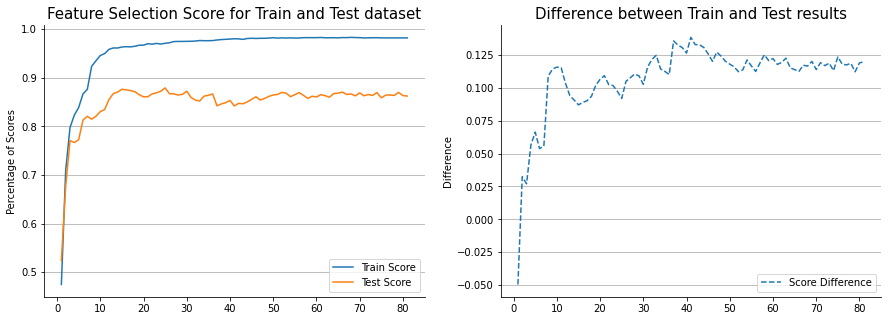

In [58]:
# Plotting the data with improved annotations

plt.figure(figsize=(15,5))

# First subplot for Train and Test scores
plt.subplot(1, 2, 1)
plt.plot(history_df['num_features'], history_df['train_score'], label='Train Score')
plt.plot(history_df['num_features'], history_df['test_score'], label='Test Score')
plt.legend(loc='lower right')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y')
plt.title('Feature Selection Score for Train and Test dataset', fontsize=15)
plt.ylabel('Percentage of Scores')

# Second subplot for Score Difference
plt.subplot(1, 2, 2)
plt.plot(history_df['num_features'], history_df['score_difference'], label='Score Difference', ls='--')
plt.legend(loc='lower right')
ax1 = plt.gca()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.grid(axis='y')
plt.title('Difference between Train and Test results', fontsize=15)
plt.ylabel('Difference')

plt.show()


   ***Conclusion:***
==

***From the dataset provided, we can observe the following patterns:***
 
--------------------------------------------------------------------------------------------------------------------------

   **Initial Observations:** Starting with a single feature, the test score is unexpectedly higher than the training score. As we add more features, the training score begins to exceed the test score.

   **Steady Improvement up to 15 Features:** From 1 feature up to 15 features, there is a steady increase in both training and test scores. Specifically, with 15 features, the test score is approximately R2=0.875289 with a relatively small score difference of 0.088777, indicating a good balance between model performance on training and test sets.

   **Plateauing and Overfitting Concerns:** After 15 features, although the training score continues to increase, the test score starts to fluctuate and doesn't show consistent improvement. The increasing difference between training and test scores as we add more features suggests potential overfitting, indicating that the model might be fitting the training data too closely without improving its generalization on the test data.

   **Optimal Feature Count:** Based on the data, using 15 features seems to offer a good trade-off. The model achieves a high test score, and the difference between training and test scores is relatively small, suggesting a balanced model that isn't overfitting too much.

   **Post-Optimal Feature Count Observations:** Beyond 15 features, there are certain points where the test score does peak again (like at 25 features with a test score of R2=0.879222R2=0.879222). However, the difference between training and test scores at these points is higher, indicating a more overfitted model compared to the 15-feature scenario.

--------------------------------------------------------------------------------------------------------------------------

   **Recommendation:**
==

Considering the overall performance and balance between training and test datasets, using 15 features seems to be the most suitable choice. It provides a high test score with a relatively low risk of overfitting.

In [59]:
history_df.loc[10:20,:]

num_features train_score test_score score_difference
10         11.0    0.949713   0.834562         0.115151
11         12.0    0.958518   0.855099         0.103419
12         13.0    0.961407   0.867448         0.093959
13         14.0    0.961336   0.870723         0.090613
14         15.0     0.96341   0.876488         0.086922
15         16.0    0.964066   0.875289         0.088777
16         17.0    0.963662    0.87361         0.090052
17         18.0     0.96493    0.87156          0.09337
18         19.0    0.967058   0.865293         0.101765
19         20.0      0.9672   0.860907         0.106293
20         21.0     0.97019   0.861073         0.109117

In [65]:
# Select the top 15 features with the highest importance scores
feature_importances_15 = feature_importances.nlargest(15).index

# Create training and testing datasets with only the selected top 15 features
X_train_selected_15 = X_train_t[feature_importances_15]
X_test_selected_15 = X_test_t[feature_importances_15]

# Initialize a Gradient Boosting Regressor model with specified parameters
# - n_estimators: Number of boosting stages (trees) in the ensemble
# - verbose: Controls the verbosity of the training process, providing progress updates
# - tol: Tolerance for stopping criterion, controls the early stopping of training
model = GradientBoostingRegressor(n_estimators=300, verbose=10, tol=0.15)

# Fit the model to the training data using the selected features
model.fit(X_train_selected_15, y_train)


      Iter       Train Loss   Remaining Time 
         1  5313187905.4770            0.92s
         2  4660128630.6699            0.75s
         3  4108729458.6846            0.69s
         4  3645904560.4993            0.76s
         5  3202893875.1206            0.77s
         6  2850541805.8447            0.79s
         7  2570090818.5802            0.80s
         8  2300531048.0539            0.80s
         9  2085062596.2019            0.84s
        10  1896302432.7599            0.86s
        11  1741282861.3390            0.86s
        12  1605688462.6100            0.86s
        13  1481960568.5852            0.86s
        14  1375270404.9502            0.86s
        15  1286058187.3746            0.87s
        16  1202366800.7584            0.89s
        17  1127959155.4285            0.90s
        18  1063615292.7403            0.89s
        19  1007004010.3142            0.90s
        20   961629339.3997            0.94s
        21   916689331.9405            0.93s
        2

       201   269336914.5501            0.37s
       202   268978528.6138            0.36s
       203   268304655.4554            0.36s
       204   267093269.6917            0.36s
       205   266495216.3581            0.35s
       206   266099994.5312            0.35s
       207   265132779.1469            0.34s
       208   264610401.0968            0.34s
       209   264121060.3902            0.34s
       210   263649139.0729            0.33s
       211   263418975.4505            0.33s
       212   262937675.8609            0.32s
       213   262426566.0013            0.32s
       214   261798513.2575            0.32s
       215   261407710.3055            0.31s
       216   260843003.5256            0.31s
       217   260453008.0975            0.30s
       218   260321059.3404            0.30s
       219   260170390.8486            0.30s
       220   259843578.0884            0.29s
       221   259211169.0234            0.29s
       222   258421881.2431            0.29s
       223

GradientBoostingRegressor(n_estimators=300, tol=0.15, verbose=10)

In [66]:

print(f'r2 Score in Train dataset: {r2_score(y_train, model.predict(X_train_selected_15))}')
print(f'r2 Score in Train dataset: {r2_score(y_test, model.predict(X_test_selected_15))}')

r2 Score in Train dataset: 0.9634096395241688
r2 Score in Train dataset: 0.8776907281135901


In [67]:
predicted_values = model.predict(X_test_selected_15)

# Calculate metrics
mae = mean_absolute_error(y_test, predicted_values)
mse = mean_squared_error(y_test, predicted_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 18480.12411152574
Mean Squared Error (MSE): 830356599.9872628
Root Mean Squared Error (RMSE): 28815.90880030097


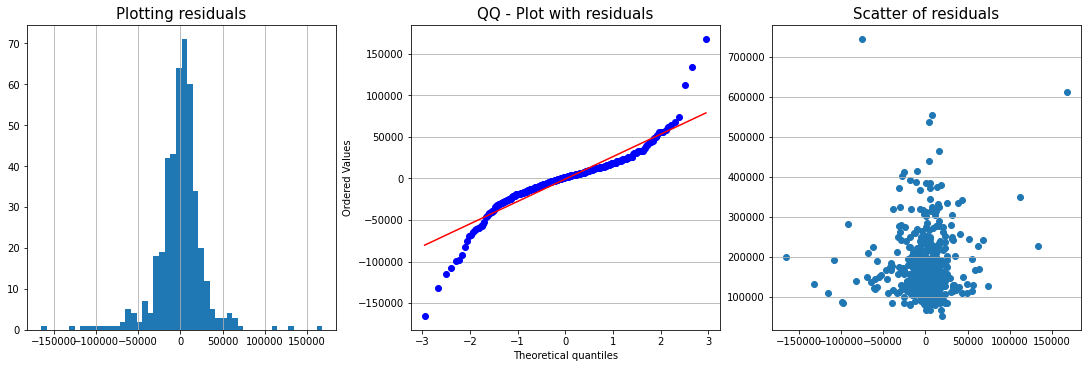

In [76]:
# Calculate residuals as the difference between actual and predicted values
residuals = y_test-predicted_values

# Initialize a new figure with specified dimensions and layout
plt.figure(figsize = (15,5), constrained_layout = True)

# First subplot: Histogram of residuals
plt.subplot(1,3,1)
plt.hist(residuals, bins = 50)
plt.title('Plotting residuals', fontsize = 15)
plt.grid(axis = 'x')

# Second subplot: QQ-Plot for residuals
plt.subplot(1,3,2)
stats.probplot(residuals, dist = 'norm', plot = plt)
plt.title('QQ - Plot with residuals', fontsize = 15)
plt.grid(axis = 'y')

# Third subplot: Scatter plot of sorted residuals vs. actual values
plt.subplot(1,3,3)
plt.scatter(x = residuals.sort_values(ascending = True), y = y_test)
plt.title('Scatter of residuals', fontsize = 15)
plt.grid(axis = 'y')

# Display the plots
plt.show()


# Deeper Estimation Post Feature and Parameter Selection

After meticulously identifying and selecting the optimal parameters and features for our dataset, it's time to delve further into the modeling process and refine our estimations. This chapter will focus on enhancing our current model, exploring additional evaluation metrics, and ensuring that our predictions are as accurate and robust as possible.

### Cross-validation:

In [77]:
from sklearn.model_selection import cross_val_score

In [82]:
cross_val = cross_val_score(model,X_train_selected_15, y_train,cv=15, n_jobs=-1, verbose=10, scoring='r2')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:    6.4s remaining:   41.8s
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:    6.4s remaining:   17.7s
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    6.4s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    6.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    7.7s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    7.8s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    7.8s finished


In [83]:
print("R2 Scores for each fold:", cross_val)
print()
print("Average R2 Score:",  cross_val.mean())
print()
print("Standard Deviation of R2 Score:",  cross_val.std())

R2 Scores for each fold: [0.90550558 0.89023507 0.65386    0.81808793 0.85529274 0.915713
 0.87010543 0.90162561 0.86092963 0.87793772 0.90147487 0.91380411
 0.91390626 0.85780064 0.89457674]

Average R2 Score: 0.868723688679516

Standard Deviation of R2 Score: 0.06329747379621323


***Background:***
After optimizing the features and parameters for the model, we performed a 15-fold cross-validation on the test set to get a more comprehensive understanding of the model's performance.

***Recommendations:***

   - 1) Consider using other evaluation metrics alongside R2 for a more comprehensive assessment.
   - 2) Since there's variability in the model's performance across folds, it might be beneficial to further optimize hyperparameters, consider ensemble methods, or explore other modeling techniques.

In [114]:
# Lets make estimation to check different models with different parameter to find optimal best model;

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Models and their names
models = [
    GradientBoostingRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor(),
    LinearRegression()
]

model_names = [
    "GradientBoostingTree", 
    "DecisionTree", 
    "RandomForest", 
    "SVR", 
    "KNeighbors", 
    "LinearRegression"
]

# Define parameter grids for each model
param_grids = [
    {
        'bagging__n_estimators': [10, 30, 50],
        'bagging__estimator__n_estimators': [50, 100, 150],
        'bagging__estimator__learning_rate': [0.01, 0.05, 0.1],
        'bagging__estimator__max_depth': [3, 4, 5]
    },
    {
        'bagging__n_estimators': [10, 30, 50],
        'bagging__estimator__max_depth': [None, 10, 20, 30],
        'bagging__estimator__min_samples_split': [2, 5, 10]
    },
    {
        'bagging__n_estimators': [10, 30, 50],
        'bagging__estimator__n_estimators': [10, 50, 100],
        'bagging__estimator__max_depth': [None, 10, 20, 30]
    },
    {
        'bagging__n_estimators': [10, 30, 50],
        'bagging__estimator__C': [0.1, 1, 10],
        'bagging__estimator__kernel': ['linear', 'rbf']
    },
    {
        'bagging__n_estimators': [10, 30, 50],
        'bagging__estimator__n_neighbors': [3, 5, 7]
    },
    {
        'bagging__n_estimators': [10, 30, 50]
    }
]


# Create an empty DataFrame to store scores
models_df = pd.DataFrame(columns=model_names)

# Placeholder list to store scores
sc_train = []
sc_test = []


# Loop over each model and conduct grid search
for model, name, param_grid in zip(models, model_names, param_grids):
    
    pipeline = Pipeline([
        ('bagging', BaggingRegressor(estimator=model, n_jobs=-1, random_state=42))
    ])
    
    grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5, verbose=10, n_jobs=-1)
    grid_search.fit(X_train_selected_15, y_train)
    
    score_train = grid_search.score(X_train_selected_15, y_train)
    score_test = grid_search.score(X_test_selected_15, y_test)
    
    sc_train.append(score_train)
    sc_test.append(score_test)
    
models_df.loc[0] = sc_train
models_df.loc[1] = sc_test


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\pkucharzak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\pkucharzak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [115]:
models_df

GradientBoostingTree  DecisionTree  RandomForest       SVR  KNeighbors  \
0              0.973667      0.978879      0.949145  0.531693    0.867496   
1              0.876586      0.848365      0.864190  0.518513    0.835874   

   LinearRegression  
0          0.785911  
1          0.759072

***Model Performance on Training Data:***
   
   - Gradient Boosting Trees (GBT) achieved the highest R2 score of approximately 0.9737 on the training data, suggesting that the model was able to capture the patterns in the training data very well.
   - Decision Trees (DT) and Random Forests (RF) also performed exceptionally well with R2R2 scores of around 0.9789 and 0.9491 respectively.
   - Support Vector Regression (SVR) and K-Nearest Neighbors (KNN) had moderate performance with R2R2 scores of 0.5317 and 0.8675, respectively.
   - Linear Regression (LR) had a score of 0.7859, which is decent but lower in comparison to tree-based models.
   
***Model Performance on Test Data:***
   
   - GBT remained the top performer with an R2 score of approximately 0.8766 on the test data. This indicates that the model generalizes well to unseen data.
   - DT and RF followed closely with scores of 0.8484 and 0.8642 respectively.
   - SVR improved slightly on the test data with a score of 0.5185, but it's still considerably lower than the tree-based models.
   - KNN and LR had scores of 0.8359 and 0.7591 respectively, showing decent generalization abilities.

***Overall Insights:***
   - Tree-based models, especially Gradient Boosting Trees, demonstrated superior performance both on training and test datasets, making them the preferred choice for this specific problem.
   - Despite the high training scores of Decision Trees and Random Forests, their test scores are slightly lower than the GBT, indicating a potential overfitting scenario.
   - The SVR model's performance was notably lower than other models, suggesting that the data might not adhere to the assumptions or patterns that SVR typically captures.
   - The KNN model's performance was moderate, but given its nature, it might require further feature engineering or scaling for optimal performance.
   - Linear Regression, being a simple model, provided a decent baseline, but more complex models like GBT outperformed it.

# ***Recommendations:***
###   - Gradient Boosting Trees should be the primary choice for deployment given its robustness and high performance on test data.
###   - Regular monitoring and validation should be conducted to ensure the model's performance remains consistent over time.
###   - For SVR and KNN, further investigation into feature engineering, scaling, or alternative kernels might be beneficial.
